# 1. Loading Data and Early Explorations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

from helpers import feature_importance, pearson_correlation, plot_data, trendline, transform_2D, seed_everything, set_axis_style
from calculate import ml_predict, val_score

In [2]:
matplotlib.rcParams['font.sans-serif'] = "Arial"
matplotlib.rcParams['font.family'] = "sans-serif"

In [3]:
# Seed all parameters to ensure repeatability
seed_everything()

In [4]:
# Read in our data file
df = pd.read_csv('CO Hydrogenation Training.csv')

In [5]:
df

,Adsorbate 1,Adsorbate 2,num of NM atoms 1,num of NM atoms 2,num of H 1,num of H 2,Atomic num 1,Atomic num 2,PE 1,PE 2,...,IE 1 add IE 2,Average EA of Adsorbates squared,Average PE of Adsorbates squared,Average Covalent Radius of Adosrbates squared,Average FIE of Adsorbates squared,Average VdW Radius squared,Average Atomic num of Adsorbates squared,Average num of Valence Electron squared,Average IE squared,G_CHO - Gco
0,N,C,1.0,1.0,0.0,0.0,7.0,6.00,3.04,2.55,...,25.79,0.36,7.81,0.53,166.33,2.64,42.25,20.25,166.28,0.09894
1,C,N,1.0,1.0,0.0,0.0,6.0,7.00,2.55,3.04,...,25.79,0.36,7.81,0.53,166.33,2.64,42.25,20.25,166.28,0.09894
2,OH,NH3,2.0,4.0,1.0,3.0,4.5,2.50,2.82,2.41,...,23.09,0.68,6.84,0.20,188.24,1.75,12.25,56.25,133.29,0.12011
3,NH3,OH,4.0,2.0,3.0,1.0,2.5,4.50,2.41,2.82,...,23.09,0.69,6.84,0.20,188.24,1.75,12.25,56.25,133.29,0.12011
4,CH,F,2.0,1.0,1.0,0.0,3.5,9.00,2.38,3.98,...,28.06,4.86,10.10,0.35,222.77,2.13,39.06,36.00,196.84,0.01580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,S,CH3,1.0,4.0,0.0,3.0,16.0,2.25,2.58,2.29,...,20.20,2.19,5.92,0.53,136.58,2.44,83.27,42.25,102.01,0.36726
60,Cl,Br,1.0,1.0,0.0,0.0,17.0,35.00,3.16,2.96,...,24.78,12.16,9.36,1.13,153.52,3.24,676.00,49.00,153.51,0.27497
61,Br,Cl,1.0,1.0,0.0,0.0,35.0,17.00,2.96,3.16,...,24.78,12.16,9.36,1.13,153.52,3.24,676.00,49.00,153.51,0.27497
62,SH,Br,2.0,1.0,1.0,0.0,8.5,35.00,2.39,2.96,...,22.23,5.71,7.16,0.83,141.53,2.81,473.06,49.00,123.54,0.26969


In [6]:
df.shape

(64, 55)

In [7]:
adsorbates = df[['Adsorbate 1', 'Adsorbate 2']]

In [8]:
adsorbates

,Adsorbate 1,Adsorbate 2
0,N,C
1,C,N
2,OH,NH3
3,NH3,OH
4,CH,F
...,...,...
59,S,CH3
60,Cl,Br
61,Br,Cl
62,SH,Br


In [9]:
# Drop adsorbates 1 and 2 from our feature space as they will not participate in training
df = df.drop(columns = ['Adsorbate 1', 'Adsorbate 2'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 53 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   num of NM atoms 1                              64 non-null     float64
 1   num of NM atoms 2                              64 non-null     float64
 2   num of H 1                                     64 non-null     float64
 3   num of H 2                                     64 non-null     float64
 4   Atomic num 1                                   64 non-null     float64
 5   Atomic num 2                                   64 non-null     float64
 6   PE 1                                           64 non-null     float64
 7   PE 2                                           64 non-null     float64
 8   Covalent Radius 1                              64 non-null     float64
 9   Covalent Radius 2                              64 non-nu

<b> No missing data observed in training dataset </b>

In [11]:
df.describe()

,num of NM atoms 1,num of NM atoms 2,num of H 1,num of H 2,Atomic num 1,Atomic num 2,PE 1,PE 2,Covalent Radius 1,Covalent Radius 2,...,IE 1 add IE 2,Average EA of Adsorbates squared,Average PE of Adsorbates squared,Average Covalent Radius of Adosrbates squared,Average FIE of Adsorbates squared,Average VdW Radius squared,Average Atomic num of Adsorbates squared,Average num of Valence Electron squared,Average IE squared,G_CHO - Gco
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,...,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.00000,64.000000,64.000000
mean,1.937500,1.937500,0.937500,0.937500,8.429844,8.429844,2.735937,2.735937,0.650625,0.650625,...,23.905000,2.784531,7.579375,0.445156,172.609844,2.266875,102.550469,41.71875,144.570000,0.194665
std,0.973865,0.973865,0.973865,0.973865,8.020709,8.020709,0.478578,0.478578,0.211884,0.211884,...,2.634792,2.624086,1.805659,0.213653,28.835132,0.360079,151.817110,8.77242,32.550804,0.098376
min,1.000000,1.000000,0.000000,0.000000,2.250000,2.250000,2.290000,2.290000,0.420000,0.420000,...,20.200000,0.160000,5.390000,0.200000,124.760000,1.750000,9.770000,20.25000,102.010000,-0.012410
25%,1.000000,1.000000,0.000000,0.000000,3.500000,3.500000,2.380000,2.380000,0.480000,0.480000,...,21.862500,0.962500,6.225000,0.290000,153.062500,2.000000,20.250000,36.00000,119.515000,0.124317
50%,2.000000,2.000000,1.000000,1.000000,6.000000,6.000000,2.565000,2.565000,0.595000,0.595000,...,23.530000,1.630000,7.030000,0.360000,163.785000,2.180000,39.060000,42.25000,138.415000,0.189260
75%,2.250000,2.250000,1.250000,1.250000,8.625000,8.625000,2.960000,2.960000,0.710000,0.710000,...,25.852500,4.800000,9.360000,0.560000,186.147500,2.567500,93.952500,49.00000,167.090000,0.269690
max,4.000000,4.000000,3.000000,3.000000,35.000000,35.000000,3.980000,3.980000,1.140000,1.140000,...,30.440000,12.160000,11.830000,1.130000,240.720000,3.240000,676.000000,56.25000,231.650000,0.483390


# 2. Normalizing Data and Creating Dummy Variables

In [12]:
# print the features names for ease of use later
df.columns

Index(['num of NM atoms 1', 'num of NM atoms 2', 'num of H 1', 'num of H 2',
       'Atomic num 1', 'Atomic num 2', 'PE 1', 'PE 2', 'Covalent Radius 1',
       'Covalent Radius 2', 'FIE 1', 'FIE 2', 'IE 1', 'IE 2', 'EA 1', 'EA 2',
       'VdW Radius 1', 'VdW Radius 2', 'num of Valence Electron 1',
       'num of Valence Electron 2', 'num of Atoms', 'num of H',
       'Average Atomic num', 'Average PE', 'Average Covalent Radius',
       'Average FIE', 'Average IE', 'Average EA', 'Average VdW Radius',
       'Average num of Valence Electron', 'PE 1 minus PE 2', 'PE 1 add PE 2',
       'Covalent Radius 1 minus Covalent Radius 2',
       'Covalent Radius 1 add Covalent Radius 2',
       'VdW Radius 1 minus VdW Radius 2', 'VdW Radius 1 add VdW Radius 2',
       'FIE 1 minus FIE 2', 'FIE 1 add FIE 2', 'EA 1 minus EA 2',
       'EA 1 add EA 2', 'num of Valence 1 minus num of Valence 2',
       'num of Valence 1 add num of Valence 2', 'IE 1 minus IE 2',
       'IE 1 add IE 2', 'Average EA of A

In [13]:
from sklearn.preprocessing import MinMaxScaler

# instantiate scaler method
scaler = MinMaxScaler()

# identify all numerical features to be normalized
numerical = ['num of NM atoms 1', 'num of NM atoms 2', 'num of H 1', 'num of H 2',
       'Average Atomic num 1', 'Average Atomic num 2', 'Average PE 1',
       'Average PE 2', 'Average Covalent Radius 1',
       'Average Covalent Radius 2', 'Average FIE 1', 'Average FIE 2', 'IE 1',
       'IE 2', 'Average EA 1', 'Average EA 2', 'Average VdW Radius 1',
       'Average VdW Radius 2', 'num of Valence Electron 1',
       'num of Valence Electron 2', 'num of Atoms', 'num of H', 'Atomic num',
       'PE', 'Covalent Radius', 'FIE', 'IE', 'EA', 'VdW Radius',
       'Average num of Valence Electron', 'PE 1 minus PE 2', 'PE 1 add PE 2',
       'Covalent Radius 1 minus Covalent Radius 2',
       'Covalent Radius 1 add Covalent Radius 2',
       'VdW Radius 1 minus Avg VdW Radius 2',
       'VdW Radius 1 add Avg VdW Radius 2', 'FIE 1 minus FIE 2',
       'FIE 1 add FIE 2', 'EA 1 minus EA 2', 'EA 1 add EA 2',
       'num of Valence 1 minus num of Valence 2',
       'num of Valence 1 add num of Valence 2', 'IE 1 minus IE 2',
       'IE 1 add IE 2', 'Averaged EA of Adsorbates squared',
       'Averaged PE of Adsorbates squared',
       'Average Covalent Radius of Adosrbates squared',
       'Averaged FIE of Adsorbates squared', 'Averaged VdW Radius squared',
       'Averaged Atomic num of Adsorbates squared',
       'Averaged num of Valence Electron squared', 'Averaged IE squared']

In [14]:
# scale the features
#df[numerical] = scaler.fit_transform(df[numerical])

In [15]:
#categorical = pd.get_dummies(df[['Adsorbate 1', 'Adsorbate 2']])
#final_df = pd.merge(categorical, df, how='right', left_index=True, right_index=True)
#final_df = final_df.drop(columns=['Adsorbate 1', 'Adsorbate 2'])

In [16]:
final_df = df

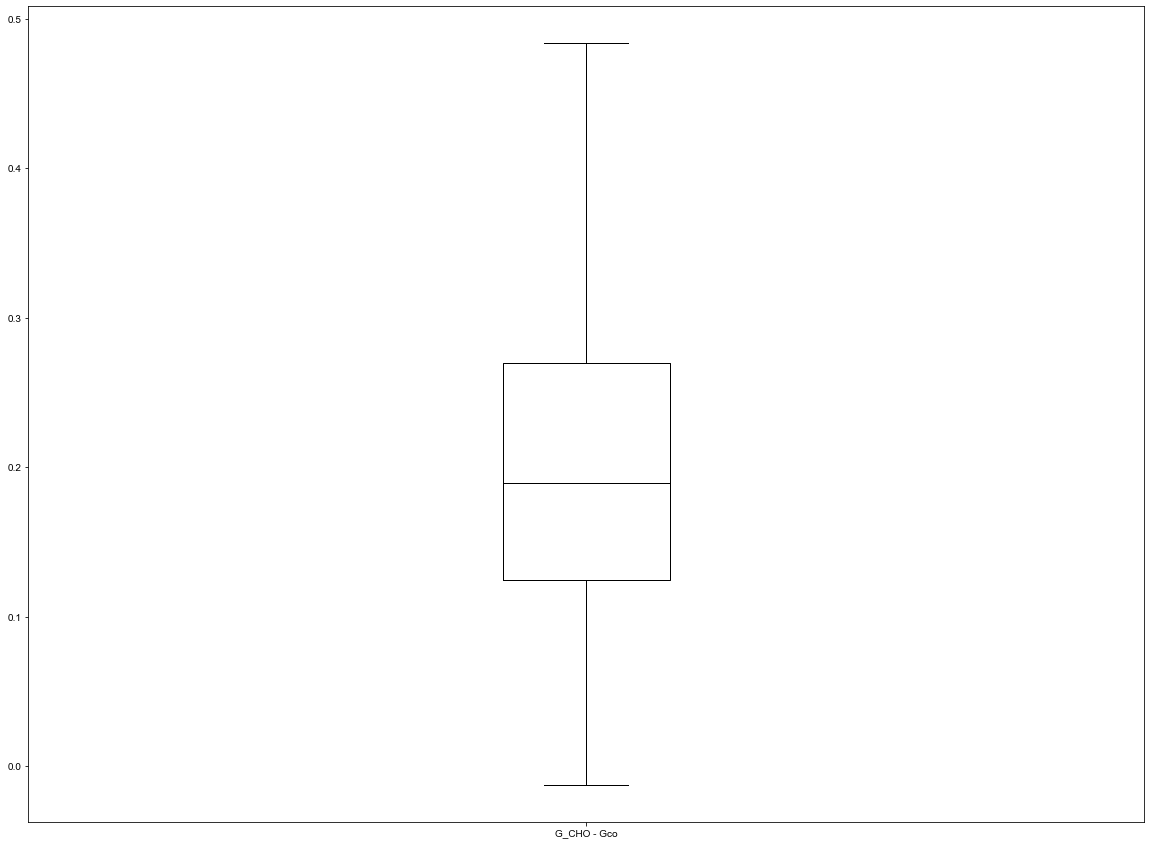

In [17]:
final_df.boxplot(color=dict(boxes='black', whiskers='black', medians='black', caps='black'), 
                      column='G_CHO - Gco', grid=False, figsize=(20, 15));

# 3. Machine Learning

## Feature Selection and Performance Testing

### Round 1

In [18]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Instantiate regressor algorithms
GBR = GradientBoostingRegressor(random_state=42)
KNR = KNeighborsRegressor()
RFR = RandomForestRegressor(random_state=42)
SR = SVR()
ridge = Ridge(random_state=42)
xgbr = XGBRegressor(random_state=42)
light = LGBMRegressor(random_state=42)

regressors = [GBR, KNR, RFR, SR, ridge, xgbr, light]

In [19]:
# Create an empty df to save the results of each regressor for each round of feature removal
results_df = pd.DataFrame(columns = ['# Features', 'GBR', 'KNR', 'RFR', 'SVR', 'RR', 'XGBR', 'LightGBM', 'Time'])

In [20]:
val_score(final_df, 1, regressors, results_df)

In [21]:
results_df

,# Features,GBR,KNR,RFR,SVR,RR,XGBR,LightGBM,Time
1,52,"[0.037, 0.0492]","[0.0816, 0.097]","[0.0494, 0.0651]","[0.0844, 0.0987]","[0.0831, 0.1035]","[0.0384, 0.0526]","[0.0583, 0.076]",42.230911


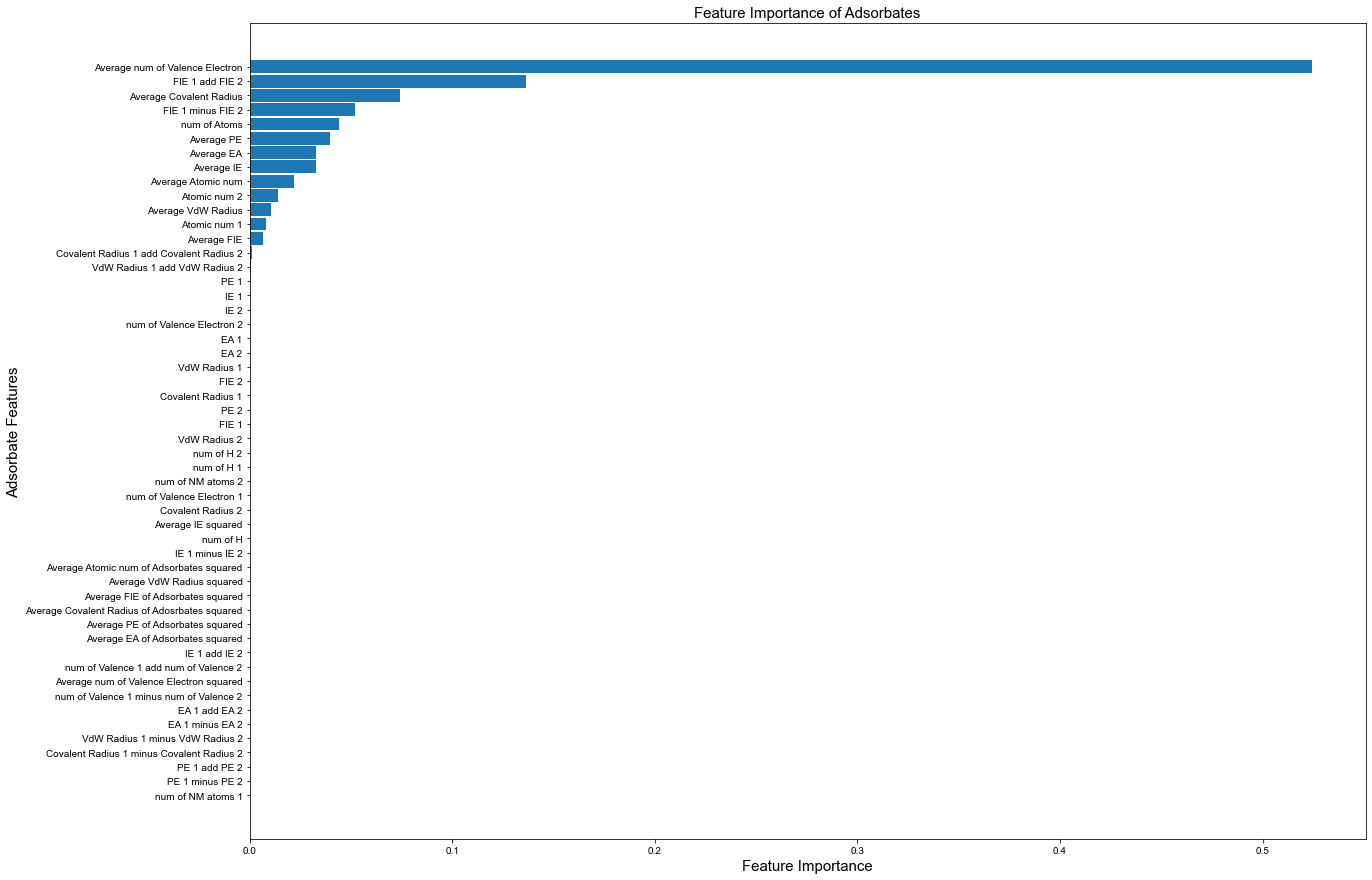

In [22]:
feature_importance(XGBRegressor(), final_df)

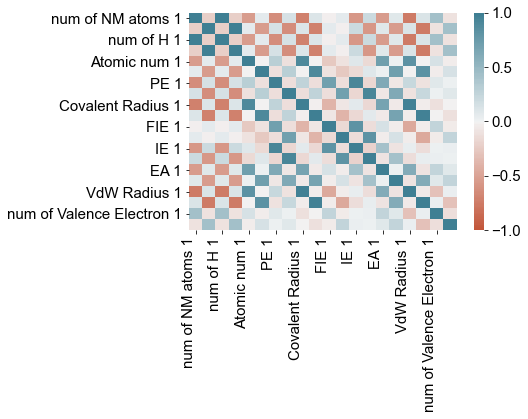

In [23]:
pearson_correlation(final_df)

### Round 2

In [24]:
# make a copy of the df from the previoud edition
df_v2 = final_df.copy()

In [25]:
# Drop the features
df_v2 = df_v2.drop(columns = ['PE 1 add PE 2',
       'Covalent Radius 1 add Covalent Radius 2','VdW Radius 1 add VdW Radius 2',
       'FIE 1 add FIE 2', 'EA 1 add EA 2',
       'num of Valence 1 add num of Valence 2',
       'IE 1 add IE 2'])

In [26]:
val_score(df_v2, 2, regressors, results_df)

In [27]:
results_df

,# Features,GBR,KNR,RFR,SVR,RR,XGBR,LightGBM,Time
1,52,"[0.037, 0.0492]","[0.0816, 0.097]","[0.0494, 0.0651]","[0.0844, 0.0987]","[0.0831, 0.1035]","[0.0384, 0.0526]","[0.0583, 0.076]",42.230911
2,45,"[0.0372, 0.0488]","[0.0813, 0.0971]","[0.05, 0.0661]","[0.0845, 0.0988]","[0.0825, 0.1034]","[0.039, 0.0537]","[0.0583, 0.076]",40.517865


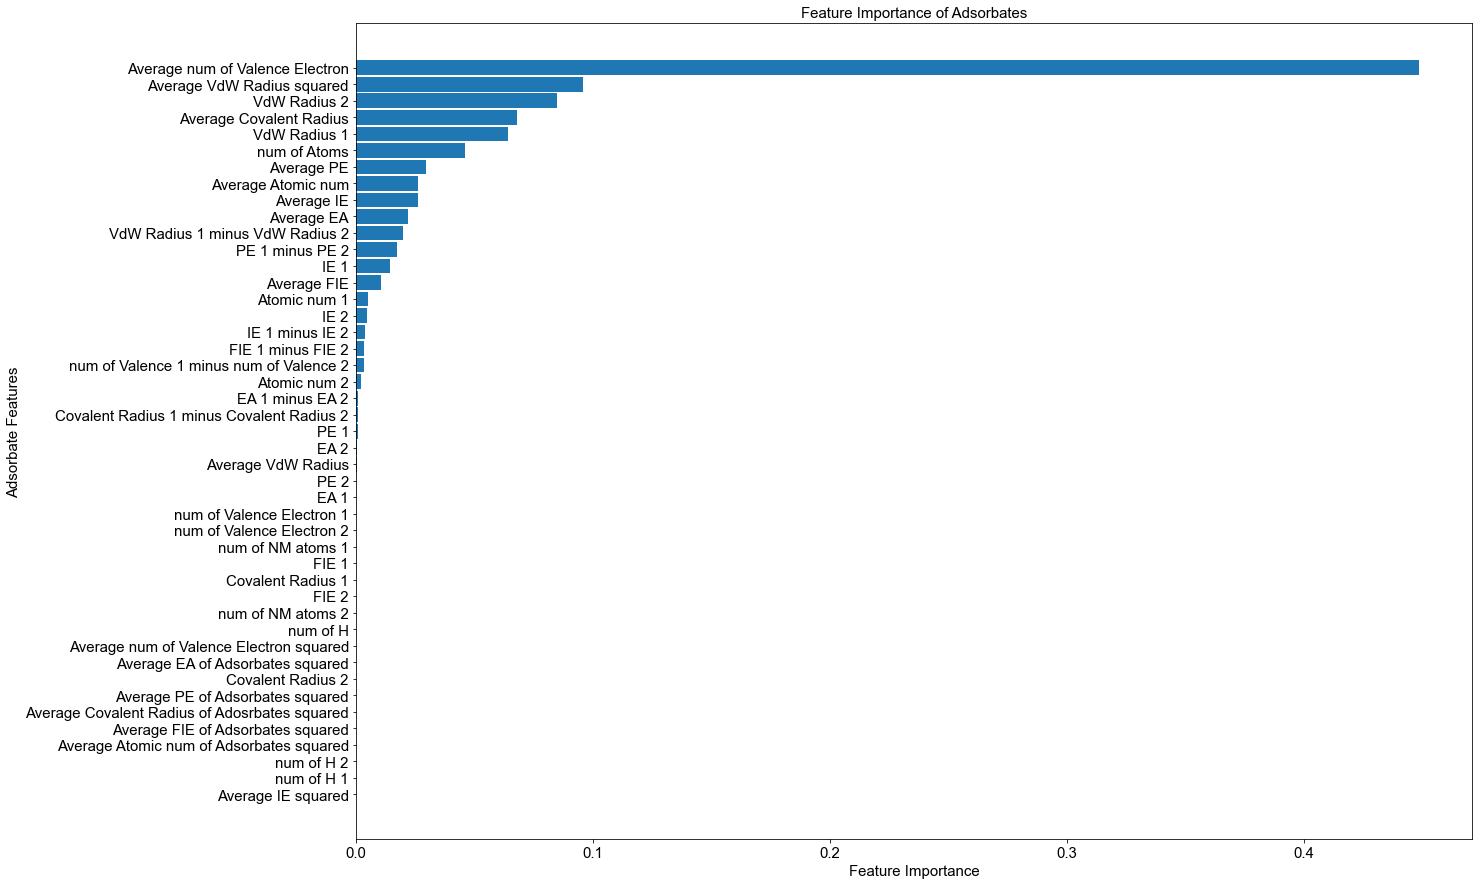

In [28]:
feature_importance(XGBRegressor(), df_v2)

### Round 3

In [29]:
df_v3 = df_v2.copy()

In [30]:
df_v3 = df_v3.drop(columns = ['Average EA of Adsorbates squared',
       'Average Covalent Radius of Adosrbates squared',
       'Average FIE of Adsorbates squared',
       'Average Atomic num of Adsorbates squared',
       'Average num of Valence Electron squared', 'Average IE squared'])

In [31]:
val_score(df_v3, 3, regressors, results_df)

In [32]:
results_df

,# Features,GBR,KNR,RFR,SVR,RR,XGBR,LightGBM,Time
1,52,"[0.037, 0.0492]","[0.0816, 0.097]","[0.0494, 0.0651]","[0.0844, 0.0987]","[0.0831, 0.1035]","[0.0384, 0.0526]","[0.0583, 0.076]",42.230911
2,45,"[0.0372, 0.0488]","[0.0813, 0.0971]","[0.05, 0.0661]","[0.0845, 0.0988]","[0.0825, 0.1034]","[0.039, 0.0537]","[0.0583, 0.076]",40.517865
3,39,"[0.0371, 0.049]","[0.0892, 0.105]","[0.0504, 0.067]","[0.0863, 0.1047]","[0.0814, 0.1019]","[0.0398, 0.0541]","[0.0583, 0.076]",38.516096


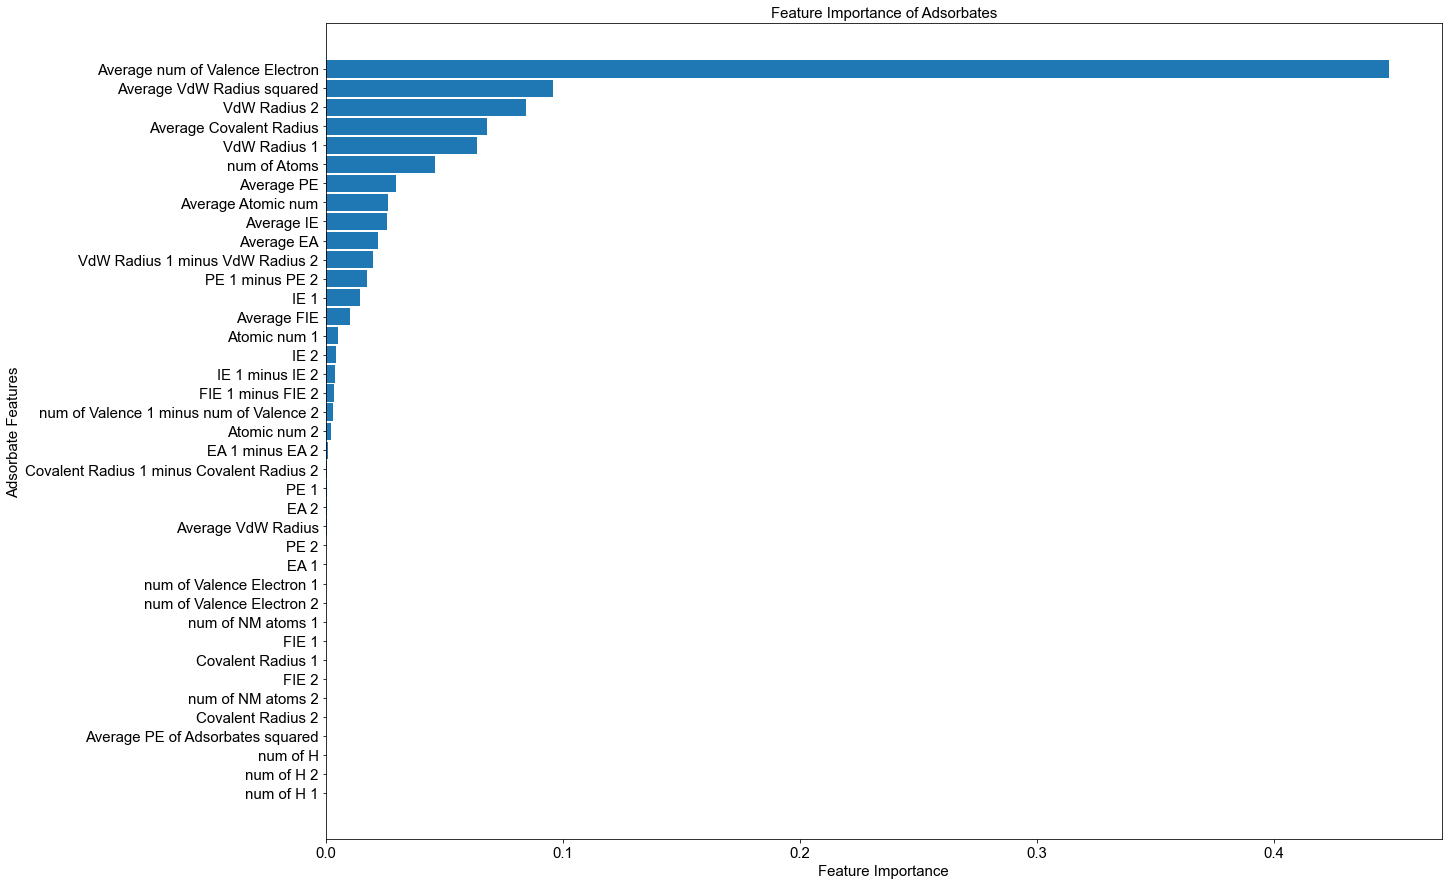

In [33]:
feature_importance(XGBRegressor(), df_v3)

### Round 4

In [34]:
df_v4 = df_v3.copy()

In [35]:
df_v4 = df_v4.drop(columns = ['num of NM atoms 1','num of NM atoms 2', 'num of H 1', 'num of H 2', 'num of Valence Electron 1',
      'num of Valence Electron 2', 'FIE 1', 'FIE 2'])

In [36]:
val_score(df_v4, 4, regressors, results_df)

In [37]:
results_df

,# Features,GBR,KNR,RFR,SVR,RR,XGBR,LightGBM,Time
1,52,"[0.037, 0.0492]","[0.0816, 0.097]","[0.0494, 0.0651]","[0.0844, 0.0987]","[0.0831, 0.1035]","[0.0384, 0.0526]","[0.0583, 0.076]",42.230911
2,45,"[0.0372, 0.0488]","[0.0813, 0.0971]","[0.05, 0.0661]","[0.0845, 0.0988]","[0.0825, 0.1034]","[0.039, 0.0537]","[0.0583, 0.076]",40.517865
3,39,"[0.0371, 0.049]","[0.0892, 0.105]","[0.0504, 0.067]","[0.0863, 0.1047]","[0.0814, 0.1019]","[0.0398, 0.0541]","[0.0583, 0.076]",38.516096
4,31,"[0.0341, 0.0453]","[0.0867, 0.1021]","[0.0488, 0.0645]","[0.0902, 0.1085]","[0.0794, 0.0996]","[0.0392, 0.0537]","[0.0617, 0.0798]",36.615173


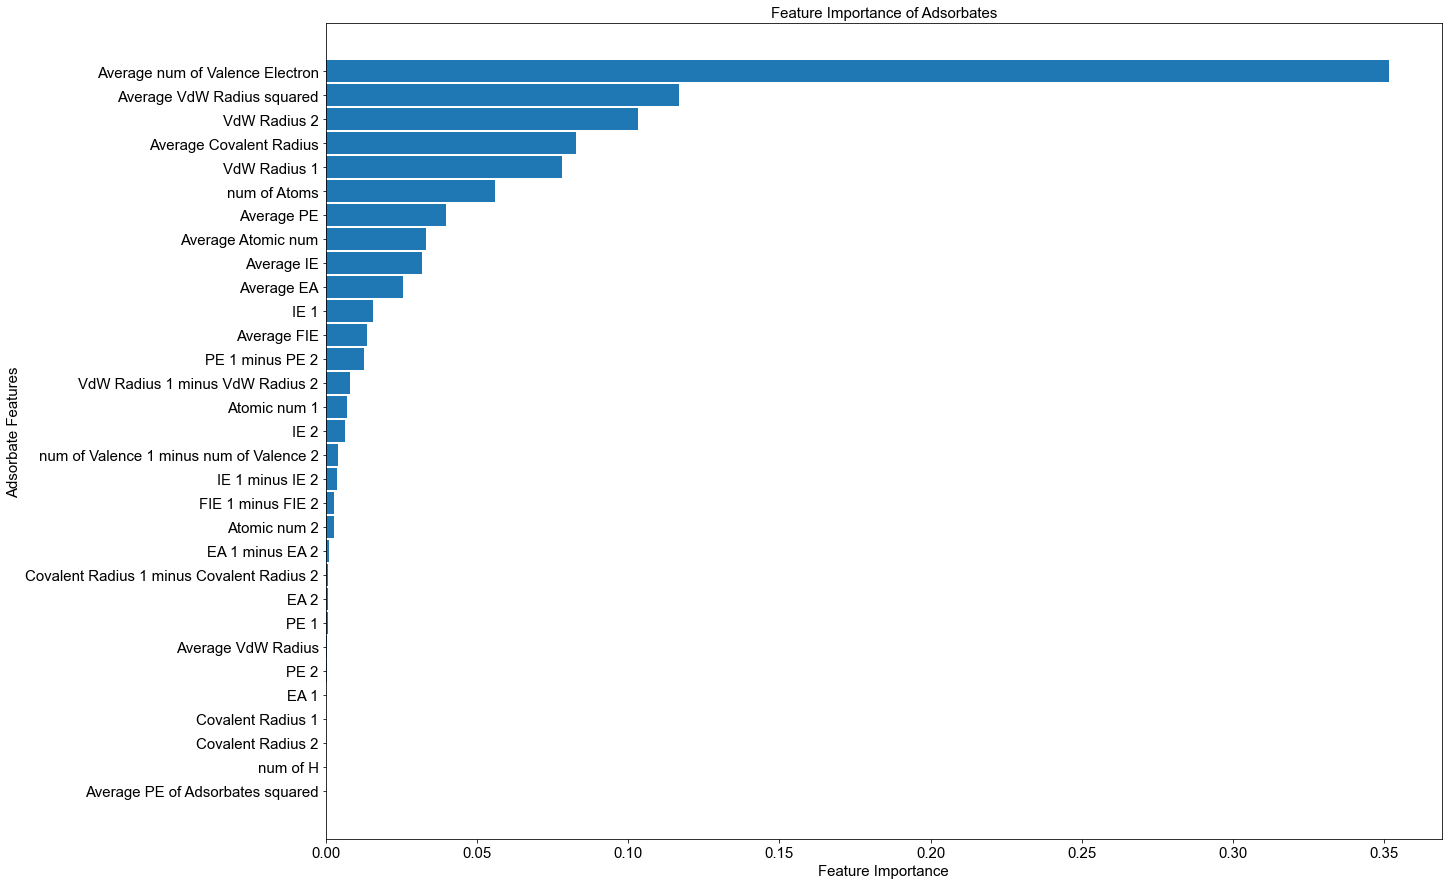

In [38]:
feature_importance(XGBRegressor(), df_v4)

### Round 5

In [39]:
df_v5 = df_v4.copy()

In [40]:
df_v5 = df_v5.drop(columns = ['Average VdW Radius', 'num of H', 'EA 1', 'EA 2', 
                              'Average PE of Adsorbates squared', 'PE 1', 'PE 2',  'Covalent Radius 1', 'Covalent Radius 2', 
                              'num of H', 'Average VdW Radius squared'])

In [41]:
val_score(df_v5, 5, regressors, results_df)

In [42]:
results_df

,# Features,GBR,KNR,RFR,SVR,RR,XGBR,LightGBM,Time
1,52,"[0.037, 0.0492]","[0.0816, 0.097]","[0.0494, 0.0651]","[0.0844, 0.0987]","[0.0831, 0.1035]","[0.0384, 0.0526]","[0.0583, 0.076]",42.230911
2,45,"[0.0372, 0.0488]","[0.0813, 0.0971]","[0.05, 0.0661]","[0.0845, 0.0988]","[0.0825, 0.1034]","[0.039, 0.0537]","[0.0583, 0.076]",40.517865
3,39,"[0.0371, 0.049]","[0.0892, 0.105]","[0.0504, 0.067]","[0.0863, 0.1047]","[0.0814, 0.1019]","[0.0398, 0.0541]","[0.0583, 0.076]",38.516096
4,31,"[0.0341, 0.0453]","[0.0867, 0.1021]","[0.0488, 0.0645]","[0.0902, 0.1085]","[0.0794, 0.0996]","[0.0392, 0.0537]","[0.0617, 0.0798]",36.615173
5,21,"[0.0354, 0.0485]","[0.0856, 0.1012]","[0.049, 0.0653]","[0.0901, 0.108]","[0.078, 0.0978]","[0.0378, 0.0523]","[0.0598, 0.0777]",33.945459


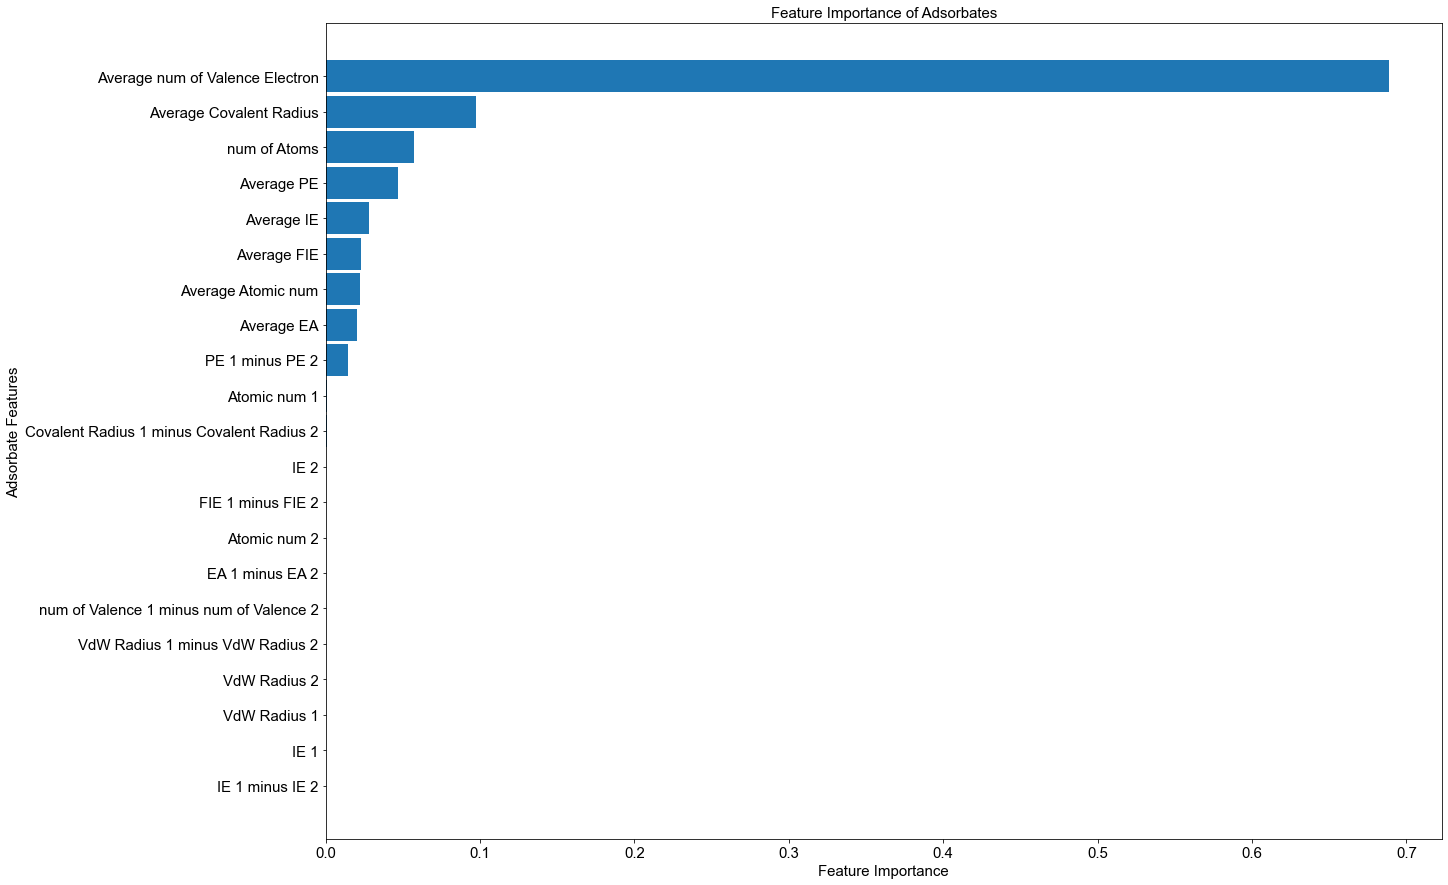

In [43]:
feature_importance(XGBRegressor(), df_v5)

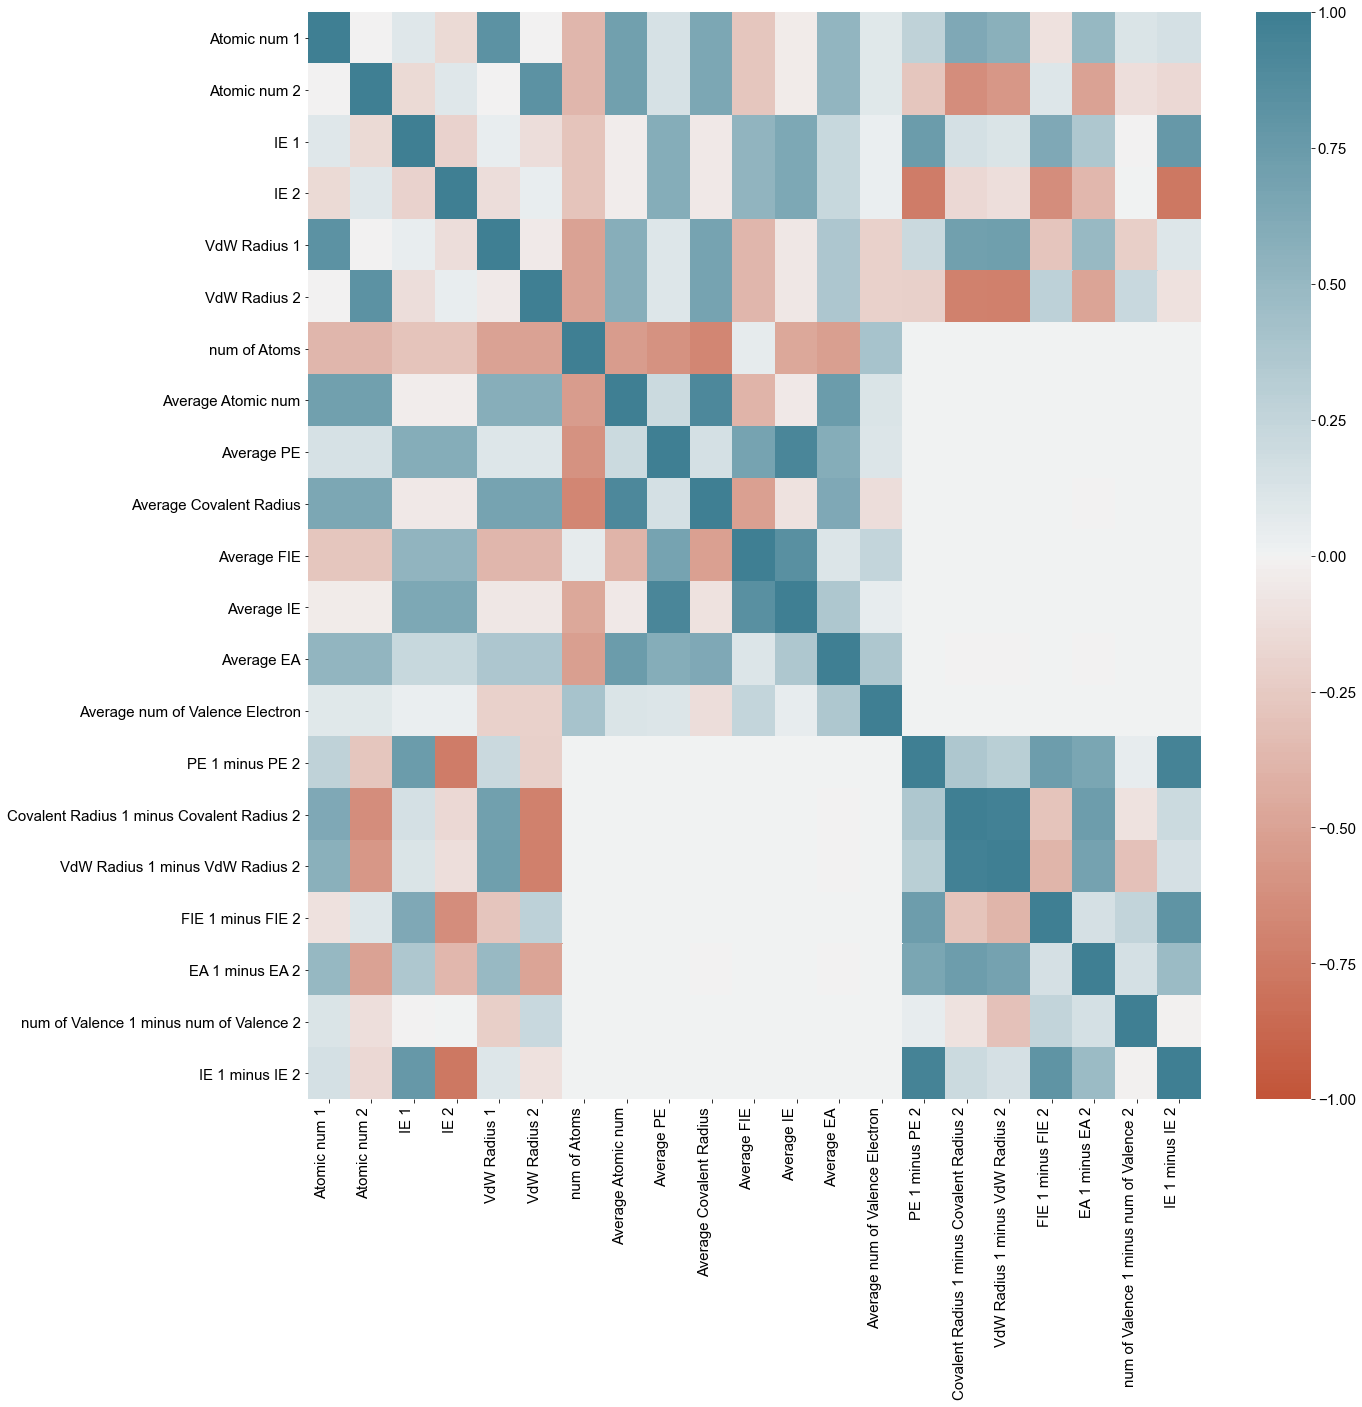

In [44]:
pearson_correlation(df_v5, last=True)

### Round 6

In [45]:
df_v6 = df_v5.copy()

In [46]:
df_v6 = df_v6.drop(columns = ['Atomic num 1', 'Atomic num 2', 'num of Atoms',
                              'Average FIE',  'FIE 1 minus FIE 2', 'VdW Radius 1', 'VdW Radius 2', 'IE 1', 'IE 2', 'EA 1 minus EA 2', 
                              'VdW Radius 1 minus VdW Radius 2'])

In [47]:
val_score(df_v6, 6, regressors, results_df)

In [48]:
results_df

,# Features,GBR,KNR,RFR,SVR,RR,XGBR,LightGBM,Time
1,52,"[0.037, 0.0492]","[0.0816, 0.097]","[0.0494, 0.0651]","[0.0844, 0.0987]","[0.0831, 0.1035]","[0.0384, 0.0526]","[0.0583, 0.076]",42.230911
2,45,"[0.0372, 0.0488]","[0.0813, 0.0971]","[0.05, 0.0661]","[0.0845, 0.0988]","[0.0825, 0.1034]","[0.039, 0.0537]","[0.0583, 0.076]",40.517865
3,39,"[0.0371, 0.049]","[0.0892, 0.105]","[0.0504, 0.067]","[0.0863, 0.1047]","[0.0814, 0.1019]","[0.0398, 0.0541]","[0.0583, 0.076]",38.516096
4,31,"[0.0341, 0.0453]","[0.0867, 0.1021]","[0.0488, 0.0645]","[0.0902, 0.1085]","[0.0794, 0.0996]","[0.0392, 0.0537]","[0.0617, 0.0798]",36.615173
5,21,"[0.0354, 0.0485]","[0.0856, 0.1012]","[0.049, 0.0653]","[0.0901, 0.108]","[0.078, 0.0978]","[0.0378, 0.0523]","[0.0598, 0.0777]",33.945459
6,10,"[0.0239, 0.0352]","[0.0835, 0.0978]","[0.044, 0.0608]","[0.0823, 0.1008]","[0.0759, 0.0947]","[0.0238, 0.0352]","[0.0592, 0.0769]",30.334425


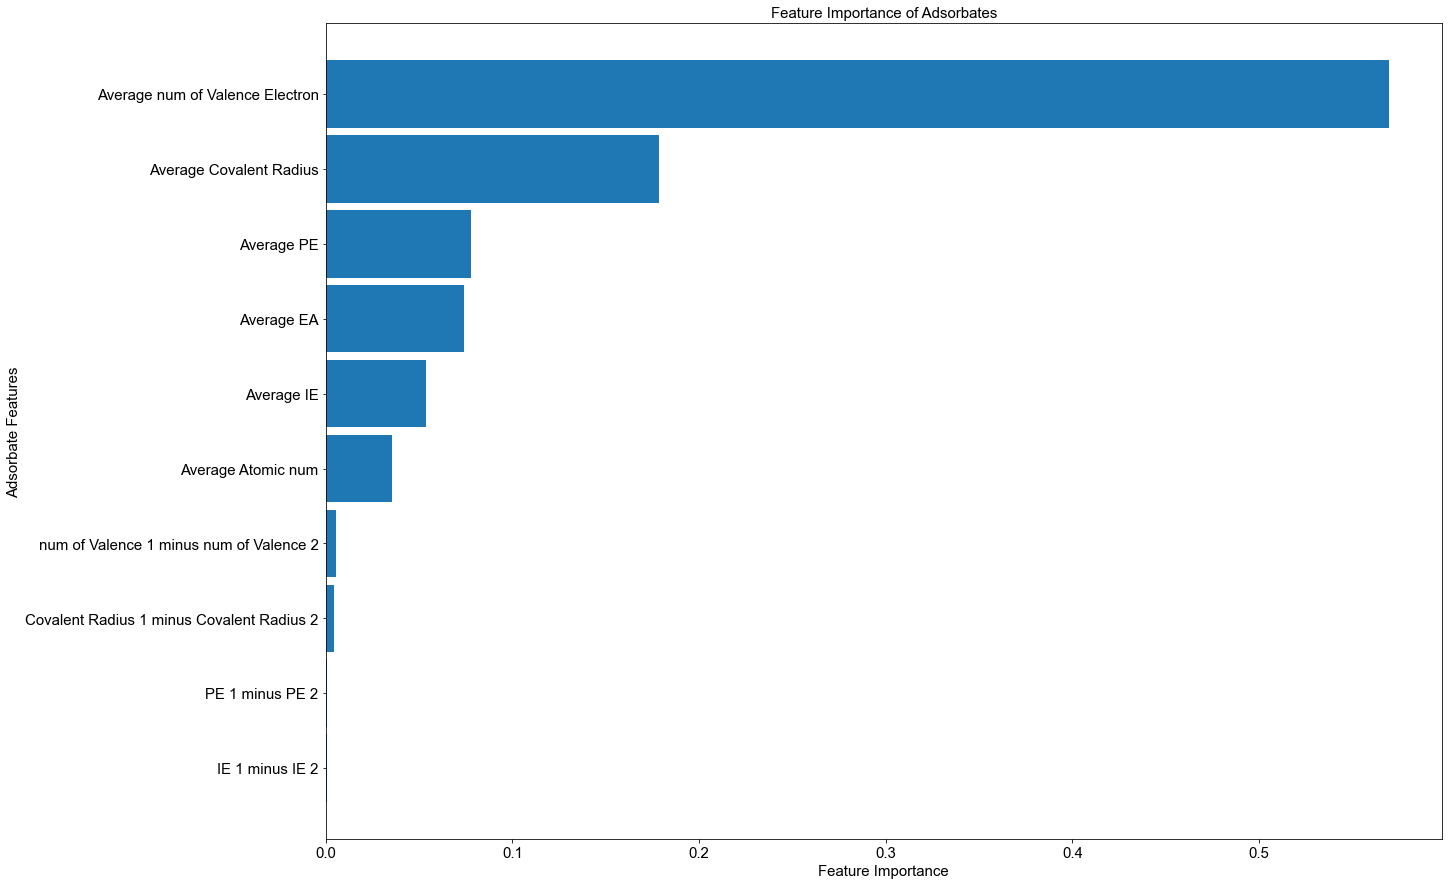

In [49]:
feature_importance(XGBRegressor(), df_v6)

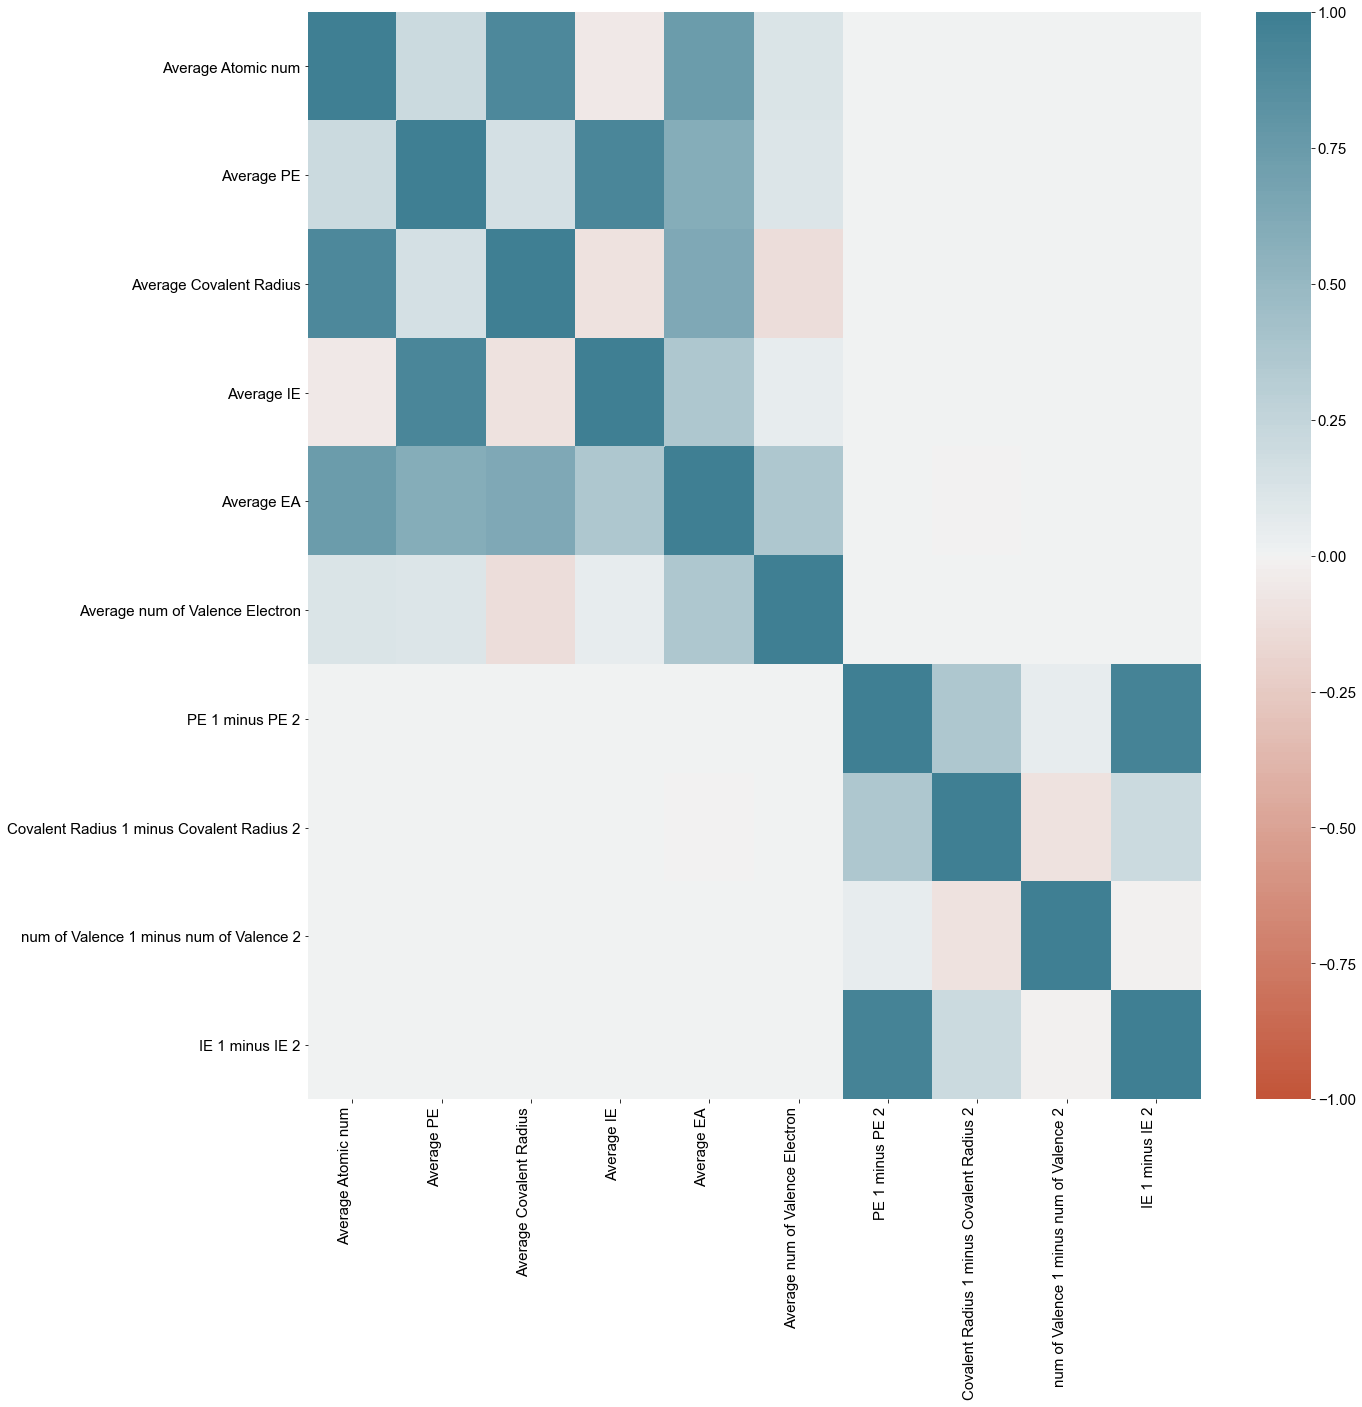

In [50]:
pearson_correlation(df_v6, last=True)

### Round 7

In [51]:
df_v7 = df_v6.copy()

In [52]:
df_v7 = df_v7.drop(columns = ['Average Covalent Radius'])

In [53]:
val_score(df_v7, 7, regressors, results_df)

In [54]:
results_df

,# Features,GBR,KNR,RFR,SVR,RR,XGBR,LightGBM,Time
1,52,"[0.037, 0.0492]","[0.0816, 0.097]","[0.0494, 0.0651]","[0.0844, 0.0987]","[0.0831, 0.1035]","[0.0384, 0.0526]","[0.0583, 0.076]",42.230911
2,45,"[0.0372, 0.0488]","[0.0813, 0.0971]","[0.05, 0.0661]","[0.0845, 0.0988]","[0.0825, 0.1034]","[0.039, 0.0537]","[0.0583, 0.076]",40.517865
3,39,"[0.0371, 0.049]","[0.0892, 0.105]","[0.0504, 0.067]","[0.0863, 0.1047]","[0.0814, 0.1019]","[0.0398, 0.0541]","[0.0583, 0.076]",38.516096
4,31,"[0.0341, 0.0453]","[0.0867, 0.1021]","[0.0488, 0.0645]","[0.0902, 0.1085]","[0.0794, 0.0996]","[0.0392, 0.0537]","[0.0617, 0.0798]",36.615173
5,21,"[0.0354, 0.0485]","[0.0856, 0.1012]","[0.049, 0.0653]","[0.0901, 0.108]","[0.078, 0.0978]","[0.0378, 0.0523]","[0.0598, 0.0777]",33.945459
6,10,"[0.0239, 0.0352]","[0.0835, 0.0978]","[0.044, 0.0608]","[0.0823, 0.1008]","[0.0759, 0.0947]","[0.0238, 0.0352]","[0.0592, 0.0769]",30.334425
7,9,"[0.0262, 0.0381]","[0.0835, 0.0978]","[0.048, 0.0654]","[0.0824, 0.1009]","[0.0759, 0.0946]","[0.026, 0.0372]","[0.0589, 0.0767]",29.904791


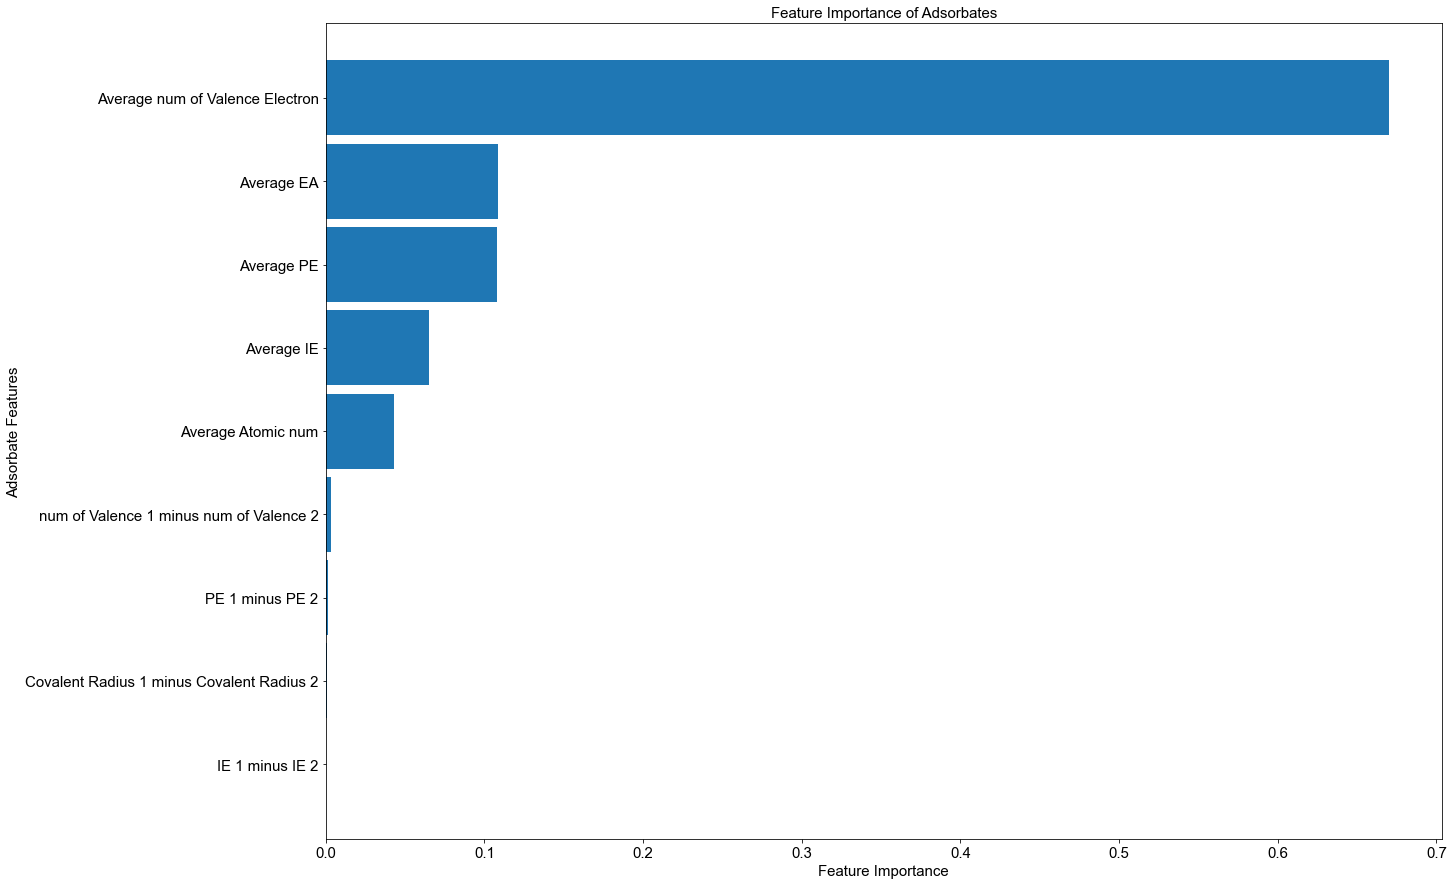

In [55]:
feature_importance(XGBRegressor(), df_v7)

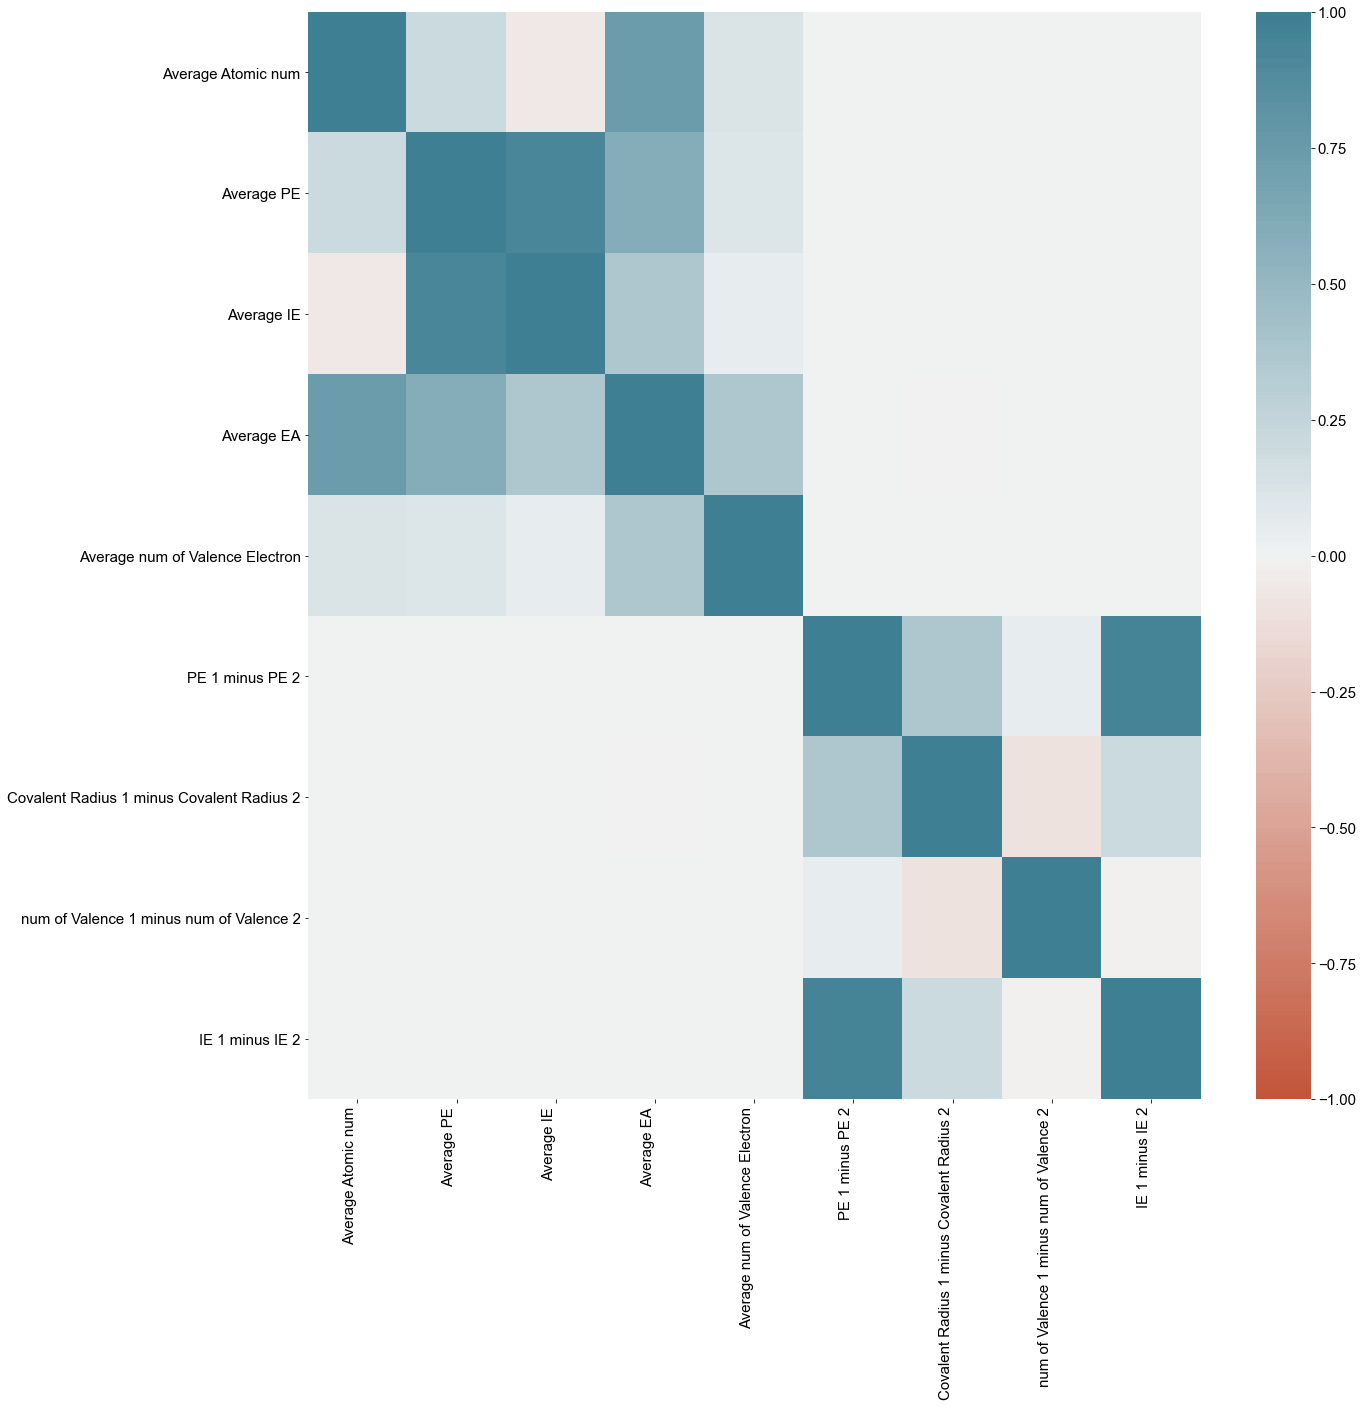

In [56]:
pearson_correlation(df_v7, last=True)

### Round 8

In [57]:
df_v8 = df_v7.copy()

In [58]:
df_v8 = df_v8.drop(columns = ['IE 1 minus IE 2'])

In [59]:
val_score(df_v8, 8, regressors, results_df)

In [60]:
results_df

,# Features,GBR,KNR,RFR,SVR,RR,XGBR,LightGBM,Time
1,52,"[0.037, 0.0492]","[0.0816, 0.097]","[0.0494, 0.0651]","[0.0844, 0.0987]","[0.0831, 0.1035]","[0.0384, 0.0526]","[0.0583, 0.076]",42.230911
2,45,"[0.0372, 0.0488]","[0.0813, 0.0971]","[0.05, 0.0661]","[0.0845, 0.0988]","[0.0825, 0.1034]","[0.039, 0.0537]","[0.0583, 0.076]",40.517865
3,39,"[0.0371, 0.049]","[0.0892, 0.105]","[0.0504, 0.067]","[0.0863, 0.1047]","[0.0814, 0.1019]","[0.0398, 0.0541]","[0.0583, 0.076]",38.516096
4,31,"[0.0341, 0.0453]","[0.0867, 0.1021]","[0.0488, 0.0645]","[0.0902, 0.1085]","[0.0794, 0.0996]","[0.0392, 0.0537]","[0.0617, 0.0798]",36.615173
5,21,"[0.0354, 0.0485]","[0.0856, 0.1012]","[0.049, 0.0653]","[0.0901, 0.108]","[0.078, 0.0978]","[0.0378, 0.0523]","[0.0598, 0.0777]",33.945459
6,10,"[0.0239, 0.0352]","[0.0835, 0.0978]","[0.044, 0.0608]","[0.0823, 0.1008]","[0.0759, 0.0947]","[0.0238, 0.0352]","[0.0592, 0.0769]",30.334425
7,9,"[0.0262, 0.0381]","[0.0835, 0.0978]","[0.048, 0.0654]","[0.0824, 0.1009]","[0.0759, 0.0946]","[0.026, 0.0372]","[0.0589, 0.0767]",29.904791
8,8,"[0.0233, 0.0346]","[0.0778, 0.094]","[0.0459, 0.0632]","[0.0824, 0.0985]","[0.0749, 0.0934]","[0.0212, 0.0327]","[0.0582, 0.0756]",29.547894


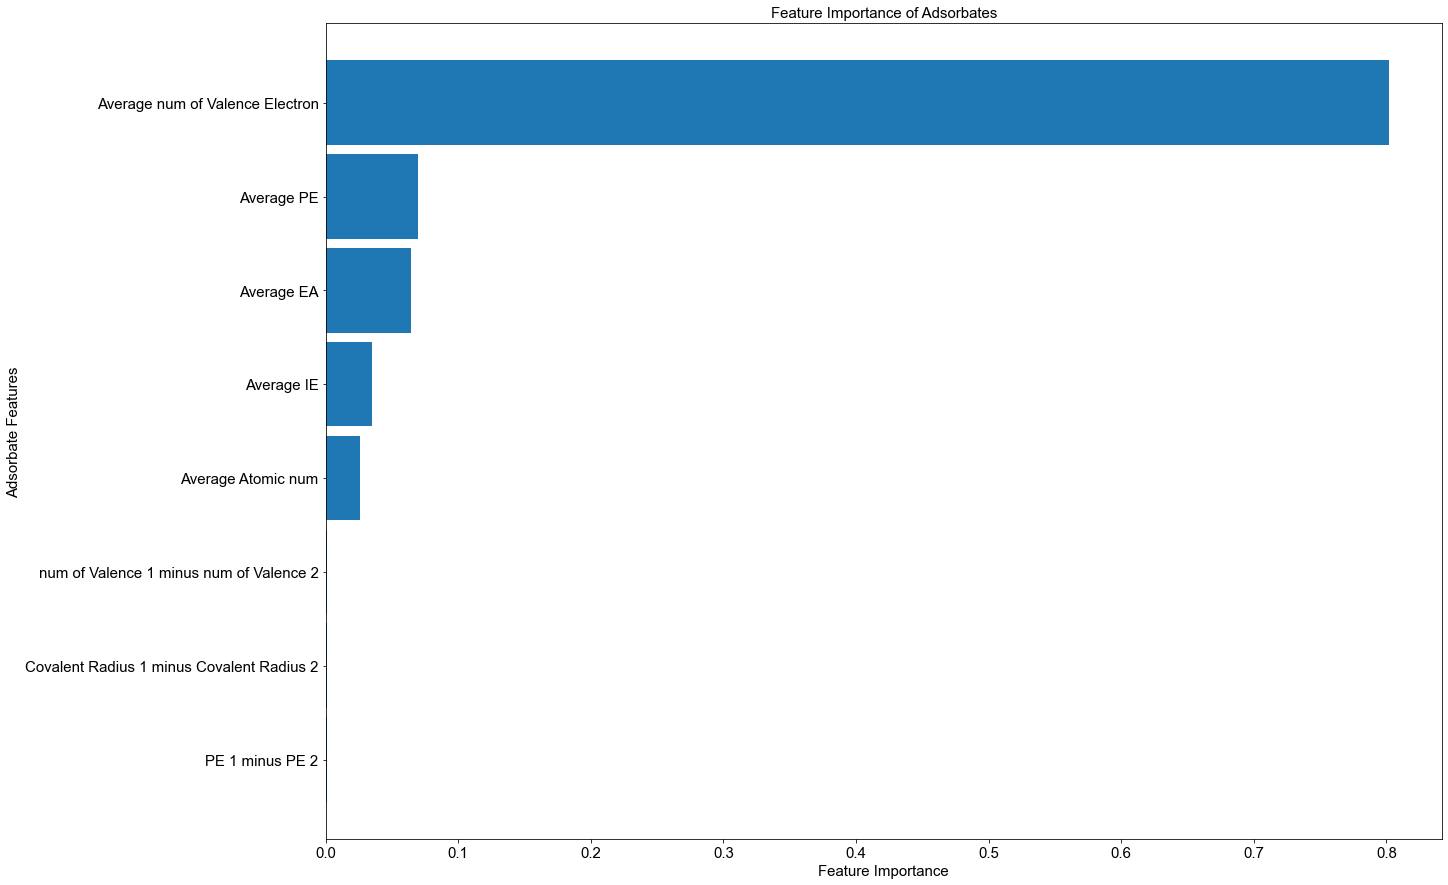

In [61]:
feature_importance(XGBRegressor(), df_v8)

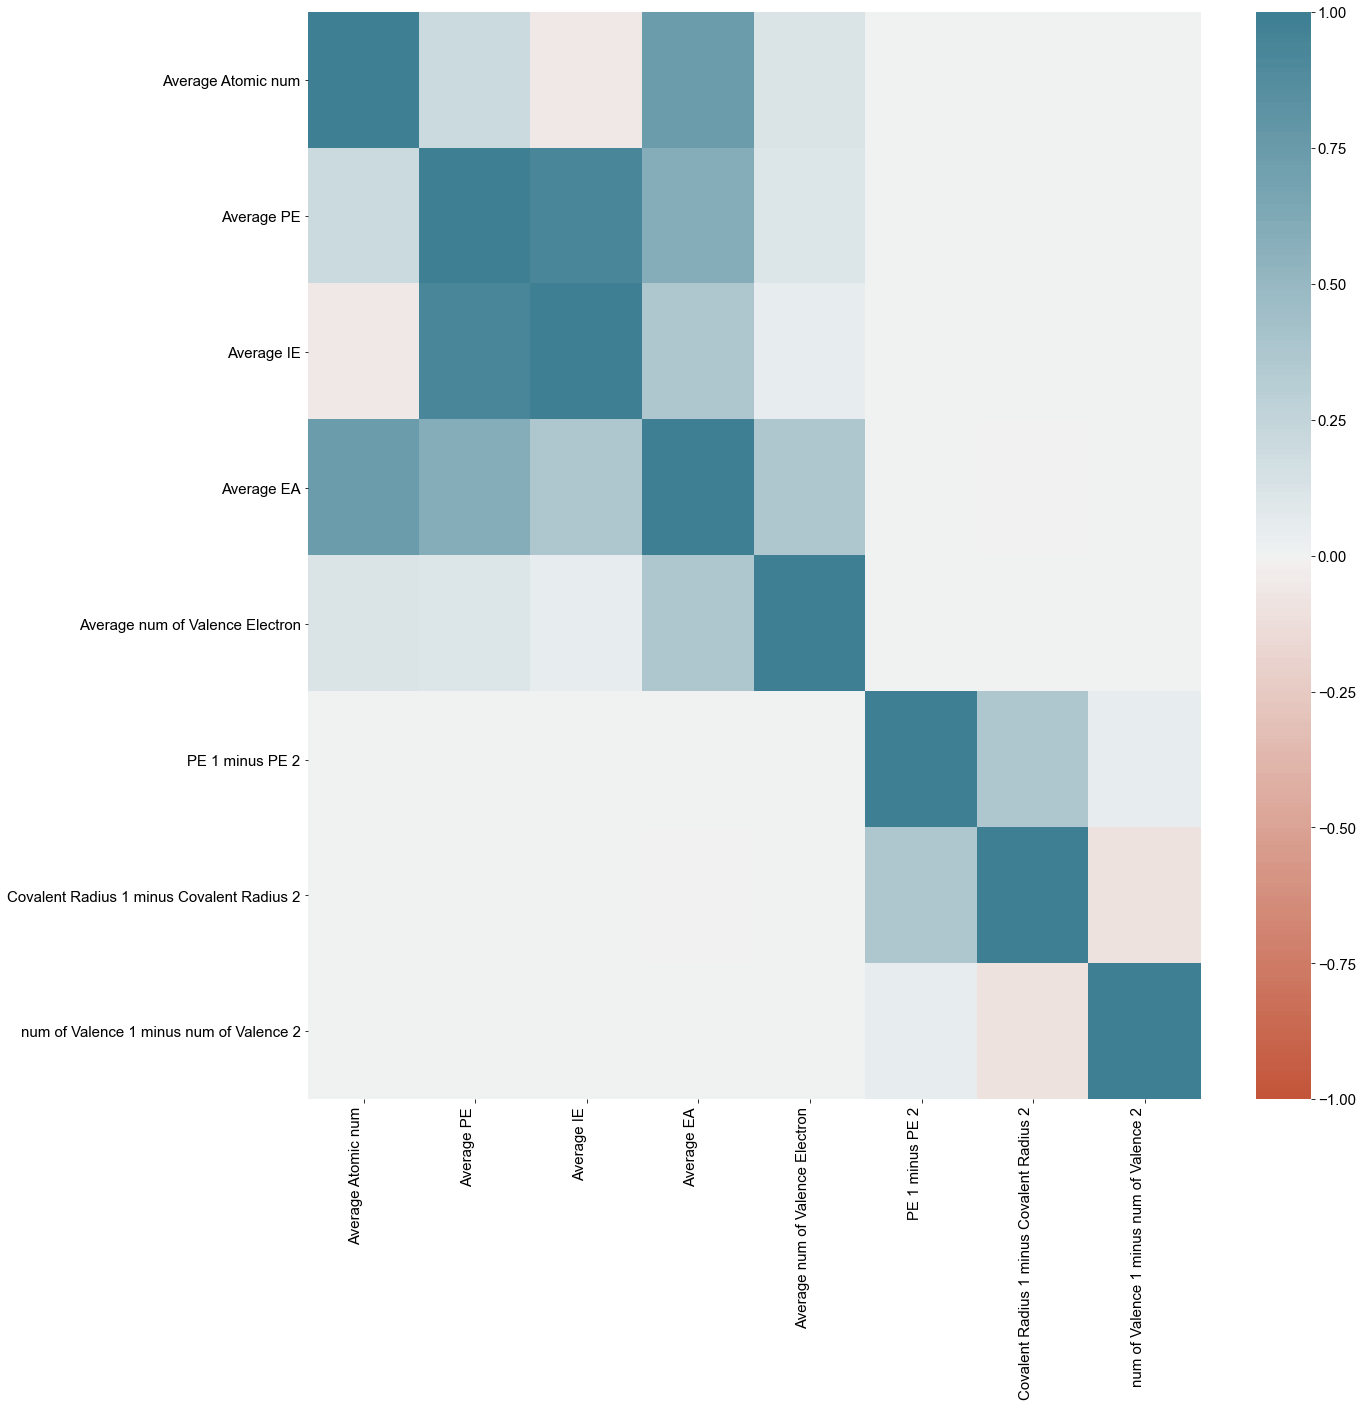

In [62]:
pearson_correlation(df_v8, last=True)

### Round 9

In [63]:
df_v9 = df_v8.copy()

In [64]:
df_v9 = df_v9.drop(columns = ['Average EA'])

In [65]:
val_score(df_v9, 9, regressors, results_df)

In [66]:
results_df

,# Features,GBR,KNR,RFR,SVR,RR,XGBR,LightGBM,Time
1,52,"[0.037, 0.0492]","[0.0816, 0.097]","[0.0494, 0.0651]","[0.0844, 0.0987]","[0.0831, 0.1035]","[0.0384, 0.0526]","[0.0583, 0.076]",42.230911
2,45,"[0.0372, 0.0488]","[0.0813, 0.0971]","[0.05, 0.0661]","[0.0845, 0.0988]","[0.0825, 0.1034]","[0.039, 0.0537]","[0.0583, 0.076]",40.517865
3,39,"[0.0371, 0.049]","[0.0892, 0.105]","[0.0504, 0.067]","[0.0863, 0.1047]","[0.0814, 0.1019]","[0.0398, 0.0541]","[0.0583, 0.076]",38.516096
4,31,"[0.0341, 0.0453]","[0.0867, 0.1021]","[0.0488, 0.0645]","[0.0902, 0.1085]","[0.0794, 0.0996]","[0.0392, 0.0537]","[0.0617, 0.0798]",36.615173
5,21,"[0.0354, 0.0485]","[0.0856, 0.1012]","[0.049, 0.0653]","[0.0901, 0.108]","[0.078, 0.0978]","[0.0378, 0.0523]","[0.0598, 0.0777]",33.945459
6,10,"[0.0239, 0.0352]","[0.0835, 0.0978]","[0.044, 0.0608]","[0.0823, 0.1008]","[0.0759, 0.0947]","[0.0238, 0.0352]","[0.0592, 0.0769]",30.334425
7,9,"[0.0262, 0.0381]","[0.0835, 0.0978]","[0.048, 0.0654]","[0.0824, 0.1009]","[0.0759, 0.0946]","[0.026, 0.0372]","[0.0589, 0.0767]",29.904791
8,8,"[0.0233, 0.0346]","[0.0778, 0.094]","[0.0459, 0.0632]","[0.0824, 0.0985]","[0.0749, 0.0934]","[0.0212, 0.0327]","[0.0582, 0.0756]",29.547894
9,7,"[0.0268, 0.0391]","[0.0779, 0.094]","[0.047, 0.0638]","[0.0824, 0.0981]","[0.0741, 0.0924]","[0.0213, 0.0321]","[0.0589, 0.0775]",29.351321


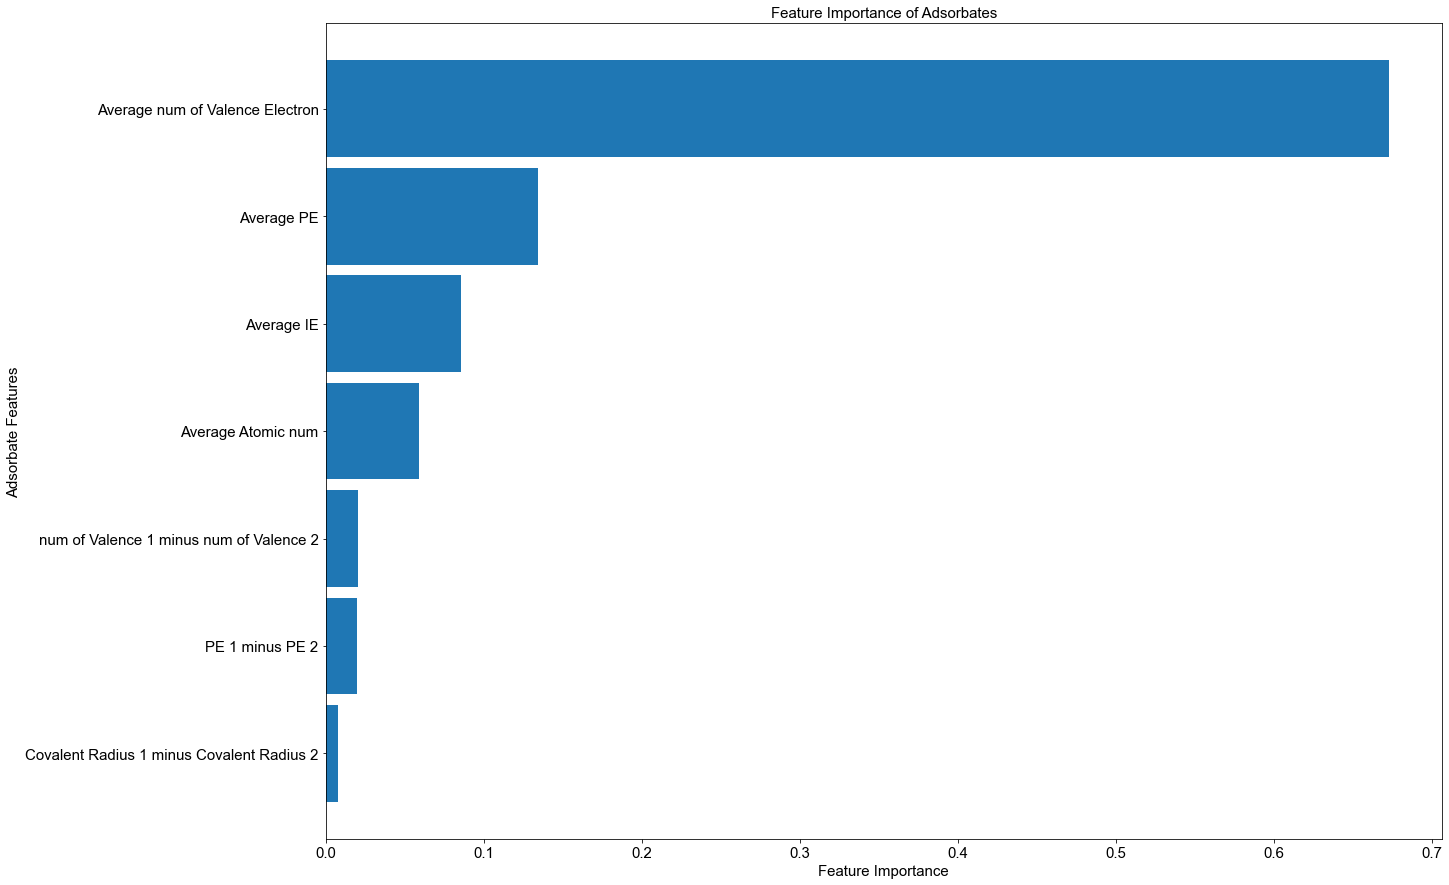

In [67]:
feature_importance(XGBRegressor(), df_v9)

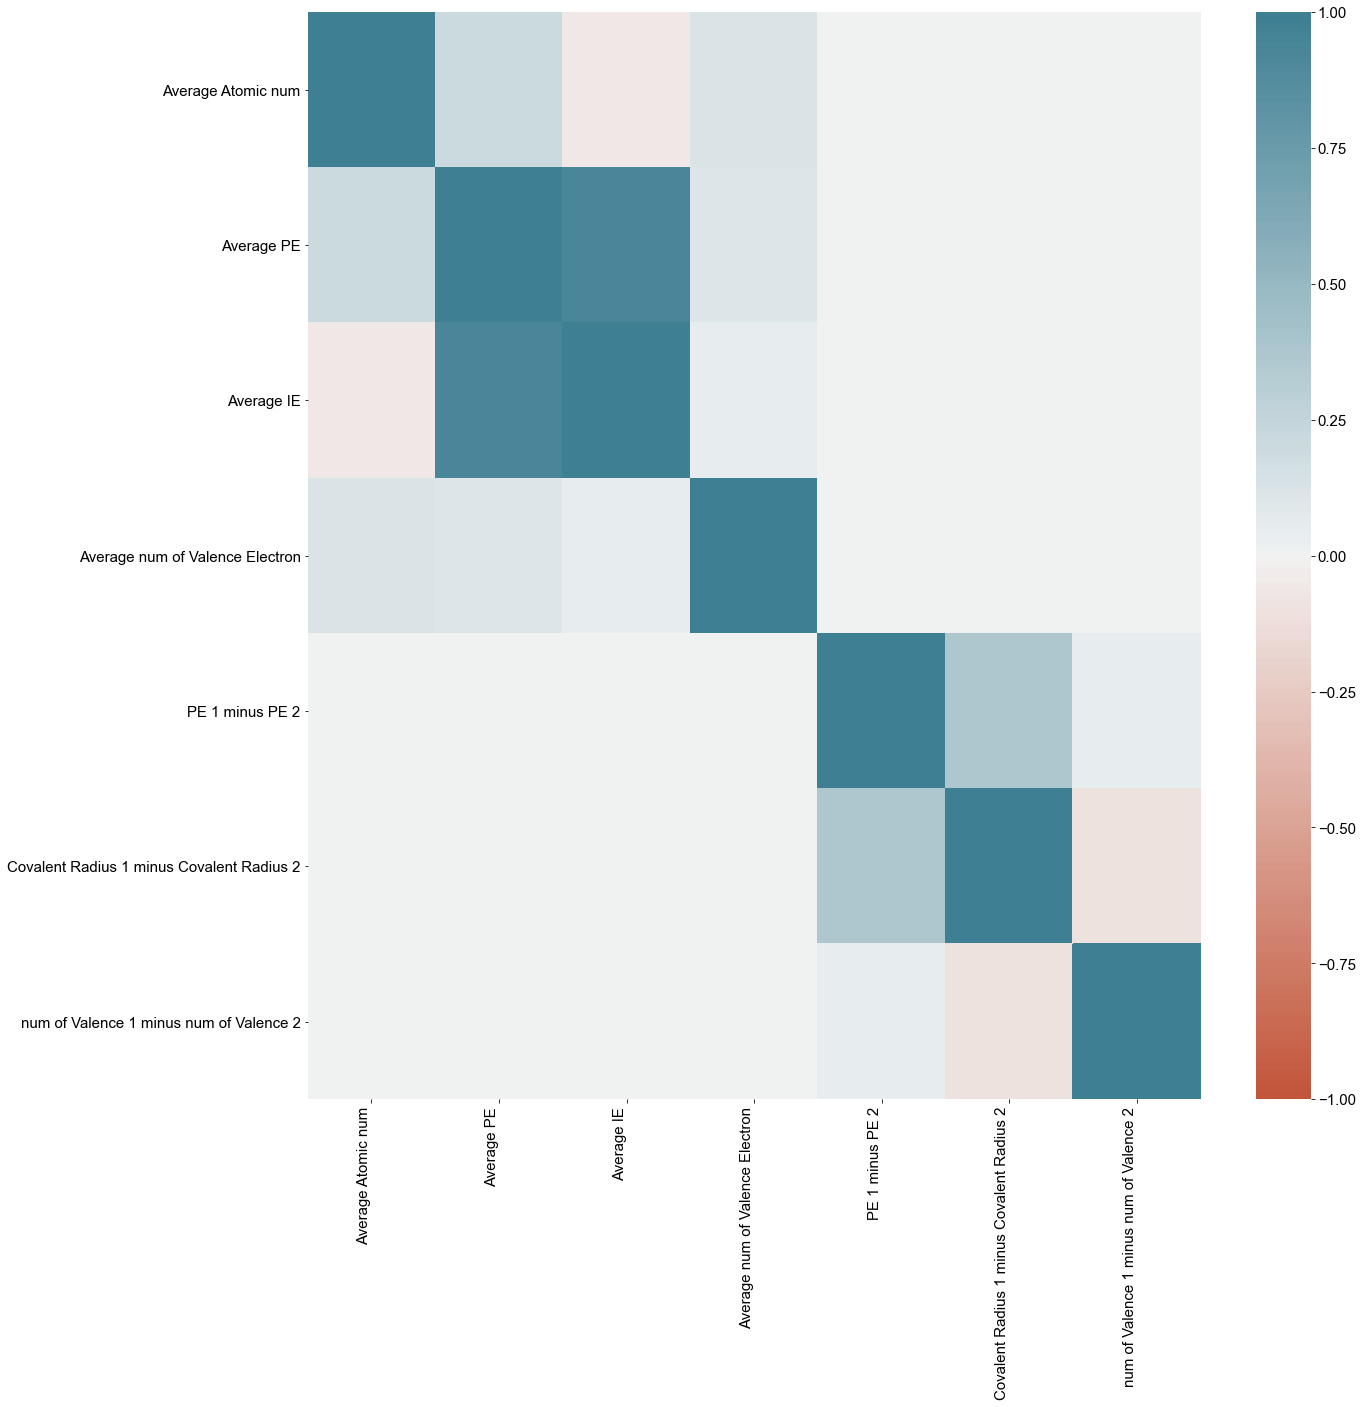

In [68]:
pearson_correlation(df_v9, last=True)

### Round 10

In [69]:
df_v10 = df_v9.copy()

In [70]:
df_v10 = df_v10.drop(columns = [ 'Average Atomic num'])

In [71]:
val_score(df_v10, 10, regressors, results_df)

In [72]:
results_df

,# Features,GBR,KNR,RFR,SVR,RR,XGBR,LightGBM,Time
1,52,"[0.037, 0.0492]","[0.0816, 0.097]","[0.0494, 0.0651]","[0.0844, 0.0987]","[0.0831, 0.1035]","[0.0384, 0.0526]","[0.0583, 0.076]",42.230911
2,45,"[0.0372, 0.0488]","[0.0813, 0.0971]","[0.05, 0.0661]","[0.0845, 0.0988]","[0.0825, 0.1034]","[0.039, 0.0537]","[0.0583, 0.076]",40.517865
3,39,"[0.0371, 0.049]","[0.0892, 0.105]","[0.0504, 0.067]","[0.0863, 0.1047]","[0.0814, 0.1019]","[0.0398, 0.0541]","[0.0583, 0.076]",38.516096
4,31,"[0.0341, 0.0453]","[0.0867, 0.1021]","[0.0488, 0.0645]","[0.0902, 0.1085]","[0.0794, 0.0996]","[0.0392, 0.0537]","[0.0617, 0.0798]",36.615173
5,21,"[0.0354, 0.0485]","[0.0856, 0.1012]","[0.049, 0.0653]","[0.0901, 0.108]","[0.078, 0.0978]","[0.0378, 0.0523]","[0.0598, 0.0777]",33.945459
6,10,"[0.0239, 0.0352]","[0.0835, 0.0978]","[0.044, 0.0608]","[0.0823, 0.1008]","[0.0759, 0.0947]","[0.0238, 0.0352]","[0.0592, 0.0769]",30.334425
7,9,"[0.0262, 0.0381]","[0.0835, 0.0978]","[0.048, 0.0654]","[0.0824, 0.1009]","[0.0759, 0.0946]","[0.026, 0.0372]","[0.0589, 0.0767]",29.904791
8,8,"[0.0233, 0.0346]","[0.0778, 0.094]","[0.0459, 0.0632]","[0.0824, 0.0985]","[0.0749, 0.0934]","[0.0212, 0.0327]","[0.0582, 0.0756]",29.547894
9,7,"[0.0268, 0.0391]","[0.0779, 0.094]","[0.047, 0.0638]","[0.0824, 0.0981]","[0.0741, 0.0924]","[0.0213, 0.0321]","[0.0589, 0.0775]",29.351321
10,6,"[0.0354, 0.0497]","[0.0658, 0.0862]","[0.0478, 0.0629]","[0.0738, 0.0919]","[0.0729, 0.0911]","[0.0269, 0.0379]","[0.0583, 0.0764]",29.433204


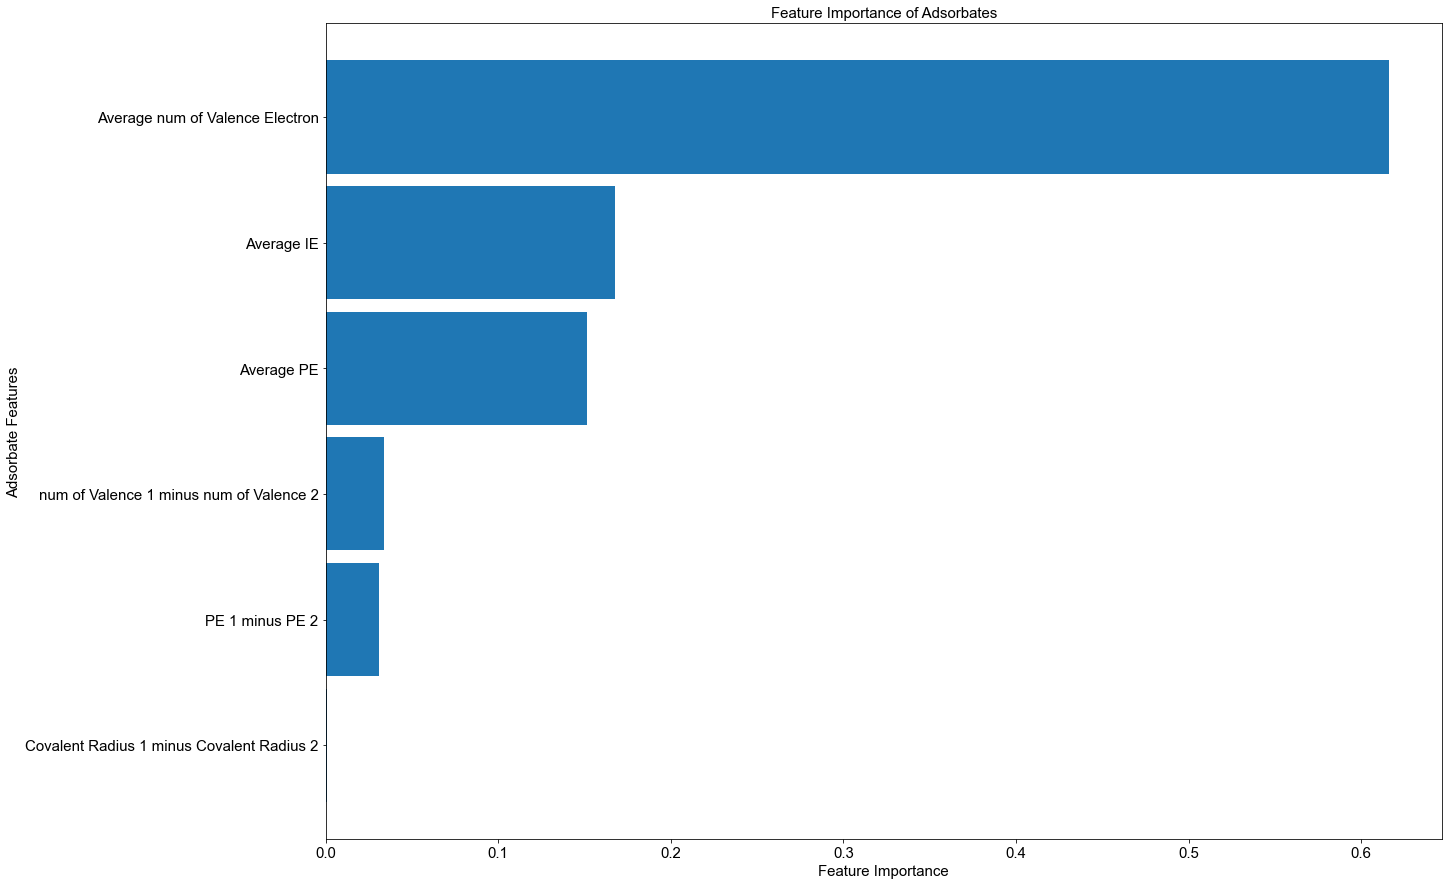

In [73]:
feature_importance(XGBRegressor(), df_v10)

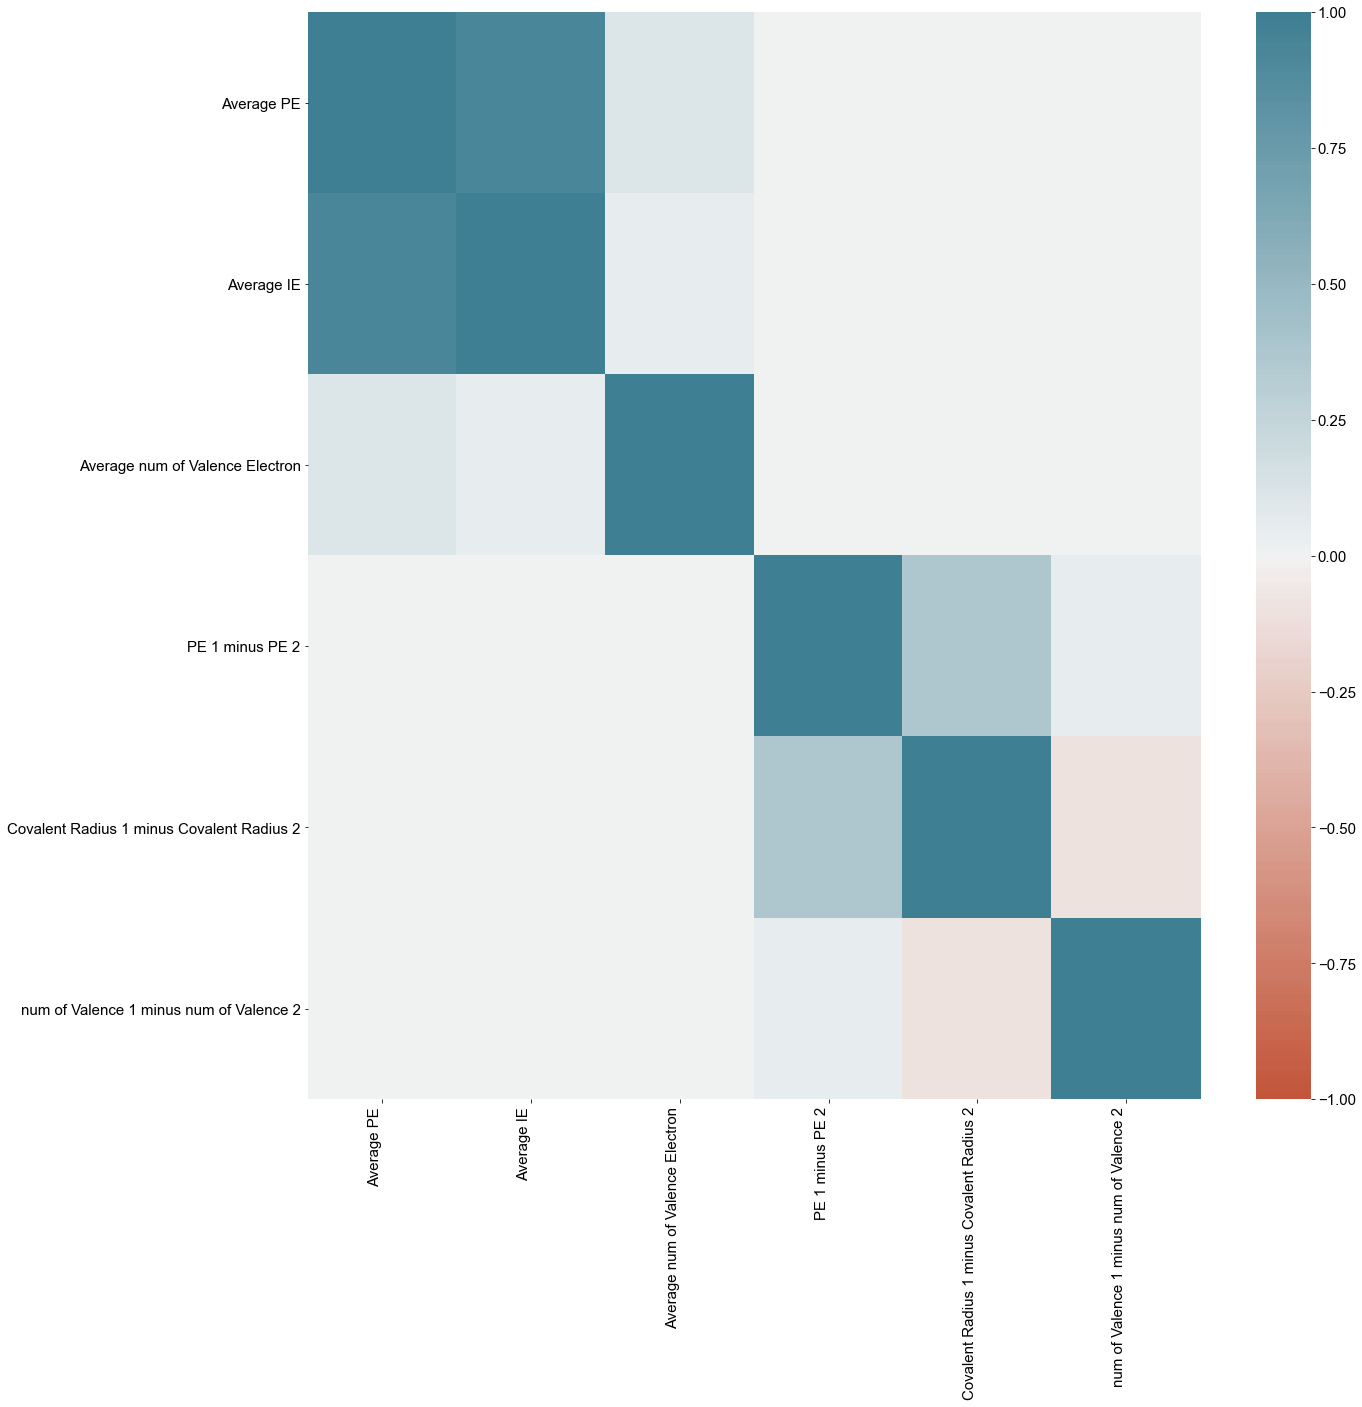

In [74]:
pearson_correlation(df_v10, last=True)

### Final Feature Selection Figures

<ipython-input-177-e04d4589205c>:69: UserWarning:

FixedFormatter should only be used together with FixedLocator



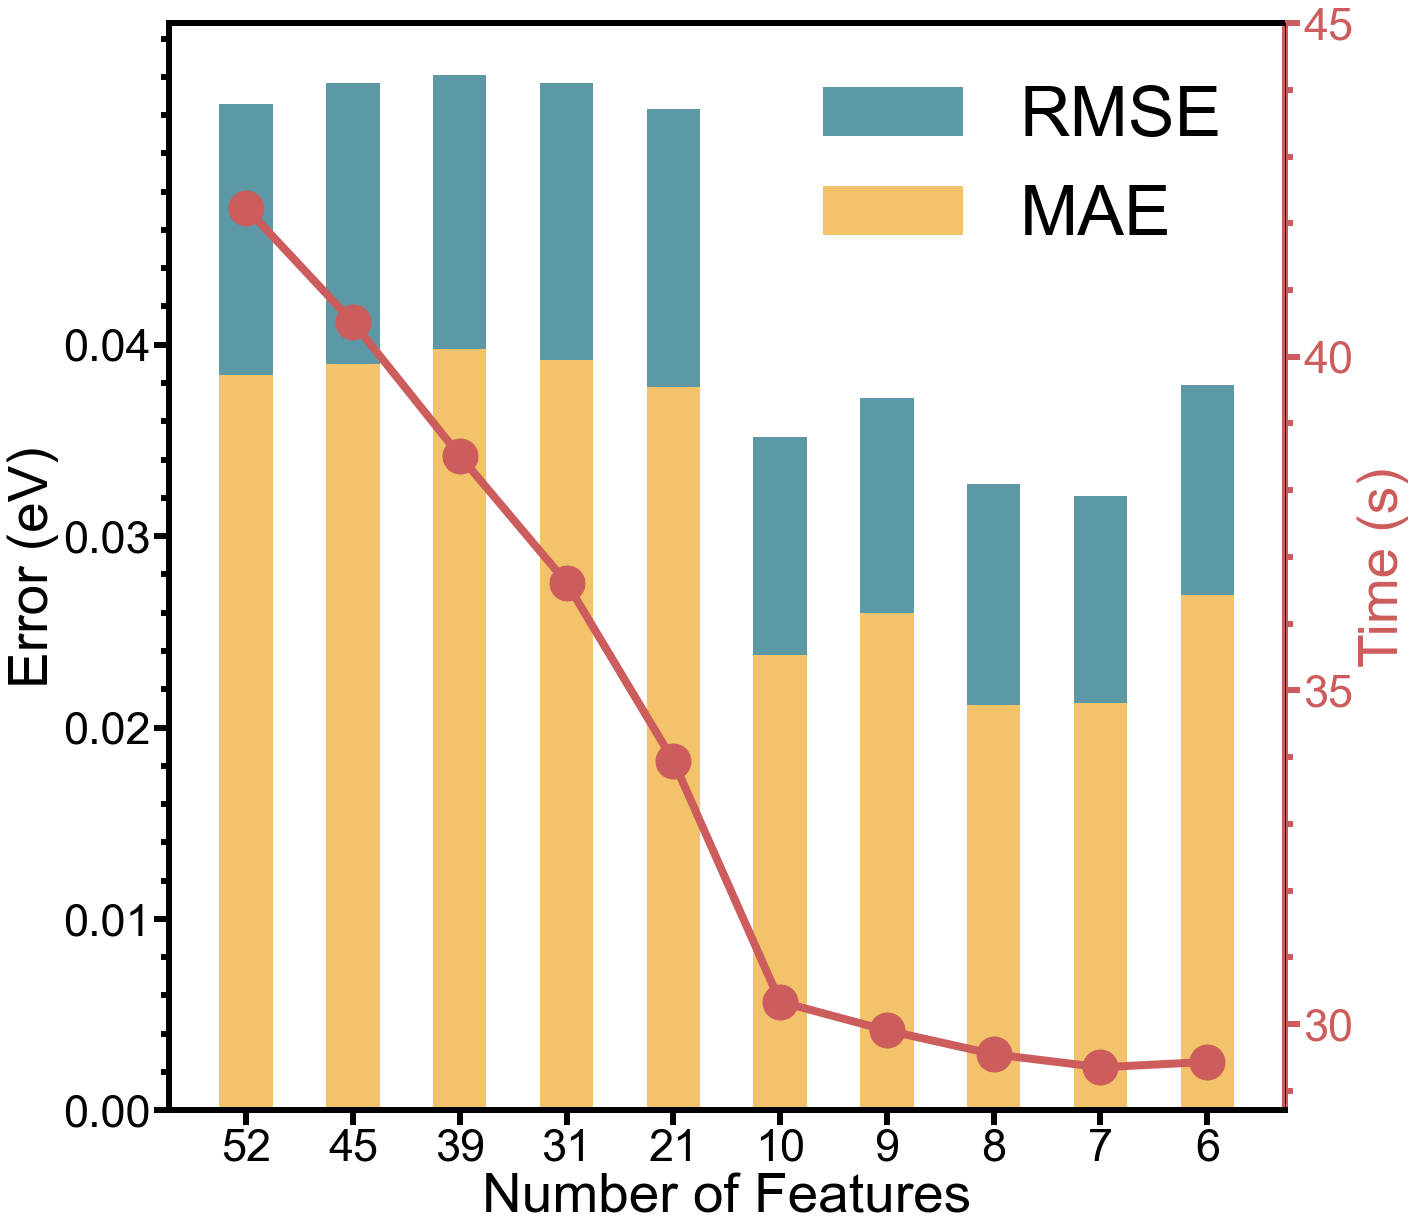

In [177]:
# Get XGBR MAE values
mae_0 = results_df['XGBR'][1][0]
mae_1 = results_df['XGBR'][2][0]
mae_2 = results_df['XGBR'][3][0]
mae_3 = results_df['XGBR'][4][0]
mae_4 = results_df['XGBR'][5][0]
mae_5 = results_df['XGBR'][6][0]
mae_6 = results_df['XGBR'][7][0]
mae_7 = results_df['XGBR'][8][0]
mae_8 = results_df['XGBR'][9][0]
mae_9 = results_df['XGBR'][10][0]
mae = [mae_0, mae_1, mae_2, mae_3, mae_4, mae_5, mae_6, mae_7, mae_8, mae_9]

# Get XGBR RMSE values
rmse_0 = results_df['XGBR'][1][1]
rmse_1 = results_df['XGBR'][2][1]
rmse_2 = results_df['XGBR'][3][1]
rmse_3 = results_df['XGBR'][4][1]
rmse_4 = results_df['XGBR'][5][1]
rmse_5 = results_df['XGBR'][6][1]
rmse_6 = results_df['XGBR'][7][1]
rmse_7 = results_df['XGBR'][8][1]
rmse_8 = results_df['XGBR'][9][1]
rmse_9 = results_df['XGBR'][10][1]
rmse = [rmse_0, rmse_1, rmse_2, rmse_3, rmse_4, rmse_5, rmse_6, rmse_7, rmse_8, rmse_9]

# Get run times
time1 = results_df['Time'][1]
time2 = results_df['Time'][2]
time3 = results_df['Time'][3]
time4 = results_df['Time'][4]
time5 = results_df['Time'][5]
time6 = results_df['Time'][6]
time7 = results_df['Time'][7]
time8 = results_df['Time'][8]
time9 = results_df['Time'][9]
time10 = results_df['Time'][10]
run_time = [time1, time2, time3, time4, time5, time6, time7, time8, time9, time10]

# Get # of features
feature1 = str(results_df['# Features'][1])
feature2 = str(results_df['# Features'][2])
feature3 = str(results_df['# Features'][3])
feature4 = str(results_df['# Features'][4])
feature5 = str(results_df['# Features'][5])
feature6 = str(results_df['# Features'][6])
feature7 = str(results_df['# Features'][7])
feature8 = str(results_df['# Features'][8])
feature9 = str(results_df['# Features'][9])
feature10 = str(results_df['# Features'][10])
ml_features = [feature1, feature2, feature3, feature4, feature5, feature6, feature7, feature8, feature9, feature10]

# Plot figure
ml_features = np.array(ml_features)
run_time = np.array(run_time)
data1 = np.array(rmse)
data2 = np.array(mae)

m1_t = pd.DataFrame({
 'run_time' : run_time,
 'RMSE (eV)' : data1,
 'MAE (eV)' : data2})

fig, ax1 = plt.subplots()

bar1 = ax1.bar(ml_features, m1_t['RMSE (eV)'].values.flatten(), color='#5D98A6', label='RMSE', width=0.5)
bar2 = ax1.bar(ml_features, m1_t['MAE (eV)'].values.flatten(), color='#F2C36B', label='MAE', width=0.5)

ax1.set_xticklabels(ml_features)
ax1.tick_params(axis='y', labelcolor='black', labelsize = 45, width=6, length=15, color='black', which='major')
ax1.tick_params(axis='x', labelcolor='black', labelsize = 45, width=6, length=15, color='black', which='major')
ax1.tick_params(axis='y', labelcolor='black', labelsize = 45, width=6, length=8, color='black', which="minor")

ax1.minorticks_on()
ax1.set_yticks([0, 0.01, 0.02, 0.03, 0.04])

plt.legend([bar1, bar2], ['RMSE', 'MAE'], frameon=False, fontsize = 70);

ax2 = ax1.twinx()

linecolor = '#CD5C5C'
line1 = ax2.plot(ml_features, m1_t['run_time'], marker = 'o', color = linecolor, linewidth = 8, markersize = 35)
ax2.tick_params(axis='y', labelcolor=linecolor, labelsize = 45, width=6, length=15, color=linecolor, which='major')
ax2.tick_params(axis='y', labelcolor=linecolor, labelsize = 45, width=6, length=8, color=linecolor, which="minor")

ax1.set_xlabel('Number of Features', size = 55)
ax1.set_ylabel('Error (eV)', color='black', size = 55)
ax2.set_ylabel('Time (s)', color=linecolor, size = 55)
ax2.minorticks_on()
ax2.set_yticks([30, 35, 40, 45])

for axis in ['top','bottom','left','right']:
    if axis == 'right':
        ax1.spines[axis].set_color(linecolor)
    ax1.spines[axis].set_linewidth(6)

plt.show()

In [76]:
# Save errors to csv
results_df.to_csv('CO Hydrogenation Errors.csv')

<ipython-input-142-8e9e7f1419e4>:25: UserWarning:

FixedFormatter should only be used together with FixedLocator



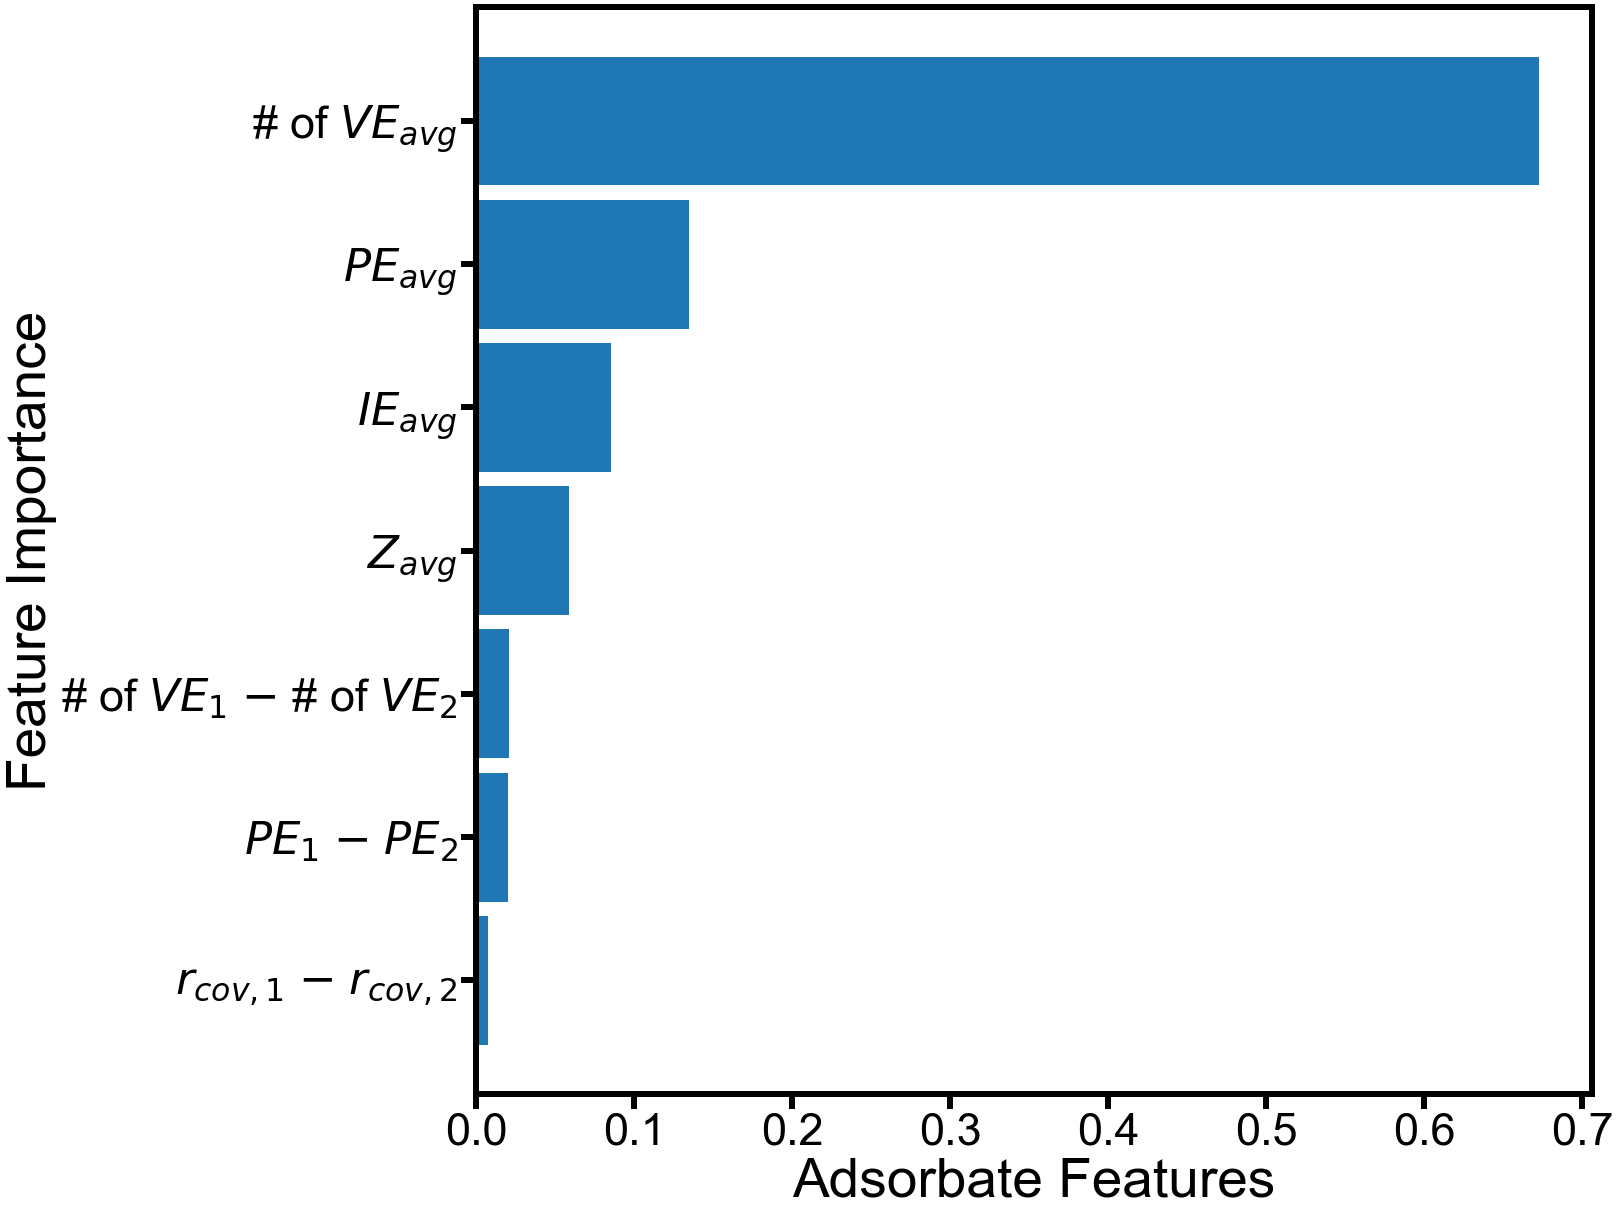

In [142]:
# Plot final feature importance figure

importance_labels = ['# of $VE_{avg}$', '$PE_{avg}$', '$IE_{avg}$', '$Z_{avg}$', 
                     '# of $VE_1$ $-$ # of $VE_2$', '$PE_1$ $-$ $PE_2$', 
                     '$r_{cov, 1}$ $-$ $r_{cov, 2}$']
importance_labels = reversed(importance_labels)

features = df_v9.iloc[:, 0:-1]
target = df_v9.iloc[:, -1]

xgbr.fit(features, target)

importance = xgbr.feature_importances_
features = df_v9.columns[0:-1]

col = zip(features, importance)

# sort and save features based on its importance into a dataframe
importance_data = pd.DataFrame(col, columns=['feature', 'importance'])
importance_data_asc = importance_data.sort_values('importance')

# plot the importance data
fig, ax = plt.subplots()
plt.barh(y=importance_data_asc['feature'], width=importance_data_asc['importance'], height=0.9, color='tab:blue')
ax.set_yticklabels(importance_labels)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(6)

ax.tick_params(axis='x', colors='black', width=6, length=15, color='black')
ax.tick_params(axis='y', colors='black', width=6, length=15, color='black')    

ax.set_xlabel("Adsorbate Features", fontsize = 55)
ax.set_ylabel("Feature Importance", fontsize = 55)

ax.tick_params(axis='x', colors='black', labelsize = 45, width=6, length=15, color='black')
ax.tick_params(axis='y', colors='black', labelsize = 45, width=6, length=15, color='black')

plt.show();

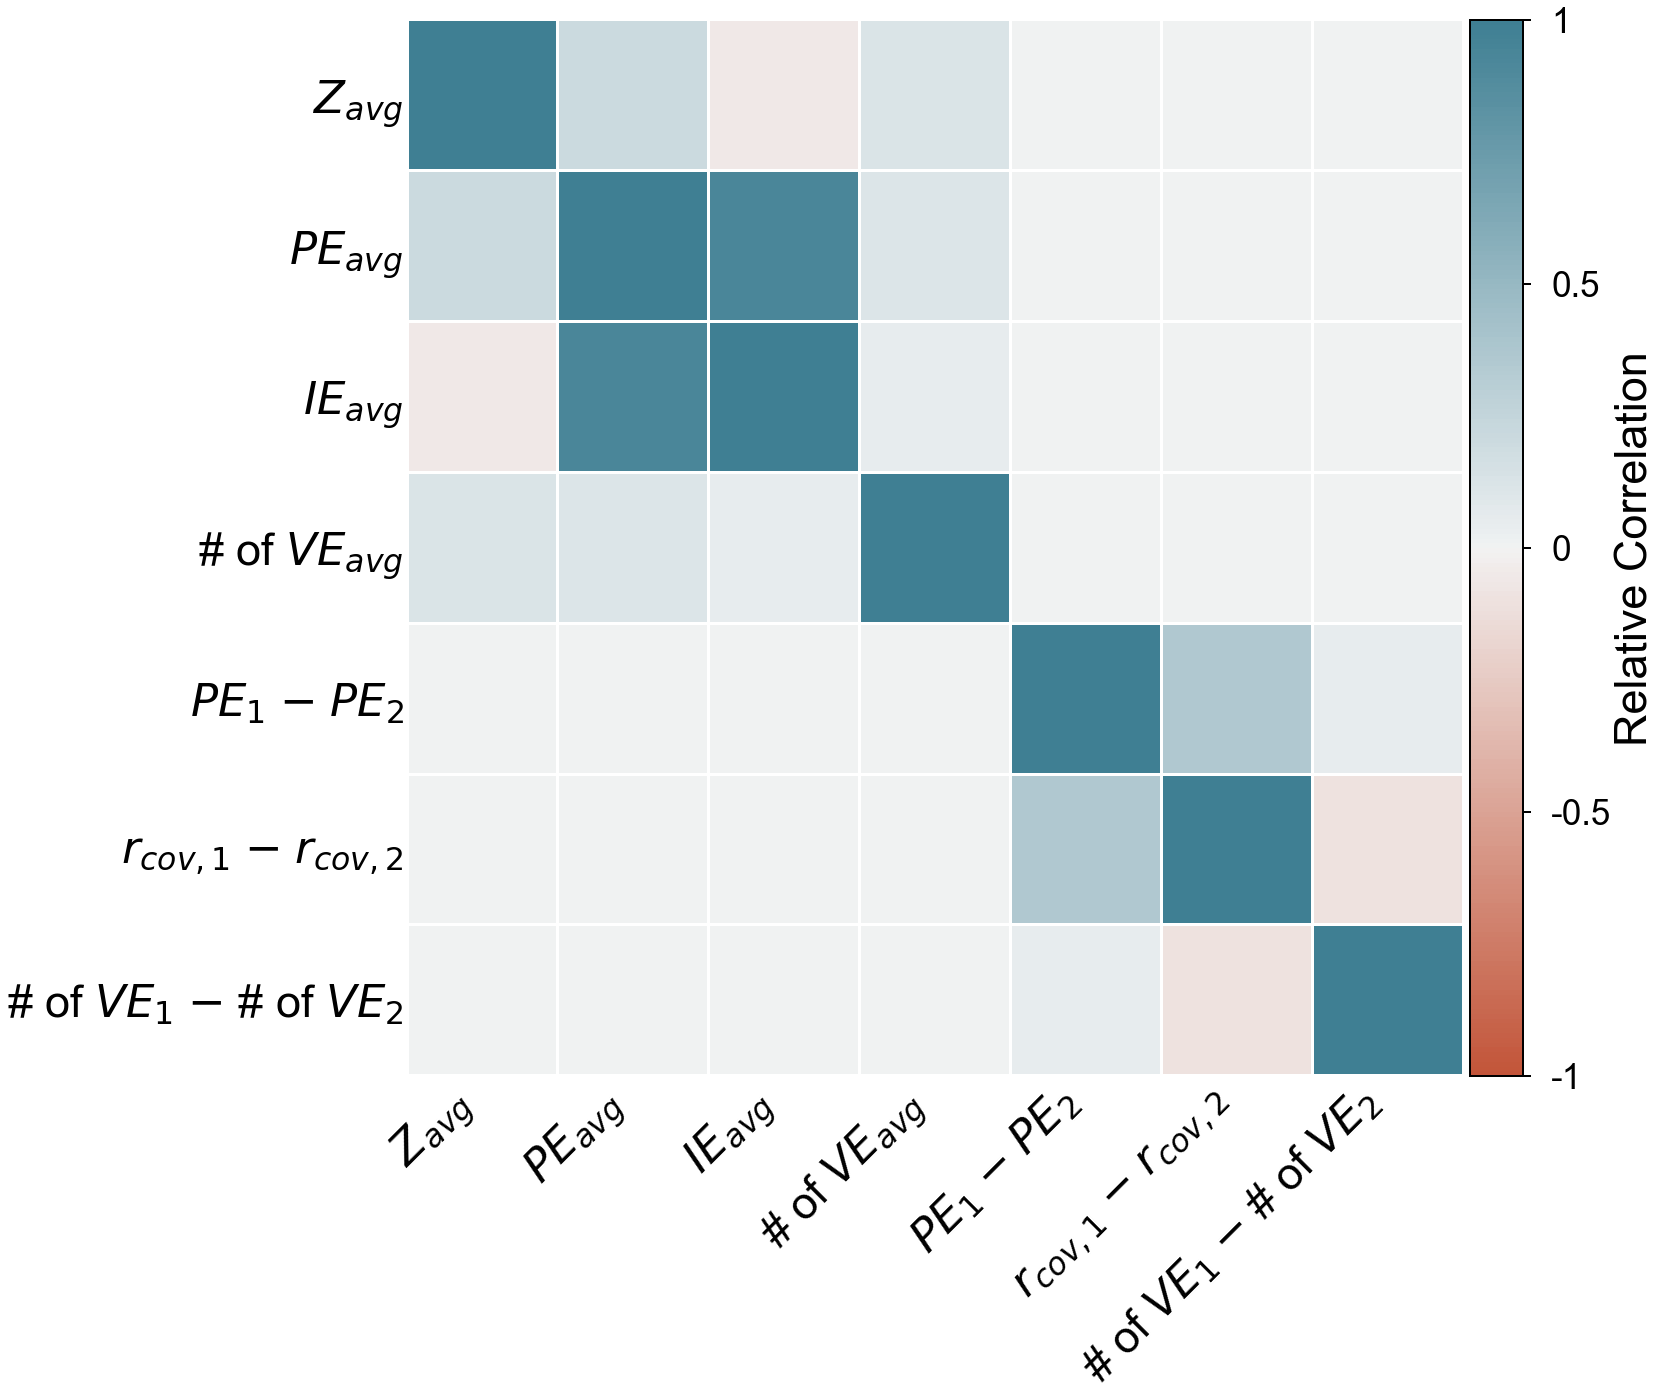

In [78]:
# Plot final correlation figure
from mpl_toolkits.axes_grid1 import make_axes_locatable

corr_labels = ['$Z_{avg}$', '$PE_{avg}$', '$IE_{avg}$', '# of $VE_{avg}$', 
               '$PE_1$ $-$ $PE_2$', '$r_{cov, 1}$ $-$ $r_{cov, 2}$', '# of $VE_1$ $-$ # of $VE_2$']

data = df_v9.iloc[:, :-1]

corr = data.corr()
#sns.set(font_scale=4)

ax = sns.heatmap(corr, linewidth=2,
                 cmap = sns.diverging_palette(20, 220, n=220), square = True, vmin = -1, vmax = 1,
                 cbar=False)
plt.xticks(ha='right')
  
#ax.figure.axes[-1].yaxis.label.set_size(35)

divider = make_axes_locatable(ax) 
cax = divider.append_axes("right", size="5%", pad=0.1) 
cbar = plt.colorbar(ax.collections[0], cax=cax)
cbar.set_ticks([-1, -0.5, 0, 0.5, 1])
cbar.ax.set_yticklabels(['-1', '-0.5', '0', '0.5', '1'], size=35)
cbar.ax.set_ylabel("Relative Correlation", fontsize = 45)
cbar.ax.tick_params(axis='y', which='major', length=8, width = 2, pad=20)
cbar.outline.set_edgecolor('black')
cbar.outline.set_linewidth(2)


    
ax.set_xticklabels(corr_labels, rotation = 45, size = 35)
ax.set_yticklabels(corr_labels, rotation = 0, size = 35)

ax.tick_params(axis='x', labelcolor='black', labelsize = 45, width=0, length=0, color='black') 
ax.tick_params(axis='y', labelcolor='black', labelsize = 45, width=0, length=0, color='black') 

plt.show()

# 4. XGBR Hyperparameter Tuning

In [79]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
import xgboost
import lightgbm

In [80]:
GBR = GradientBoostingRegressor(random_state=42)
KNR = KNeighborsRegressor()
RFR = RandomForestRegressor(random_state=42)
SR = SVR()
ridge = Ridge(random_state=42)
xgbr = xgboost.XGBRegressor(random_state=42)
light = lightgbm.LGBMRegressor(random_state=42)

In [81]:
features = df_v9.iloc[:, 0:-1]
target = df_v9.iloc[:, -1]

In [82]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import RepeatedKFold


# Defining XGBR hyperparameters
xgbr_grid = {
    
    'min_child_weight': [1, 5, 10],
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8, 10],
    'learning_rate': [0.3, 1, 2],
    'colsample_bytree': [0.1, 0.5, 0.8, 1],
    'colsample_bylevel': [0.1, 0.5, 0.8, 1],

}


fold = RepeatedKFold(n_splits = 10, n_repeats = 1, random_state = 42)

In [83]:
# Performing Randomized CV search on XGBR
xgbr_grid_cv = GridSearchCV(estimator = xgbr, cv = fold,
            param_grid = xgbr_grid, n_jobs = -1, scoring='neg_root_mean_squared_error',
            verbose = 5, return_train_score = True, refit = True)

In [84]:
xgbr_grid_cv.fit(features, target)

Fitting 10 folds for each of 1728 candidates, totalling 17280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 256 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 616 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 850 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 1120 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done 1426 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done 1768 tasks      | elapsed:   22.6s
[Parallel(n_jobs=-1)]: Done 2146 tasks      | elapsed:   26.2s
[Parallel(n_jobs=-1)]: Done 2560 tasks      | elapsed:   30.3s
[Parallel(n_jobs=-1)]: Done 3010 tasks      | elapsed:   34.0s
[Parallel(n_jobs=-1)]: Done 3496 tasks      | elapsed:   38.7s
[Parallel(n_jobs=-1)]: Done 4018 tasks      | elapsed:   43.4s
[Parallel(n_jobs=-1)]: Done 4576 tasks      | e

GridSearchCV(cv=RepeatedKFold(n_repeats=1, n_splits=10, random_state=42),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=n...
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parameters=None,
                                    verbosity=None),
             n_jobs=-1,
             param_grid={'colsample_bylevel': [0.1, 0.5, 0.8, 1],
                         'colsa

In [85]:
xgbr_grid_cv.best_params_

{'colsample_bylevel': 1,
 'colsample_bytree': 1,
 'learning_rate': 0.3,
 'max_depth': 4,
 'min_child_weight': 1,
 'n_estimators': 200}

In [86]:
xgbr_grid_cv.best_score_

-0.028033517567045668

In [87]:
xgbr_grid_cv.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.3, max_delta_step=0, max_depth=4,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=16, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [88]:
from sklearn.model_selection import cross_val_score

xgbr_optimized = xgbr_grid_cv.best_estimator_

rmse_score = cross_val_score(xgbr_optimized, features, target, cv = fold, scoring='neg_root_mean_squared_error')
mae_score = cross_val_score(xgbr_optimized, features, target, cv = fold, scoring='neg_mean_absolute_error')

In [89]:
optimized_xgbr_rmse = np.abs(rmse_score).mean()
optimized_xgbr_mae = np.abs(mae_score).mean()

In [90]:
optimized_xgbr_rmse, optimized_xgbr_mae

(0.028033517567045668, 0.021013201567065147)

# 5. Analysis of Separation Ratios

In [91]:
from tqdm.auto import tqdm

separations = [2,3,4,5,6,7,8,9,10]

mae_results = []
rmse_results = []
r2_results = []

for split in tqdm(separations):
    fold = RepeatedKFold(n_splits=split, n_repeats=10, random_state=42)
    mae = cross_val_score(xgbr_optimized, features, target, cv=fold, scoring='neg_mean_absolute_error')
    rmse = cross_val_score(xgbr_optimized, features, target, cv=fold, scoring='neg_root_mean_squared_error')
    r2 = cross_val_score(xgbr_optimized, features, target, cv=fold, scoring='r2')
    mae_results.append(np.abs(mae).mean())
    rmse_results.append(np.abs(rmse).mean())
    r2_results.append(np.abs(r2).mean())

In [92]:
def squarify(fig):
    w, h = fig.get_size_inches()
    if w > h:
        t = fig.subplotpars.top
        b = fig.subplotpars.bottom
        axs = h*(t-b)
        l = (1.-axs/w)/2
        fig.subplots_adjust(left=l, right=1-l)
    else:
        t = fig.subplotpars.right
        b = fig.subplotpars.left
        axs = w*(t-b)
        l = (1.-axs/h)/2
        fig.subplots_adjust(bottom=l, top=1-l)
    
    return fig

## Training/Testing Ratio Final Plot

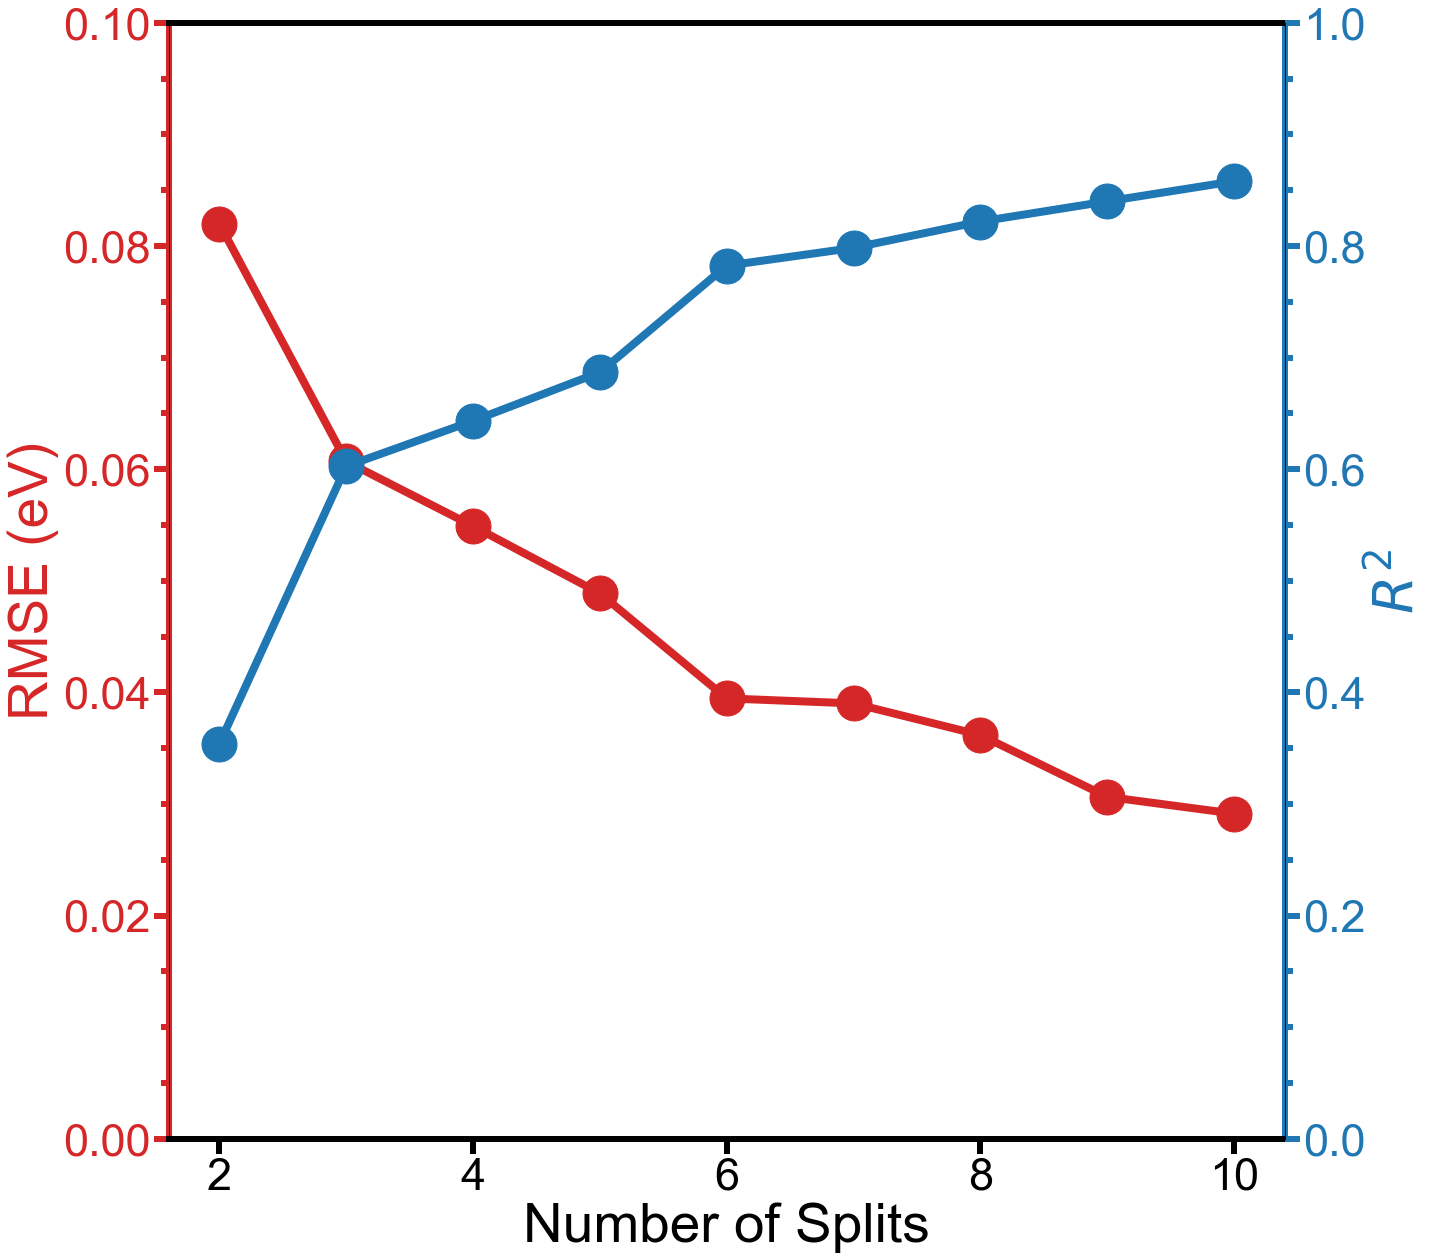

In [144]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

t = separations
data1 = np.array(rmse_results)
data2 = np.array(r2_results)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Number of Splits', size = 55)
ax1.set_ylabel('RMSE (eV)', color=color, size = 55)
ax1.plot(t, data1, color=color, marker = 'o', linewidth = 8, markersize = 35, label = 'RMSE (eV)')
ax1.tick_params(axis='y', labelcolor=color, labelsize = 45, width=6, length=15, color=color, which="major")
ax1.tick_params(axis='y', labelcolor=color, labelsize = 45, width=6, length=8, color=color, which="minor")

ax1.tick_params(axis='x', colors='black', labelsize = 45, width=6, length=15, color='black')
for axis in ['top','bottom','left','right']:
    if axis == 'left':
        ax1.spines[axis].set_color(color)
    ax1.spines[axis].set_linewidth(5)

#plt.xticks(fontsize=45, color='black')
ax1.minorticks_on()
ax1.set_yticks([0, 0.02, 0.04, 0.06, 0.08, 0.1])

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('$R^2$', color=color, size = 55)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color, marker = 'o', linewidth = 8, markersize = 35, label = '$R^2$')
ax2.tick_params(axis='y', labelcolor=color, labelsize = 45, width=6, length=15, color=color, which='major')
ax2.tick_params(axis='y', labelcolor=color, labelsize = 45, width=6, length=8, color=color, which="minor")

for axis in ['top','bottom','left','right']:
    if axis == 'right':
        ax1.spines[axis].set_color(color)
    ax1.spines[axis].set_linewidth(6)

ax2.minorticks_on()
ax2.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()

lines = lines_1 + lines_2
labels = labels_1 + labels_2

#ax1.legend(lines, labels, loc=9, frameon=False, fontsize = 45)
fig = squarify(fig)
#fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# 6. Neural Network Implementation

In [94]:
from nn import train_model_rmse, train_model_mae, load_model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, train_size = 0.9, random_state = 42)

In [95]:
import time

start = time.time()
model_history_rmse = train_model_rmse(X_train, y_train, num_cols = len(features.columns))
end = time.time()

print('Time taken to train this neural network was {} seconds'.format(int(end - start)))

Epoch 1/1600
1/1 [==============================] - 2s 2s/step - loss: 0.2371 - val_loss: 0.1765

Epoch 00001: val_loss improved from inf to 0.17646, saving model to model_best_weights.h5
Epoch 2/1600
1/1 [==============================] - 0s 34ms/step - loss: 0.2373 - val_loss: 0.1757

Epoch 00002: val_loss improved from 0.17646 to 0.17569, saving model to model_best_weights.h5
Epoch 3/1600
1/1 [==============================] - 0s 34ms/step - loss: 0.2290 - val_loss: 0.1750

Epoch 00003: val_loss improved from 0.17569 to 0.17496, saving model to model_best_weights.h5
Epoch 4/1600
1/1 [==============================] - 0s 34ms/step - loss: 0.2307 - val_loss: 0.1744

Epoch 00004: val_loss improved from 0.17496 to 0.17439, saving model to model_best_weights.h5
Epoch 5/1600
1/1 [==============================] - 0s 33ms/step - loss: 0.2244 - val_loss: 0.1737

Epoch 00005: val_loss improved from 0.17439 to 0.17373, saving model to model_best_weights.h5
Epoch 6/1600
1/1 [==================

1/1 [==============================] - 0s 32ms/step - loss: 0.1850 - val_loss: 0.1297

Epoch 00043: val_loss did not improve from 0.12953
Epoch 44/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.1826 - val_loss: 0.1290

Epoch 00044: val_loss improved from 0.12953 to 0.12899, saving model to model_best_weights.h5
Epoch 45/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.1806 - val_loss: 0.1279

Epoch 00045: val_loss improved from 0.12899 to 0.12792, saving model to model_best_weights.h5
Epoch 46/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.1846 - val_loss: 0.1267

Epoch 00046: val_loss improved from 0.12792 to 0.12670, saving model to model_best_weights.h5
Epoch 47/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.1765 - val_loss: 0.1265

Epoch 00047: val_loss improved from 0.12670 to 0.12650, saving model to model_best_weights.h5
Epoch 48/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.1789 -

1/1 [==============================] - 0s 32ms/step - loss: 0.1332 - val_loss: 0.1119

Epoch 00091: val_loss did not improve from 0.10570
Epoch 92/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.1316 - val_loss: 0.1107

Epoch 00092: val_loss did not improve from 0.10570
Epoch 93/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.1350 - val_loss: 0.1088

Epoch 00093: val_loss did not improve from 0.10570
Epoch 94/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.1264 - val_loss: 0.1081

Epoch 00094: val_loss did not improve from 0.10570
Epoch 95/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.1386 - val_loss: 0.1078

Epoch 00095: val_loss did not improve from 0.10570
Epoch 96/1600
1/1 [==============================] - 0s 33ms/step - loss: 0.1306 - val_loss: 0.1067

Epoch 00096: val_loss did not improve from 0.10570
Epoch 97/1600
1/1 [==============================] - 0s 29ms/step - loss: 0.1216 - val_loss: 0.1080

E

1/1 [==============================] - 0s 31ms/step - loss: 0.0955 - val_loss: 0.1235

Epoch 00144: val_loss did not improve from 0.10262
Epoch 145/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0931 - val_loss: 0.1204

Epoch 00145: val_loss did not improve from 0.10262
Epoch 146/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0885 - val_loss: 0.1214

Epoch 00146: val_loss did not improve from 0.10262
Epoch 147/1600
1/1 [==============================] - 0s 29ms/step - loss: 0.0929 - val_loss: 0.1193

Epoch 00147: val_loss did not improve from 0.10262
Epoch 148/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0928 - val_loss: 0.1154

Epoch 00148: val_loss did not improve from 0.10262
Epoch 149/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0886 - val_loss: 0.1125

Epoch 00149: val_loss did not improve from 0.10262
Epoch 150/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0877 - val_loss: 0.1


Epoch 00197: val_loss did not improve from 0.10262
Epoch 198/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0763 - val_loss: 0.1283

Epoch 00198: val_loss did not improve from 0.10262
Epoch 199/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0670 - val_loss: 0.1273

Epoch 00199: val_loss did not improve from 0.10262
Epoch 200/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0803 - val_loss: 0.1253

Epoch 00200: val_loss did not improve from 0.10262
Epoch 201/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0686 - val_loss: 0.1247

Epoch 00201: val_loss did not improve from 0.10262
Epoch 202/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0777 - val_loss: 0.1235

Epoch 00202: val_loss did not improve from 0.10262
Epoch 203/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0731 - val_loss: 0.1227

Epoch 00203: val_loss did not improve from 0.10262
Epoch 204/1600
1/1 [==========

1/1 [==============================] - 0s 31ms/step - loss: 0.0680 - val_loss: 0.1298

Epoch 00251: val_loss did not improve from 0.10262
Epoch 252/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0770 - val_loss: 0.1297

Epoch 00252: val_loss did not improve from 0.10262
Epoch 253/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0697 - val_loss: 0.1282

Epoch 00253: val_loss did not improve from 0.10262
Epoch 254/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0696 - val_loss: 0.1275

Epoch 00254: val_loss did not improve from 0.10262
Epoch 255/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0618 - val_loss: 0.1296

Epoch 00255: val_loss did not improve from 0.10262
Epoch 256/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0644 - val_loss: 0.1312

Epoch 00256: val_loss did not improve from 0.10262
Epoch 257/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0597 - val_loss: 0.1


Epoch 00304: val_loss did not improve from 0.10262
Epoch 305/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0671 - val_loss: 0.1256

Epoch 00305: val_loss did not improve from 0.10262
Epoch 306/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0574 - val_loss: 0.1248

Epoch 00306: val_loss did not improve from 0.10262
Epoch 307/1600
1/1 [==============================] - 0s 29ms/step - loss: 0.0610 - val_loss: 0.1249

Epoch 00307: val_loss did not improve from 0.10262
Epoch 308/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0648 - val_loss: 0.1235

Epoch 00308: val_loss did not improve from 0.10262
Epoch 309/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0626 - val_loss: 0.1228

Epoch 00309: val_loss did not improve from 0.10262
Epoch 310/1600
1/1 [==============================] - 0s 29ms/step - loss: 0.0611 - val_loss: 0.1217

Epoch 00310: val_loss did not improve from 0.10262
Epoch 311/1600
1/1 [==========

1/1 [==============================] - 0s 31ms/step - loss: 0.0681 - val_loss: 0.1256

Epoch 00358: val_loss did not improve from 0.10262
Epoch 359/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0644 - val_loss: 0.1264

Epoch 00359: val_loss did not improve from 0.10262
Epoch 360/1600
1/1 [==============================] - 0s 33ms/step - loss: 0.0643 - val_loss: 0.1266

Epoch 00360: val_loss did not improve from 0.10262
Epoch 361/1600
1/1 [==============================] - 0s 36ms/step - loss: 0.0555 - val_loss: 0.1267

Epoch 00361: val_loss did not improve from 0.10262
Epoch 362/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0557 - val_loss: 0.1255

Epoch 00362: val_loss did not improve from 0.10262
Epoch 363/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0666 - val_loss: 0.1238

Epoch 00363: val_loss did not improve from 0.10262
Epoch 364/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0621 - val_loss: 0.1


Epoch 00411: val_loss did not improve from 0.10262
Epoch 412/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0619 - val_loss: 0.1343

Epoch 00412: val_loss did not improve from 0.10262
Epoch 413/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0619 - val_loss: 0.1342

Epoch 00413: val_loss did not improve from 0.10262
Epoch 414/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0603 - val_loss: 0.1326

Epoch 00414: val_loss did not improve from 0.10262
Epoch 415/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0589 - val_loss: 0.1312

Epoch 00415: val_loss did not improve from 0.10262
Epoch 416/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0638 - val_loss: 0.1294

Epoch 00416: val_loss did not improve from 0.10262
Epoch 417/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0550 - val_loss: 0.1285

Epoch 00417: val_loss did not improve from 0.10262
Epoch 418/1600
1/1 [==========

1/1 [==============================] - 0s 29ms/step - loss: 0.0540 - val_loss: 0.1266

Epoch 00465: val_loss did not improve from 0.10262
Epoch 466/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0571 - val_loss: 0.1262

Epoch 00466: val_loss did not improve from 0.10262
Epoch 467/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0463 - val_loss: 0.1256

Epoch 00467: val_loss did not improve from 0.10262
Epoch 468/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0630 - val_loss: 0.1270

Epoch 00468: val_loss did not improve from 0.10262
Epoch 469/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0661 - val_loss: 0.1287

Epoch 00469: val_loss did not improve from 0.10262
Epoch 470/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0525 - val_loss: 0.1275

Epoch 00470: val_loss did not improve from 0.10262
Epoch 471/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0580 - val_loss: 0.1


Epoch 00518: val_loss did not improve from 0.10262
Epoch 519/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0581 - val_loss: 0.1237

Epoch 00519: val_loss did not improve from 0.10262
Epoch 520/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0534 - val_loss: 0.1201

Epoch 00520: val_loss did not improve from 0.10262
Epoch 521/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0586 - val_loss: 0.1172

Epoch 00521: val_loss did not improve from 0.10262
Epoch 522/1600
1/1 [==============================] - 0s 33ms/step - loss: 0.0562 - val_loss: 0.1142

Epoch 00522: val_loss did not improve from 0.10262
Epoch 523/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0594 - val_loss: 0.1138

Epoch 00523: val_loss did not improve from 0.10262
Epoch 524/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0586 - val_loss: 0.1117

Epoch 00524: val_loss did not improve from 0.10262
Epoch 525/1600
1/1 [==========

1/1 [==============================] - 0s 32ms/step - loss: 0.0615 - val_loss: 0.1270

Epoch 00572: val_loss did not improve from 0.10262
Epoch 573/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0549 - val_loss: 0.1285

Epoch 00573: val_loss did not improve from 0.10262
Epoch 574/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0449 - val_loss: 0.1278

Epoch 00574: val_loss did not improve from 0.10262
Epoch 575/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0544 - val_loss: 0.1262

Epoch 00575: val_loss did not improve from 0.10262
Epoch 576/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0561 - val_loss: 0.1231

Epoch 00576: val_loss did not improve from 0.10262
Epoch 577/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0549 - val_loss: 0.1207

Epoch 00577: val_loss did not improve from 0.10262
Epoch 578/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0514 - val_loss: 0.1


Epoch 00625: val_loss did not improve from 0.10262
Epoch 626/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0584 - val_loss: 0.1281

Epoch 00626: val_loss did not improve from 0.10262
Epoch 627/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0648 - val_loss: 0.1263

Epoch 00627: val_loss did not improve from 0.10262
Epoch 628/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0652 - val_loss: 0.1265

Epoch 00628: val_loss did not improve from 0.10262
Epoch 629/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0632 - val_loss: 0.1267

Epoch 00629: val_loss did not improve from 0.10262
Epoch 630/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0596 - val_loss: 0.1265

Epoch 00630: val_loss did not improve from 0.10262
Epoch 631/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0592 - val_loss: 0.1264

Epoch 00631: val_loss did not improve from 0.10262
Epoch 632/1600
1/1 [==========

1/1 [==============================] - 0s 31ms/step - loss: 0.0497 - val_loss: 0.1369

Epoch 00679: val_loss did not improve from 0.10262
Epoch 680/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0508 - val_loss: 0.1355

Epoch 00680: val_loss did not improve from 0.10262
Epoch 681/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0562 - val_loss: 0.1345

Epoch 00681: val_loss did not improve from 0.10262
Epoch 682/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0523 - val_loss: 0.1327

Epoch 00682: val_loss did not improve from 0.10262
Epoch 683/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0558 - val_loss: 0.1308

Epoch 00683: val_loss did not improve from 0.10262
Epoch 684/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0547 - val_loss: 0.1289

Epoch 00684: val_loss did not improve from 0.10262
Epoch 685/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0468 - val_loss: 0.1


Epoch 00732: val_loss did not improve from 0.10262
Epoch 733/1600
1/1 [==============================] - 0s 33ms/step - loss: 0.0445 - val_loss: 0.1329

Epoch 00733: val_loss did not improve from 0.10262
Epoch 734/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0523 - val_loss: 0.1319

Epoch 00734: val_loss did not improve from 0.10262
Epoch 735/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0680 - val_loss: 0.1299

Epoch 00735: val_loss did not improve from 0.10262
Epoch 736/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0513 - val_loss: 0.1295

Epoch 00736: val_loss did not improve from 0.10262
Epoch 737/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0600 - val_loss: 0.1293

Epoch 00737: val_loss did not improve from 0.10262
Epoch 738/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0627 - val_loss: 0.1291

Epoch 00738: val_loss did not improve from 0.10262
Epoch 739/1600
1/1 [==========

1/1 [==============================] - 0s 32ms/step - loss: 0.0513 - val_loss: 0.1271

Epoch 00786: val_loss did not improve from 0.10262
Epoch 787/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0548 - val_loss: 0.1260

Epoch 00787: val_loss did not improve from 0.10262
Epoch 788/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0479 - val_loss: 0.1230

Epoch 00788: val_loss did not improve from 0.10262
Epoch 789/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0669 - val_loss: 0.1215

Epoch 00789: val_loss did not improve from 0.10262
Epoch 790/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0506 - val_loss: 0.1202

Epoch 00790: val_loss did not improve from 0.10262
Epoch 791/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0527 - val_loss: 0.1210

Epoch 00791: val_loss did not improve from 0.10262
Epoch 792/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0491 - val_loss: 0.1


Epoch 00839: val_loss did not improve from 0.10262
Epoch 840/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0552 - val_loss: 0.1242

Epoch 00840: val_loss did not improve from 0.10262
Epoch 841/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0642 - val_loss: 0.1235

Epoch 00841: val_loss did not improve from 0.10262
Epoch 842/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0462 - val_loss: 0.1240

Epoch 00842: val_loss did not improve from 0.10262
Epoch 843/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0555 - val_loss: 0.1249

Epoch 00843: val_loss did not improve from 0.10262
Epoch 844/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0491 - val_loss: 0.1243

Epoch 00844: val_loss did not improve from 0.10262
Epoch 845/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0574 - val_loss: 0.1241

Epoch 00845: val_loss did not improve from 0.10262
Epoch 846/1600
1/1 [==========

1/1 [==============================] - 0s 32ms/step - loss: 0.0463 - val_loss: 0.1345

Epoch 00893: val_loss did not improve from 0.10262
Epoch 894/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0461 - val_loss: 0.1334

Epoch 00894: val_loss did not improve from 0.10262
Epoch 895/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0521 - val_loss: 0.1319

Epoch 00895: val_loss did not improve from 0.10262
Epoch 896/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0591 - val_loss: 0.1323

Epoch 00896: val_loss did not improve from 0.10262
Epoch 897/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0459 - val_loss: 0.1313

Epoch 00897: val_loss did not improve from 0.10262
Epoch 898/1600
1/1 [==============================] - 0s 29ms/step - loss: 0.0569 - val_loss: 0.1302

Epoch 00898: val_loss did not improve from 0.10262
Epoch 899/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0505 - val_loss: 0.1


Epoch 00946: val_loss did not improve from 0.10262
Epoch 947/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0575 - val_loss: 0.1349

Epoch 00947: val_loss did not improve from 0.10262
Epoch 948/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0637 - val_loss: 0.1359

Epoch 00948: val_loss did not improve from 0.10262
Epoch 949/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0547 - val_loss: 0.1359

Epoch 00949: val_loss did not improve from 0.10262
Epoch 950/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0553 - val_loss: 0.1360

Epoch 00950: val_loss did not improve from 0.10262
Epoch 951/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0447 - val_loss: 0.1344

Epoch 00951: val_loss did not improve from 0.10262
Epoch 952/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0584 - val_loss: 0.1346

Epoch 00952: val_loss did not improve from 0.10262
Epoch 953/1600
1/1 [==========

1/1 [==============================] - 0s 30ms/step - loss: 0.0592 - val_loss: 0.1317

Epoch 01000: val_loss did not improve from 0.10262
Epoch 1001/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0509 - val_loss: 0.1297

Epoch 01001: val_loss did not improve from 0.10262
Epoch 1002/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0542 - val_loss: 0.1299

Epoch 01002: val_loss did not improve from 0.10262
Epoch 1003/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0588 - val_loss: 0.1306

Epoch 01003: val_loss did not improve from 0.10262
Epoch 1004/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0509 - val_loss: 0.1292

Epoch 01004: val_loss did not improve from 0.10262
Epoch 1005/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0495 - val_loss: 0.1272

Epoch 01005: val_loss did not improve from 0.10262
Epoch 1006/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0558 - val_los

1/1 [==============================] - 0s 32ms/step - loss: 0.0525 - val_loss: 0.1315

Epoch 01053: val_loss did not improve from 0.10262
Epoch 1054/1600
1/1 [==============================] - 0s 33ms/step - loss: 0.0520 - val_loss: 0.1280

Epoch 01054: val_loss did not improve from 0.10262
Epoch 1055/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0608 - val_loss: 0.1242

Epoch 01055: val_loss did not improve from 0.10262
Epoch 1056/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0523 - val_loss: 0.1206

Epoch 01056: val_loss did not improve from 0.10262
Epoch 1057/1600
1/1 [==============================] - 0s 33ms/step - loss: 0.0532 - val_loss: 0.1165

Epoch 01057: val_loss did not improve from 0.10262
Epoch 1058/1600
1/1 [==============================] - 0s 29ms/step - loss: 0.0613 - val_loss: 0.1168

Epoch 01058: val_loss did not improve from 0.10262
Epoch 1059/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0699 - val_los

1/1 [==============================] - 0s 32ms/step - loss: 0.0584 - val_loss: 0.1261

Epoch 01106: val_loss did not improve from 0.10262
Epoch 1107/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0539 - val_loss: 0.1249

Epoch 01107: val_loss did not improve from 0.10262
Epoch 1108/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0647 - val_loss: 0.1249

Epoch 01108: val_loss did not improve from 0.10262
Epoch 1109/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0540 - val_loss: 0.1256

Epoch 01109: val_loss did not improve from 0.10262
Epoch 1110/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0565 - val_loss: 0.1264

Epoch 01110: val_loss did not improve from 0.10262
Epoch 1111/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0621 - val_loss: 0.1260

Epoch 01111: val_loss did not improve from 0.10262
Epoch 1112/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0555 - val_los

1/1 [==============================] - 0s 32ms/step - loss: 0.0526 - val_loss: 0.1331

Epoch 01159: val_loss did not improve from 0.10262
Epoch 1160/1600
1/1 [==============================] - 0s 35ms/step - loss: 0.0655 - val_loss: 0.1320

Epoch 01160: val_loss did not improve from 0.10262
Epoch 1161/1600
1/1 [==============================] - 0s 29ms/step - loss: 0.0511 - val_loss: 0.1321

Epoch 01161: val_loss did not improve from 0.10262
Epoch 1162/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0670 - val_loss: 0.1325

Epoch 01162: val_loss did not improve from 0.10262
Epoch 1163/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0511 - val_loss: 0.1334

Epoch 01163: val_loss did not improve from 0.10262
Epoch 1164/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0512 - val_loss: 0.1335

Epoch 01164: val_loss did not improve from 0.10262
Epoch 1165/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0641 - val_los

1/1 [==============================] - 0s 30ms/step - loss: 0.0544 - val_loss: 0.1317

Epoch 01212: val_loss did not improve from 0.10262
Epoch 1213/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0512 - val_loss: 0.1356

Epoch 01213: val_loss did not improve from 0.10262
Epoch 1214/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0545 - val_loss: 0.1388

Epoch 01214: val_loss did not improve from 0.10262
Epoch 1215/1600
1/1 [==============================] - 0s 29ms/step - loss: 0.0605 - val_loss: 0.1390

Epoch 01215: val_loss did not improve from 0.10262
Epoch 1216/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0592 - val_loss: 0.1379

Epoch 01216: val_loss did not improve from 0.10262
Epoch 1217/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0627 - val_loss: 0.1363

Epoch 01217: val_loss did not improve from 0.10262
Epoch 1218/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0554 - val_los

1/1 [==============================] - 0s 29ms/step - loss: 0.0543 - val_loss: 0.1256

Epoch 01265: val_loss did not improve from 0.10262
Epoch 1266/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0587 - val_loss: 0.1265

Epoch 01266: val_loss did not improve from 0.10262
Epoch 1267/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0589 - val_loss: 0.1266

Epoch 01267: val_loss did not improve from 0.10262
Epoch 1268/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0486 - val_loss: 0.1265

Epoch 01268: val_loss did not improve from 0.10262
Epoch 1269/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0664 - val_loss: 0.1258

Epoch 01269: val_loss did not improve from 0.10262
Epoch 1270/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0614 - val_loss: 0.1249

Epoch 01270: val_loss did not improve from 0.10262
Epoch 1271/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0648 - val_los

1/1 [==============================] - 0s 31ms/step - loss: 0.0532 - val_loss: 0.1367

Epoch 01318: val_loss did not improve from 0.10262
Epoch 1319/1600
1/1 [==============================] - 0s 33ms/step - loss: 0.0591 - val_loss: 0.1379

Epoch 01319: val_loss did not improve from 0.10262
Epoch 1320/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0626 - val_loss: 0.1375

Epoch 01320: val_loss did not improve from 0.10262
Epoch 1321/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0670 - val_loss: 0.1371

Epoch 01321: val_loss did not improve from 0.10262
Epoch 1322/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0573 - val_loss: 0.1364

Epoch 01322: val_loss did not improve from 0.10262
Epoch 1323/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0631 - val_loss: 0.1320

Epoch 01323: val_loss did not improve from 0.10262
Epoch 1324/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0605 - val_los

1/1 [==============================] - 0s 32ms/step - loss: 0.0540 - val_loss: 0.1283

Epoch 01371: val_loss did not improve from 0.10262
Epoch 1372/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0539 - val_loss: 0.1272

Epoch 01372: val_loss did not improve from 0.10262
Epoch 1373/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0712 - val_loss: 0.1272

Epoch 01373: val_loss did not improve from 0.10262
Epoch 1374/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0486 - val_loss: 0.1264

Epoch 01374: val_loss did not improve from 0.10262
Epoch 1375/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0542 - val_loss: 0.1266

Epoch 01375: val_loss did not improve from 0.10262
Epoch 1376/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0630 - val_loss: 0.1249

Epoch 01376: val_loss did not improve from 0.10262
Epoch 1377/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0514 - val_los

1/1 [==============================] - 0s 32ms/step - loss: 0.0573 - val_loss: 0.1060

Epoch 01423: val_loss did not improve from 0.09233
Epoch 1424/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0503 - val_loss: 0.1060

Epoch 01424: val_loss did not improve from 0.09233
Epoch 1425/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0497 - val_loss: 0.1061

Epoch 01425: val_loss did not improve from 0.09233
Epoch 1426/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0508 - val_loss: 0.1057

Epoch 01426: val_loss did not improve from 0.09233
Epoch 1427/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0496 - val_loss: 0.1055

Epoch 01427: val_loss did not improve from 0.09233
Epoch 1428/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0490 - val_loss: 0.1046

Epoch 01428: val_loss did not improve from 0.09233
Epoch 1429/1600
1/1 [==============================] - 0s 29ms/step - loss: 0.0618 - val_los

1/1 [==============================] - 0s 34ms/step - loss: 0.0539 - val_loss: 0.1057

Epoch 01476: val_loss did not improve from 0.09233
Epoch 1477/1600
1/1 [==============================] - 0s 34ms/step - loss: 0.0554 - val_loss: 0.1057

Epoch 01477: val_loss did not improve from 0.09233
Epoch 1478/1600
1/1 [==============================] - 0s 33ms/step - loss: 0.0531 - val_loss: 0.1093

Epoch 01478: val_loss did not improve from 0.09233
Epoch 1479/1600
1/1 [==============================] - 0s 34ms/step - loss: 0.0479 - val_loss: 0.1119

Epoch 01479: val_loss did not improve from 0.09233
Epoch 1480/1600
1/1 [==============================] - 0s 35ms/step - loss: 0.0512 - val_loss: 0.1113

Epoch 01480: val_loss did not improve from 0.09233
Epoch 1481/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0505 - val_loss: 0.1094

Epoch 01481: val_loss did not improve from 0.09233
Epoch 1482/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0606 - val_los

1/1 [==============================] - 0s 31ms/step - loss: 0.0507 - val_loss: 0.1090

Epoch 01529: val_loss did not improve from 0.09233
Epoch 1530/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0543 - val_loss: 0.1088

Epoch 01530: val_loss did not improve from 0.09233
Epoch 1531/1600
1/1 [==============================] - 0s 29ms/step - loss: 0.0497 - val_loss: 0.1100

Epoch 01531: val_loss did not improve from 0.09233
Epoch 1532/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0552 - val_loss: 0.1099

Epoch 01532: val_loss did not improve from 0.09233
Epoch 1533/1600
1/1 [==============================] - 0s 29ms/step - loss: 0.0531 - val_loss: 0.1108

Epoch 01533: val_loss did not improve from 0.09233
Epoch 1534/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0555 - val_loss: 0.1109

Epoch 01534: val_loss did not improve from 0.09233
Epoch 1535/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0545 - val_los

1/1 [==============================] - 0s 31ms/step - loss: 0.0634 - val_loss: 0.1159

Epoch 01582: val_loss did not improve from 0.09233
Epoch 1583/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0618 - val_loss: 0.1153

Epoch 01583: val_loss did not improve from 0.09233
Epoch 1584/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0628 - val_loss: 0.1152

Epoch 01584: val_loss did not improve from 0.09233
Epoch 1585/1600
1/1 [==============================] - 0s 35ms/step - loss: 0.0569 - val_loss: 0.1145

Epoch 01585: val_loss did not improve from 0.09233
Epoch 1586/1600
1/1 [==============================] - 0s 34ms/step - loss: 0.0527 - val_loss: 0.1120

Epoch 01586: val_loss did not improve from 0.09233
Epoch 1587/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0514 - val_loss: 0.1124

Epoch 01587: val_loss did not improve from 0.09233
Epoch 1588/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0668 - val_los

In [96]:
nn_RMSE = min(model_history_rmse.history['val_loss'])

In [97]:
start = time.time()
model_history_mae = train_model_mae(X_train, y_train, num_cols = len(features.columns))
end = time.time()

print('Time taken to train this neural network was {} seconds'.format(int(end - start)))

Epoch 1/1600
1/1 [==============================] - 1s 785ms/step - loss: 0.2152 - val_loss: 0.1531

Epoch 00001: val_loss improved from inf to 0.15309, saving model to model_best_weights_mae.h5
Epoch 2/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.2129 - val_loss: 0.1522

Epoch 00002: val_loss improved from 0.15309 to 0.15215, saving model to model_best_weights_mae.h5
Epoch 3/1600
1/1 [==============================] - 0s 33ms/step - loss: 0.2084 - val_loss: 0.1513

Epoch 00003: val_loss improved from 0.15215 to 0.15131, saving model to model_best_weights_mae.h5
Epoch 4/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.2077 - val_loss: 0.1507

Epoch 00004: val_loss improved from 0.15131 to 0.15073, saving model to model_best_weights_mae.h5
Epoch 5/1600
1/1 [==============================] - 0s 33ms/step - loss: 0.2072 - val_loss: 0.1500

Epoch 00005: val_loss improved from 0.15073 to 0.15004, saving model to model_best_weights_mae.h5
Epoch 6/1600


Epoch 43/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.1643 - val_loss: 0.0915

Epoch 00043: val_loss improved from 0.09224 to 0.09153, saving model to model_best_weights_mae.h5
Epoch 44/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.1625 - val_loss: 0.0883

Epoch 00044: val_loss improved from 0.09153 to 0.08828, saving model to model_best_weights_mae.h5
Epoch 45/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.1641 - val_loss: 0.0857

Epoch 00045: val_loss improved from 0.08828 to 0.08570, saving model to model_best_weights_mae.h5
Epoch 46/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.1631 - val_loss: 0.0848

Epoch 00046: val_loss improved from 0.08570 to 0.08481, saving model to model_best_weights_mae.h5
Epoch 47/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.1601 - val_loss: 0.0845

Epoch 00047: val_loss improved from 0.08481 to 0.08454, saving model to model_best_weights_mae.h5
Epoch

1/1 [==============================] - 0s 31ms/step - loss: 0.1042 - val_loss: 0.0985

Epoch 00092: val_loss did not improve from 0.07128
Epoch 93/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.1172 - val_loss: 0.1010

Epoch 00093: val_loss did not improve from 0.07128
Epoch 94/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.1041 - val_loss: 0.1036

Epoch 00094: val_loss did not improve from 0.07128
Epoch 95/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.1248 - val_loss: 0.1054

Epoch 00095: val_loss did not improve from 0.07128
Epoch 96/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.1072 - val_loss: 0.1050

Epoch 00096: val_loss did not improve from 0.07128
Epoch 97/1600
1/1 [==============================] - 0s 28ms/step - loss: 0.1044 - val_loss: 0.1033

Epoch 00097: val_loss did not improve from 0.07128
Epoch 98/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.1015 - val_loss: 0.1067

E

1/1 [==============================] - 0s 30ms/step - loss: 0.0744 - val_loss: 0.1306

Epoch 00146: val_loss did not improve from 0.07128
Epoch 147/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0959 - val_loss: 0.1304

Epoch 00147: val_loss did not improve from 0.07128
Epoch 148/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0650 - val_loss: 0.1245

Epoch 00148: val_loss did not improve from 0.07128
Epoch 149/1600
1/1 [==============================] - 0s 29ms/step - loss: 0.0916 - val_loss: 0.1235

Epoch 00149: val_loss did not improve from 0.07128
Epoch 150/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0652 - val_loss: 0.1236

Epoch 00150: val_loss did not improve from 0.07128
Epoch 151/1600
1/1 [==============================] - 0s 29ms/step - loss: 0.0699 - val_loss: 0.1217

Epoch 00151: val_loss did not improve from 0.07128
Epoch 152/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0718 - val_loss: 0.1


Epoch 00199: val_loss did not improve from 0.07128
Epoch 200/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0586 - val_loss: 0.1223

Epoch 00200: val_loss did not improve from 0.07128
Epoch 201/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0695 - val_loss: 0.1202

Epoch 00201: val_loss did not improve from 0.07128
Epoch 202/1600
1/1 [==============================] - 0s 29ms/step - loss: 0.0566 - val_loss: 0.1194

Epoch 00202: val_loss did not improve from 0.07128
Epoch 203/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0679 - val_loss: 0.1193

Epoch 00203: val_loss did not improve from 0.07128
Epoch 204/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0612 - val_loss: 0.1206

Epoch 00204: val_loss did not improve from 0.07128
Epoch 205/1600
1/1 [==============================] - 0s 29ms/step - loss: 0.0626 - val_loss: 0.1208

Epoch 00205: val_loss did not improve from 0.07128
Epoch 206/1600
1/1 [==========

1/1 [==============================] - 0s 31ms/step - loss: 0.0553 - val_loss: 0.1151

Epoch 00253: val_loss did not improve from 0.07128
Epoch 254/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0596 - val_loss: 0.1155

Epoch 00254: val_loss did not improve from 0.07128
Epoch 255/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0586 - val_loss: 0.1140

Epoch 00255: val_loss did not improve from 0.07128
Epoch 256/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0568 - val_loss: 0.1138

Epoch 00256: val_loss did not improve from 0.07128
Epoch 257/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0561 - val_loss: 0.1142

Epoch 00257: val_loss did not improve from 0.07128
Epoch 258/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0501 - val_loss: 0.1163

Epoch 00258: val_loss did not improve from 0.07128
Epoch 259/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0588 - val_loss: 0.1


Epoch 00306: val_loss did not improve from 0.07128
Epoch 307/1600
1/1 [==============================] - 0s 34ms/step - loss: 0.0632 - val_loss: 0.1196

Epoch 00307: val_loss did not improve from 0.07128
Epoch 308/1600
1/1 [==============================] - 0s 33ms/step - loss: 0.0549 - val_loss: 0.1196

Epoch 00308: val_loss did not improve from 0.07128
Epoch 309/1600
1/1 [==============================] - 0s 34ms/step - loss: 0.0594 - val_loss: 0.1199

Epoch 00309: val_loss did not improve from 0.07128
Epoch 310/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0539 - val_loss: 0.1210

Epoch 00310: val_loss did not improve from 0.07128
Epoch 311/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0555 - val_loss: 0.1206

Epoch 00311: val_loss did not improve from 0.07128
Epoch 312/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0553 - val_loss: 0.1204

Epoch 00312: val_loss did not improve from 0.07128
Epoch 313/1600
1/1 [==========

1/1 [==============================] - 0s 32ms/step - loss: 0.0533 - val_loss: 0.1203

Epoch 00360: val_loss did not improve from 0.07128
Epoch 361/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0542 - val_loss: 0.1204

Epoch 00361: val_loss did not improve from 0.07128
Epoch 362/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0537 - val_loss: 0.1207

Epoch 00362: val_loss did not improve from 0.07128
Epoch 363/1600
1/1 [==============================] - 0s 29ms/step - loss: 0.0502 - val_loss: 0.1191

Epoch 00363: val_loss did not improve from 0.07128
Epoch 364/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0560 - val_loss: 0.1163

Epoch 00364: val_loss did not improve from 0.07128
Epoch 365/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0488 - val_loss: 0.1142

Epoch 00365: val_loss did not improve from 0.07128
Epoch 366/1600
1/1 [==============================] - 0s 29ms/step - loss: 0.0535 - val_loss: 0.1


Epoch 00413: val_loss did not improve from 0.07128
Epoch 414/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0481 - val_loss: 0.1175

Epoch 00414: val_loss did not improve from 0.07128
Epoch 415/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0398 - val_loss: 0.1165

Epoch 00415: val_loss did not improve from 0.07128
Epoch 416/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0469 - val_loss: 0.1151

Epoch 00416: val_loss did not improve from 0.07128
Epoch 417/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0482 - val_loss: 0.1146

Epoch 00417: val_loss did not improve from 0.07128
Epoch 418/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0477 - val_loss: 0.1154

Epoch 00418: val_loss did not improve from 0.07128
Epoch 419/1600
1/1 [==============================] - 0s 33ms/step - loss: 0.0474 - val_loss: 0.1163

Epoch 00419: val_loss did not improve from 0.07128
Epoch 420/1600
1/1 [==========

1/1 [==============================] - 0s 29ms/step - loss: 0.0437 - val_loss: 0.1232

Epoch 00467: val_loss did not improve from 0.07128
Epoch 468/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0508 - val_loss: 0.1230

Epoch 00468: val_loss did not improve from 0.07128
Epoch 469/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0511 - val_loss: 0.1211

Epoch 00469: val_loss did not improve from 0.07128
Epoch 470/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0522 - val_loss: 0.1194

Epoch 00470: val_loss did not improve from 0.07128
Epoch 471/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0518 - val_loss: 0.1160

Epoch 00471: val_loss did not improve from 0.07128
Epoch 472/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0461 - val_loss: 0.1158

Epoch 00472: val_loss did not improve from 0.07128
Epoch 473/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0428 - val_loss: 0.1


Epoch 00520: val_loss did not improve from 0.07128
Epoch 521/1600
1/1 [==============================] - 0s 33ms/step - loss: 0.0456 - val_loss: 0.1210

Epoch 00521: val_loss did not improve from 0.07128
Epoch 522/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0534 - val_loss: 0.1218

Epoch 00522: val_loss did not improve from 0.07128
Epoch 523/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0498 - val_loss: 0.1239

Epoch 00523: val_loss did not improve from 0.07128
Epoch 524/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0495 - val_loss: 0.1243

Epoch 00524: val_loss did not improve from 0.07128
Epoch 525/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0473 - val_loss: 0.1248

Epoch 00525: val_loss did not improve from 0.07128
Epoch 526/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0539 - val_loss: 0.1273

Epoch 00526: val_loss did not improve from 0.07128
Epoch 527/1600
1/1 [==========

1/1 [==============================] - 0s 32ms/step - loss: 0.0397 - val_loss: 0.1346

Epoch 00574: val_loss did not improve from 0.07128
Epoch 575/1600
1/1 [==============================] - 0s 33ms/step - loss: 0.0453 - val_loss: 0.1348

Epoch 00575: val_loss did not improve from 0.07128
Epoch 576/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0400 - val_loss: 0.1361

Epoch 00576: val_loss did not improve from 0.07128
Epoch 577/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0447 - val_loss: 0.1384

Epoch 00577: val_loss did not improve from 0.07128
Epoch 578/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0471 - val_loss: 0.1381

Epoch 00578: val_loss did not improve from 0.07128
Epoch 579/1600
1/1 [==============================] - 0s 33ms/step - loss: 0.0455 - val_loss: 0.1356

Epoch 00579: val_loss did not improve from 0.07128
Epoch 580/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0398 - val_loss: 0.1


Epoch 00627: val_loss did not improve from 0.07128
Epoch 628/1600
1/1 [==============================] - 0s 34ms/step - loss: 0.0452 - val_loss: 0.1254

Epoch 00628: val_loss did not improve from 0.07128
Epoch 629/1600
1/1 [==============================] - 0s 33ms/step - loss: 0.0429 - val_loss: 0.1256

Epoch 00629: val_loss did not improve from 0.07128
Epoch 630/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0468 - val_loss: 0.1260

Epoch 00630: val_loss did not improve from 0.07128
Epoch 631/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0445 - val_loss: 0.1248

Epoch 00631: val_loss did not improve from 0.07128
Epoch 632/1600
1/1 [==============================] - 0s 34ms/step - loss: 0.0450 - val_loss: 0.1243

Epoch 00632: val_loss did not improve from 0.07128
Epoch 633/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0492 - val_loss: 0.1252

Epoch 00633: val_loss did not improve from 0.07128
Epoch 634/1600
1/1 [==========

1/1 [==============================] - 0s 31ms/step - loss: 0.0434 - val_loss: 0.1305

Epoch 00681: val_loss did not improve from 0.07128
Epoch 682/1600
1/1 [==============================] - 0s 33ms/step - loss: 0.0445 - val_loss: 0.1310

Epoch 00682: val_loss did not improve from 0.07128
Epoch 683/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0386 - val_loss: 0.1305

Epoch 00683: val_loss did not improve from 0.07128
Epoch 684/1600
1/1 [==============================] - 0s 34ms/step - loss: 0.0475 - val_loss: 0.1293

Epoch 00684: val_loss did not improve from 0.07128
Epoch 685/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0473 - val_loss: 0.1285

Epoch 00685: val_loss did not improve from 0.07128
Epoch 686/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0434 - val_loss: 0.1271

Epoch 00686: val_loss did not improve from 0.07128
Epoch 687/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0451 - val_loss: 0.1


Epoch 00734: val_loss did not improve from 0.07128
Epoch 735/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0473 - val_loss: 0.1397

Epoch 00735: val_loss did not improve from 0.07128
Epoch 736/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0454 - val_loss: 0.1371

Epoch 00736: val_loss did not improve from 0.07128
Epoch 737/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0451 - val_loss: 0.1361

Epoch 00737: val_loss did not improve from 0.07128
Epoch 738/1600
1/1 [==============================] - 0s 36ms/step - loss: 0.0433 - val_loss: 0.1337

Epoch 00738: val_loss did not improve from 0.07128
Epoch 739/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0456 - val_loss: 0.1320

Epoch 00739: val_loss did not improve from 0.07128
Epoch 740/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0470 - val_loss: 0.1291

Epoch 00740: val_loss did not improve from 0.07128
Epoch 741/1600
1/1 [==========

1/1 [==============================] - 0s 37ms/step - loss: 0.0412 - val_loss: 0.1338

Epoch 00788: val_loss did not improve from 0.07128
Epoch 789/1600
1/1 [==============================] - 0s 33ms/step - loss: 0.0431 - val_loss: 0.1354

Epoch 00789: val_loss did not improve from 0.07128
Epoch 790/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0458 - val_loss: 0.1362

Epoch 00790: val_loss did not improve from 0.07128
Epoch 791/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0487 - val_loss: 0.1347

Epoch 00791: val_loss did not improve from 0.07128
Epoch 792/1600
1/1 [==============================] - 0s 33ms/step - loss: 0.0410 - val_loss: 0.1353

Epoch 00792: val_loss did not improve from 0.07128
Epoch 793/1600
1/1 [==============================] - 0s 33ms/step - loss: 0.0383 - val_loss: 0.1344

Epoch 00793: val_loss did not improve from 0.07128
Epoch 794/1600
1/1 [==============================] - 0s 33ms/step - loss: 0.0380 - val_loss: 0.1


Epoch 00841: val_loss did not improve from 0.07128
Epoch 842/1600
1/1 [==============================] - 0s 33ms/step - loss: 0.0395 - val_loss: 0.1184

Epoch 00842: val_loss did not improve from 0.07128
Epoch 843/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0474 - val_loss: 0.1184

Epoch 00843: val_loss did not improve from 0.07128
Epoch 844/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0448 - val_loss: 0.1191

Epoch 00844: val_loss did not improve from 0.07128
Epoch 845/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0434 - val_loss: 0.1188

Epoch 00845: val_loss did not improve from 0.07128
Epoch 846/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0406 - val_loss: 0.1197

Epoch 00846: val_loss did not improve from 0.07128
Epoch 847/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0463 - val_loss: 0.1215

Epoch 00847: val_loss did not improve from 0.07128
Epoch 848/1600
1/1 [==========

1/1 [==============================] - 0s 33ms/step - loss: 0.0409 - val_loss: 0.1164

Epoch 00895: val_loss did not improve from 0.07128
Epoch 896/1600
1/1 [==============================] - 0s 34ms/step - loss: 0.0488 - val_loss: 0.1205

Epoch 00896: val_loss did not improve from 0.07128
Epoch 897/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0373 - val_loss: 0.1277

Epoch 00897: val_loss did not improve from 0.07128
Epoch 898/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0439 - val_loss: 0.1298

Epoch 00898: val_loss did not improve from 0.07128
Epoch 899/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0444 - val_loss: 0.1269

Epoch 00899: val_loss did not improve from 0.07128
Epoch 900/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0417 - val_loss: 0.1281

Epoch 00900: val_loss did not improve from 0.07128
Epoch 901/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0447 - val_loss: 0.1


Epoch 00948: val_loss did not improve from 0.07128
Epoch 949/1600
1/1 [==============================] - 0s 33ms/step - loss: 0.0413 - val_loss: 0.1213

Epoch 00949: val_loss did not improve from 0.07128
Epoch 950/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0407 - val_loss: 0.1235

Epoch 00950: val_loss did not improve from 0.07128
Epoch 951/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0417 - val_loss: 0.1254

Epoch 00951: val_loss did not improve from 0.07128
Epoch 952/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0416 - val_loss: 0.1285

Epoch 00952: val_loss did not improve from 0.07128
Epoch 953/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0439 - val_loss: 0.1281

Epoch 00953: val_loss did not improve from 0.07128
Epoch 954/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0465 - val_loss: 0.1259

Epoch 00954: val_loss did not improve from 0.07128
Epoch 955/1600
1/1 [==========

1/1 [==============================] - 0s 31ms/step - loss: 0.0449 - val_loss: 0.1228

Epoch 01002: val_loss did not improve from 0.07128
Epoch 1003/1600
1/1 [==============================] - 0s 33ms/step - loss: 0.0451 - val_loss: 0.1227

Epoch 01003: val_loss did not improve from 0.07128
Epoch 1004/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0432 - val_loss: 0.1224

Epoch 01004: val_loss did not improve from 0.07128
Epoch 1005/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0421 - val_loss: 0.1231

Epoch 01005: val_loss did not improve from 0.07128
Epoch 1006/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0431 - val_loss: 0.1221

Epoch 01006: val_loss did not improve from 0.07128
Epoch 1007/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0452 - val_loss: 0.1215

Epoch 01007: val_loss did not improve from 0.07128
Epoch 1008/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0402 - val_los

1/1 [==============================] - 0s 31ms/step - loss: 0.0438 - val_loss: 0.1141

Epoch 01055: val_loss did not improve from 0.07128
Epoch 1056/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0425 - val_loss: 0.1143

Epoch 01056: val_loss did not improve from 0.07128
Epoch 1057/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0426 - val_loss: 0.1163

Epoch 01057: val_loss did not improve from 0.07128
Epoch 1058/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0438 - val_loss: 0.1163

Epoch 01058: val_loss did not improve from 0.07128
Epoch 1059/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0463 - val_loss: 0.1193

Epoch 01059: val_loss did not improve from 0.07128
Epoch 1060/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0369 - val_loss: 0.1201

Epoch 01060: val_loss did not improve from 0.07128
Epoch 1061/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0477 - val_los

1/1 [==============================] - 0s 31ms/step - loss: 0.0456 - val_loss: 0.1112

Epoch 01108: val_loss did not improve from 0.07128
Epoch 1109/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0484 - val_loss: 0.1111

Epoch 01109: val_loss did not improve from 0.07128
Epoch 1110/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0441 - val_loss: 0.1119

Epoch 01110: val_loss did not improve from 0.07128
Epoch 1111/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0489 - val_loss: 0.1125

Epoch 01111: val_loss did not improve from 0.07128
Epoch 1112/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0451 - val_loss: 0.1130

Epoch 01112: val_loss did not improve from 0.07128
Epoch 1113/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0459 - val_loss: 0.1147

Epoch 01113: val_loss did not improve from 0.07128
Epoch 1114/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0506 - val_los

1/1 [==============================] - 0s 31ms/step - loss: 0.0345 - val_loss: 0.1173

Epoch 01161: val_loss did not improve from 0.07128
Epoch 1162/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0426 - val_loss: 0.1187

Epoch 01162: val_loss did not improve from 0.07128
Epoch 1163/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0394 - val_loss: 0.1178

Epoch 01163: val_loss did not improve from 0.07128
Epoch 1164/1600
1/1 [==============================] - 0s 33ms/step - loss: 0.0353 - val_loss: 0.1175

Epoch 01164: val_loss did not improve from 0.07128
Epoch 1165/1600
1/1 [==============================] - 0s 34ms/step - loss: 0.0457 - val_loss: 0.1165

Epoch 01165: val_loss did not improve from 0.07128
Epoch 1166/1600
1/1 [==============================] - 0s 33ms/step - loss: 0.0418 - val_loss: 0.1183

Epoch 01166: val_loss did not improve from 0.07128
Epoch 1167/1600
1/1 [==============================] - 0s 34ms/step - loss: 0.0434 - val_los

1/1 [==============================] - 0s 36ms/step - loss: 0.0430 - val_loss: 0.1103

Epoch 01214: val_loss did not improve from 0.07128
Epoch 1215/1600
1/1 [==============================] - 0s 35ms/step - loss: 0.0416 - val_loss: 0.1112

Epoch 01215: val_loss did not improve from 0.07128
Epoch 1216/1600
1/1 [==============================] - 0s 36ms/step - loss: 0.0425 - val_loss: 0.1119

Epoch 01216: val_loss did not improve from 0.07128
Epoch 1217/1600
1/1 [==============================] - 0s 38ms/step - loss: 0.0408 - val_loss: 0.1122

Epoch 01217: val_loss did not improve from 0.07128
Epoch 1218/1600
1/1 [==============================] - 0s 39ms/step - loss: 0.0497 - val_loss: 0.1106

Epoch 01218: val_loss did not improve from 0.07128
Epoch 1219/1600
1/1 [==============================] - 0s 38ms/step - loss: 0.0435 - val_loss: 0.1078

Epoch 01219: val_loss did not improve from 0.07128
Epoch 1220/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0411 - val_los

1/1 [==============================] - 0s 35ms/step - loss: 0.0387 - val_loss: 0.1219

Epoch 01267: val_loss did not improve from 0.07128
Epoch 1268/1600
1/1 [==============================] - 0s 34ms/step - loss: 0.0395 - val_loss: 0.1218

Epoch 01268: val_loss did not improve from 0.07128
Epoch 1269/1600
1/1 [==============================] - 0s 33ms/step - loss: 0.0379 - val_loss: 0.1218

Epoch 01269: val_loss did not improve from 0.07128
Epoch 1270/1600
1/1 [==============================] - 0s 33ms/step - loss: 0.0403 - val_loss: 0.1207

Epoch 01270: val_loss did not improve from 0.07128
Epoch 1271/1600
1/1 [==============================] - 0s 35ms/step - loss: 0.0444 - val_loss: 0.1210

Epoch 01271: val_loss did not improve from 0.07128
Epoch 1272/1600
1/1 [==============================] - 0s 35ms/step - loss: 0.0422 - val_loss: 0.1203

Epoch 01272: val_loss did not improve from 0.07128
Epoch 1273/1600
1/1 [==============================] - 0s 33ms/step - loss: 0.0376 - val_los

1/1 [==============================] - 0s 33ms/step - loss: 0.0400 - val_loss: 0.1236

Epoch 01320: val_loss did not improve from 0.07128
Epoch 1321/1600
1/1 [==============================] - 0s 33ms/step - loss: 0.0363 - val_loss: 0.1252

Epoch 01321: val_loss did not improve from 0.07128
Epoch 1322/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0429 - val_loss: 0.1259

Epoch 01322: val_loss did not improve from 0.07128
Epoch 1323/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0449 - val_loss: 0.1283

Epoch 01323: val_loss did not improve from 0.07128
Epoch 1324/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0447 - val_loss: 0.1310

Epoch 01324: val_loss did not improve from 0.07128
Epoch 1325/1600
1/1 [==============================] - 0s 29ms/step - loss: 0.0400 - val_loss: 0.1319

Epoch 01325: val_loss did not improve from 0.07128
Epoch 1326/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0357 - val_los

1/1 [==============================] - 0s 32ms/step - loss: 0.0409 - val_loss: 0.1110

Epoch 01373: val_loss did not improve from 0.07128
Epoch 1374/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0391 - val_loss: 0.1112

Epoch 01374: val_loss did not improve from 0.07128
Epoch 1375/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0457 - val_loss: 0.1101

Epoch 01375: val_loss did not improve from 0.07128
Epoch 1376/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0442 - val_loss: 0.1096

Epoch 01376: val_loss did not improve from 0.07128
Epoch 1377/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0406 - val_loss: 0.1106

Epoch 01377: val_loss did not improve from 0.07128
Epoch 1378/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0466 - val_loss: 0.1120

Epoch 01378: val_loss did not improve from 0.07128
Epoch 1379/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0416 - val_los

1/1 [==============================] - 0s 31ms/step - loss: 0.0428 - val_loss: 0.1100

Epoch 01426: val_loss did not improve from 0.07128
Epoch 1427/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0436 - val_loss: 0.1110

Epoch 01427: val_loss did not improve from 0.07128
Epoch 1428/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0450 - val_loss: 0.1103

Epoch 01428: val_loss did not improve from 0.07128
Epoch 1429/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0429 - val_loss: 0.1114

Epoch 01429: val_loss did not improve from 0.07128
Epoch 1430/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0446 - val_loss: 0.1125

Epoch 01430: val_loss did not improve from 0.07128
Epoch 1431/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0414 - val_loss: 0.1130

Epoch 01431: val_loss did not improve from 0.07128
Epoch 1432/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0410 - val_los

1/1 [==============================] - 0s 33ms/step - loss: 0.0488 - val_loss: 0.1072

Epoch 01479: val_loss did not improve from 0.07128
Epoch 1480/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0466 - val_loss: 0.1067

Epoch 01480: val_loss did not improve from 0.07128
Epoch 1481/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0443 - val_loss: 0.1089

Epoch 01481: val_loss did not improve from 0.07128
Epoch 1482/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0396 - val_loss: 0.1104

Epoch 01482: val_loss did not improve from 0.07128
Epoch 1483/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0450 - val_loss: 0.1101

Epoch 01483: val_loss did not improve from 0.07128
Epoch 1484/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0532 - val_loss: 0.1102

Epoch 01484: val_loss did not improve from 0.07128
Epoch 1485/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0410 - val_los

1/1 [==============================] - 0s 30ms/step - loss: 0.0469 - val_loss: 0.1162

Epoch 01532: val_loss did not improve from 0.07128
Epoch 1533/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0392 - val_loss: 0.1161

Epoch 01533: val_loss did not improve from 0.07128
Epoch 1534/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0511 - val_loss: 0.1163

Epoch 01534: val_loss did not improve from 0.07128
Epoch 1535/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0473 - val_loss: 0.1147

Epoch 01535: val_loss did not improve from 0.07128
Epoch 1536/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0426 - val_loss: 0.1127

Epoch 01536: val_loss did not improve from 0.07128
Epoch 1537/1600
1/1 [==============================] - 0s 29ms/step - loss: 0.0416 - val_loss: 0.1125

Epoch 01537: val_loss did not improve from 0.07128
Epoch 1538/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0444 - val_los

1/1 [==============================] - 0s 31ms/step - loss: 0.0467 - val_loss: 0.1013

Epoch 01585: val_loss did not improve from 0.07128
Epoch 1586/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0465 - val_loss: 0.1011

Epoch 01586: val_loss did not improve from 0.07128
Epoch 1587/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0447 - val_loss: 0.1013

Epoch 01587: val_loss did not improve from 0.07128
Epoch 1588/1600
1/1 [==============================] - 0s 33ms/step - loss: 0.0490 - val_loss: 0.1019

Epoch 01588: val_loss did not improve from 0.07128
Epoch 1589/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0514 - val_loss: 0.1031

Epoch 01589: val_loss did not improve from 0.07128
Epoch 1590/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0442 - val_loss: 0.1039

Epoch 01590: val_loss did not improve from 0.07128
Epoch 1591/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0430 - val_los

In [98]:
nn_MAE = min(model_history_mae.history['val_loss'])

## Training/Validation Curves Final Figure

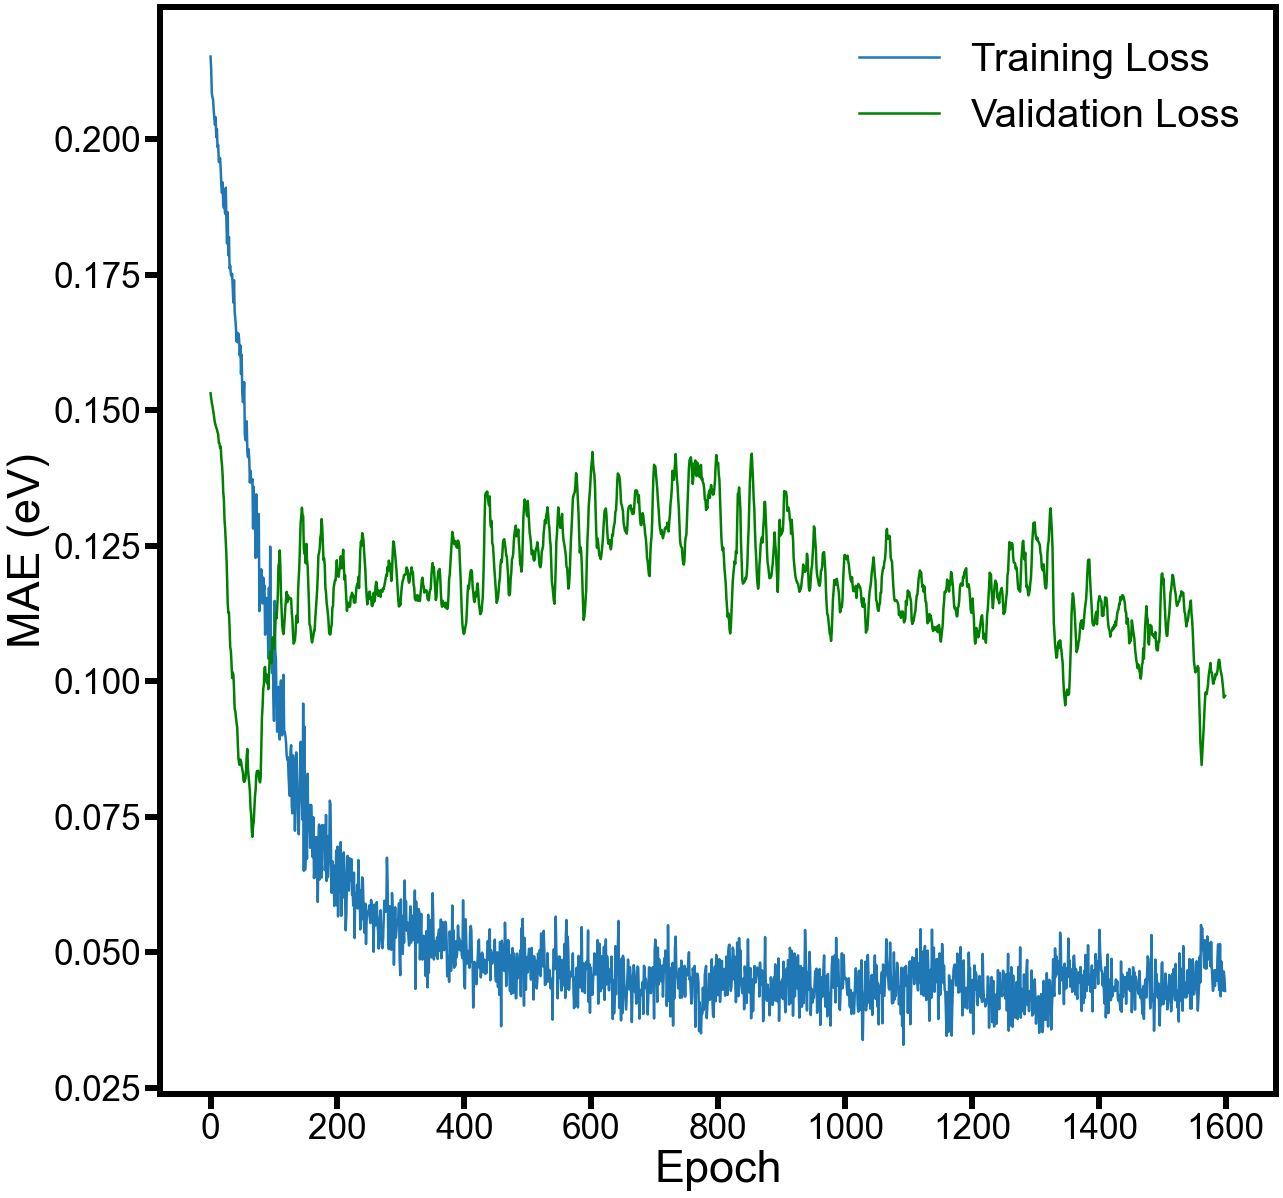

In [145]:
training_losses = model_history_mae.history['loss']
validation_losses = model_history_mae.history['val_loss']

fig, ax = plt.subplots()
plt.plot(training_losses, label="Training Loss", linewidth = 2.5)
plt.plot(validation_losses, label="Validation Loss", linewidth = 2.5, c='g')
#plt.title('Learning Curve', fontsize = 20)
ax.set_xlabel('Epoch', fontsize = 45)
ax.set_ylabel('MAE (eV)', fontsize = 45)

ax.tick_params(axis='x', colors='black', labelsize = 35, width=6, length=15, color='black')
ax.tick_params(axis='y', colors='black', labelsize = 35, width=6, length=15, color='black')

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(6)

plt.legend(frameon=False, fontsize = 40);

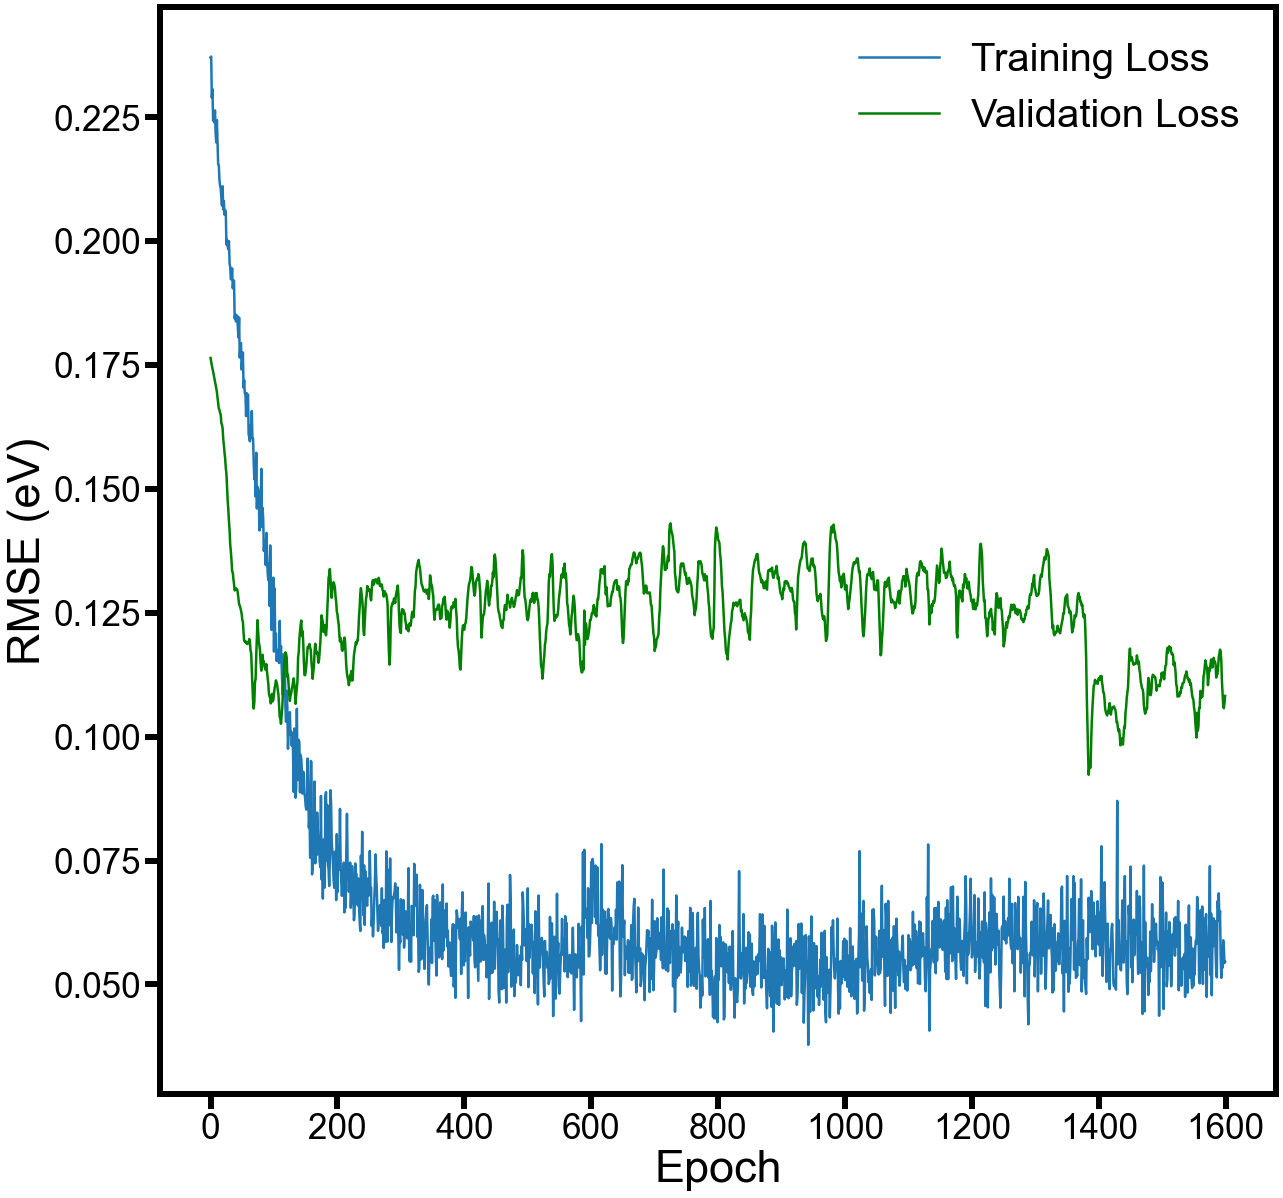

In [146]:
training_losses = model_history_rmse.history['loss']
validation_losses = model_history_rmse.history['val_loss']

fig, ax = plt.subplots()
plt.plot(training_losses, label="Training Loss", linewidth = 2.5)
plt.plot(validation_losses, label="Validation Loss", linewidth = 2.5, c='g')
#plt.title('Learning Curve', fontsize = 20)
ax.set_xlabel('Epoch', fontsize = 45)
ax.set_ylabel('RMSE (eV)', fontsize = 45)

ax.tick_params(axis='x', colors='black', labelsize = 35, width=6, length=15, color='black')
ax.tick_params(axis='y', colors='black', labelsize = 35, width=6, length=15, color='black')

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(6)

plt.legend(frameon=False, fontsize = 40);

# 7. Regressor Performance Plots

In [101]:
GBR.fit(X_train, y_train)
KNR.fit(X_train, y_train)
RFR.fit(X_train, y_train)
SR.fit(X_train, y_train)
ridge.fit(X_train, y_train)
xgbr.fit(X_train, y_train)
xgbr_optimized.fit(X_train, y_train)
light.fit(X_train, y_train)
nn = load_model('model_best_weights.h5', num_cols = len(features.columns))

In [102]:
def trendline(xd, yd, i, name, rmse, ax, order=1, c='k', alpha=1, Rval=False):
    """Make a line of best fit"""

    # Calculate trendline
    coeffs = np.polyfit(xd, yd, order)

    intercept = coeffs[-1]
    slope = coeffs[-2]
    power = coeffs[0] if order == 2 else 0

    minxd = np.min(xd)
    maxxd = np.max(xd)

    xl = np.array([minxd, maxxd])
    yl = power * xl ** 2 + slope * xl + intercept

    # Plot trendline
    if i <= 3:
        ax[0, i].plot(xl, yl, c, alpha=alpha, linestyle='--', linewidth=0.8)

    if i > 3:
        ax[1, i - 4].plot(xl, yl, c, alpha=alpha, linestyle='--', linewidth=0.8)

    # Calculate R Squared
    p = np.poly1d(coeffs)

    ybar = np.sum(yd) / len(yd)
    ssreg = np.sum((p(xd) - ybar) ** 2)
    sstot = np.sum((yd - ybar) ** 2)
    Rsqr = ssreg / sstot

    if not Rval:
        # Plot R^2 value
        if i <= 3:
            ax[0, i].text(0.22, 0.06, name, fontsize=18)
            ax[0, i].text(0.22, 0.03, '$MAE = %0.3f$ eV' % mae, fontsize=18)
            ax[0, i].text(0.22, 0, '$RMSE = %0.3f$ eV' % rmse, fontsize=18)
            ax[0, i].text(0.22, -0.03, '$R^2 = %0.3f$' % Rsqr, fontsize=18)
        if i > 3:
            ax[1, i - 4].text(0.22, 0.06, name, fontsize=18)
            ax[1, i - 4].text(0.22, 0.03, '$MAE = %0.3f$ eV' % mae, fontsize=18)
            ax[1, i - 4].text(0.22, 0.0, '$RMSE = %0.3f$ eV' % rmse, fontsize=18)
            ax[1, i - 4].text(0.22, -0.03, '$R^2 = %0.3f$' % Rsqr, fontsize=18)
    else:
        # Return the R^2 value:
        return Rsqr


def plot_data(train_data, test_data, i, name, rmse, mae, ax):
    if i <= 3:
        # Plot data
        ax[0, i].scatter(train_data['G_co (eV)'], train_data['prediction'], label="Training Set",
                         alpha=1, marker='o', s=35, facecolor = 'none', color='#1f77b4')
        
        ax[0, i].scatter(test_data['G_co (eV)'], test_data['prediction'], label='Testing Set',
                         alpha=1, marker='s', s=35, facecolor = 'none', color='#ff7f0e')
        ax[0, i].tick_params(axis='y', labelcolor='black', labelsize = 25, width=2, length=6, color='black', which='major')
        ax[0, i].tick_params(axis='x', labelcolor='black', labelsize = 25, width=2, length=6, color='black', which='major')
        
        for axis in ['top','bottom','left','right']:
            ax[0, i].spines[axis].set_linewidth(2)
        
        ax[0, i].set_yticks([0, 0.2, 0.4])
        ax[0, i].set_xticks([0, 0.2, 0.4])

        # Combine data for best fit line
        x = pd.concat([train_data['G_co (eV)'], test_data['G_co (eV)']])
        y = pd.concat([train_data['prediction'], test_data['prediction']])

        # plot best fit line
        trendline(x, y, i, name, rmse, ax)

        # plot legend/axis
        ax[0, i].legend(loc='upper left', fontsize=18, frameon=False)

    if i > 3:
        # Plot data
        ax[1, i - 4].scatter(train_data['G_co (eV)'], train_data['prediction'], label="Training Set",
                             alpha=1, marker='o', s=35, facecolor = 'none', color='#1f77b4')
        ax[1, i - 4].scatter(test_data['G_co (eV)'], test_data['prediction'], label='Testing Set',
                             alpha=1, marker='s', s=35, facecolor = 'none', color='#ff7f0e')
        ax[1, i - 4].tick_params(axis='y', labelcolor='black', labelsize = 25, width=2, length=6, color='black', which='major')
        ax[1, i - 4].tick_params(axis='x', labelcolor='black', labelsize = 25, width=2, length=6, color='black', which='major')
        
        for axis in ['top','bottom','left','right']:
            ax[1, i - 4].spines[axis].set_linewidth(2)
        
        ax[1, i - 4].set_yticks([0, 0.2, 0.4])
        ax[1, i - 4].set_xticks([0, 0.2, 0.4])
        
        # Combine data to create best fit line
        x = pd.concat([train_data['G_co (eV)'], test_data['G_co (eV)']])
        y = pd.concat([train_data['prediction'], test_data['prediction']])

        # Plot best fit line
        trendline(x, y, i, name, rmse, ax)

        # Plot legend/axis
        ax[1, i - 4].legend(loc='upper left', fontsize=18, frameon=False)

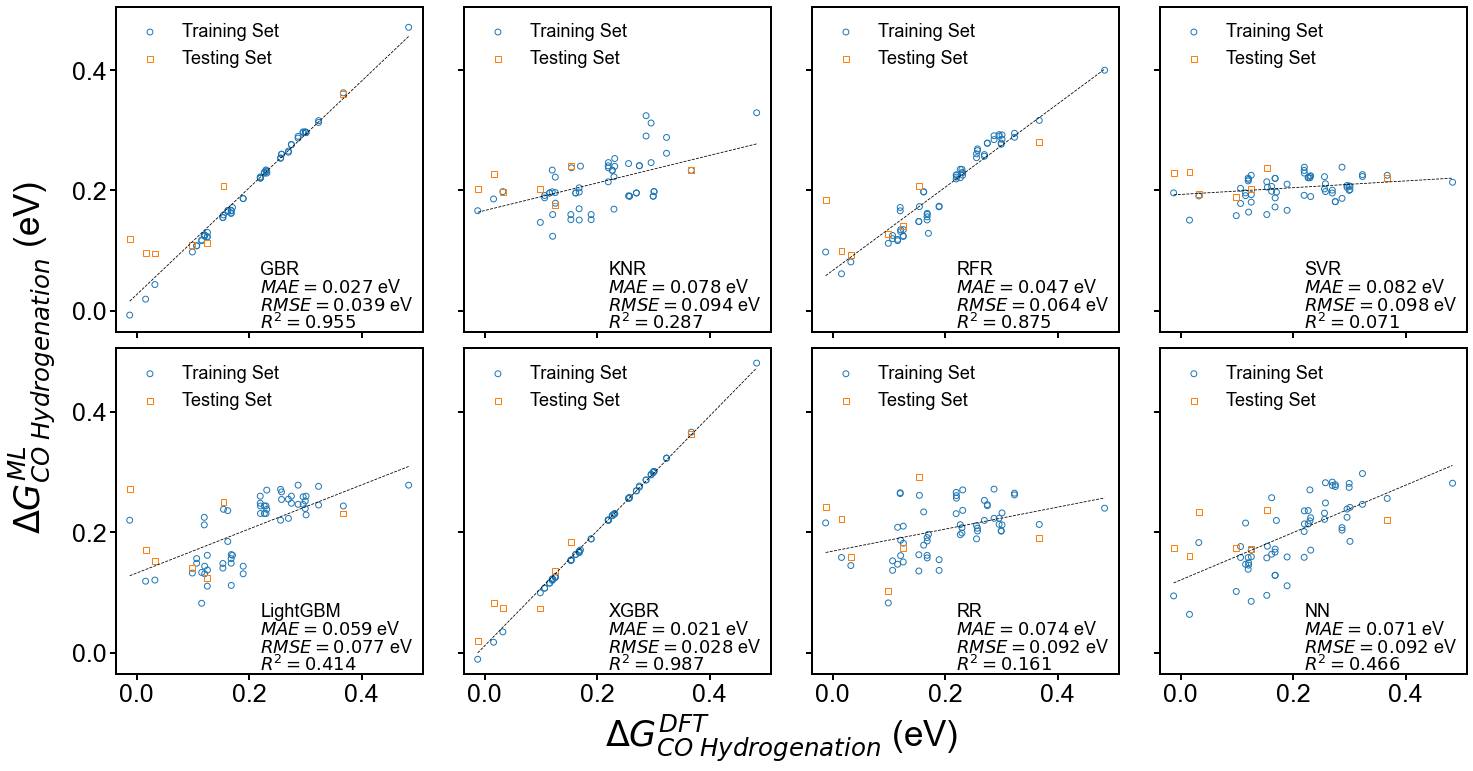

In [103]:
fig, ax = plt.subplots(nrows=2, ncols=4, sharex = True, sharey = True, figsize = (20, 10))

regressors = [GBR, KNR, RFR, SR, light, xgbr_optimized, ridge, nn]

names = {
    
    GBR: 'GBR',
    KNR: 'KNR',
    RFR: 'RFR',
    SR: 'SVR',
    light: 'LightGBM',
    xgbr_optimized: 'XGBR',
    ridge: 'RR',
    nn: 'NN'
    
}

RMSE = {
    
    GBR: results_df['GBR'][9][1],
    KNR: results_df['KNR'][9][1],
    RFR: results_df['RFR'][9][1],
    SR: results_df['SVR'][9][1],
    light: results_df['LightGBM'][9][1],
    xgbr_optimized: optimized_xgbr_rmse,
    ridge: results_df['RR'][9][1],
    nn: nn_RMSE
    
}

MAE = {
    
    GBR: results_df['GBR'][9][0],
    KNR: results_df['KNR'][9][0],
    RFR: results_df['RFR'][9][0],
    SR: results_df['SVR'][9][0],
    light: results_df['LightGBM'][9][0],
    xgbr_optimized: optimized_xgbr_mae,
    ridge: results_df['RR'][9][0],
    nn: nn_MAE
    
}

# Make Gco predictions on training and testing data using each regressor
for i, reg in enumerate(regressors):
    
    name = names[reg]
    rmse = RMSE[reg]
    mae = MAE[reg]
    
    
    # Predicting training data
    train_data = X_train.copy()
    train_data['G_co (eV)'] = y_train.copy()
    train_data['prediction'] = reg.predict(train_data.iloc[:, :-1])    
    
    # Predicting testing data
    test_data = X_test.copy()
    test_data['G_co (eV)'] = y_test.copy()
    test_data['prediction'] = reg.predict(test_data.iloc[:, :-1])    
    
    # Plotting the performance of each regressor
    plot_data(train_data, test_data, i, name, rmse, mae, ax)

fig.text(0.5, -0.03, r'$\Delta G_{CO\;Hydrogenation}^{DFT}$ (eV)', ha='center', va='center', fontsize = 35)
fig.text(-0.02, 0.5, r'$\Delta G_{CO\;Hydrogenation}^{ML}$ (eV)', ha='center', va='center', rotation='vertical', fontsize = 35)
fig.tight_layout(pad = 1);

# 8. XGBR Prediction on Full Dataset

In [149]:
prediction_df = pd.read_csv('CO Hydrogenation Full Data (with I).csv')

In [150]:
adsorbates = prediction_df[['Adsorbate 1', 'Adsorbate 2']]

In [151]:
prediction_df

,Adsorbate 1,Adsorbate 2,num of NM atoms 1,num of NM atoms 2,num of H 1,num of H 2,Atomic num 1,Atomic num 2,PE 1,PE 2,...,Average EA of Adsorbates squared,Average PE of Adsorbates squared,Average Covalent Radius of Adosrbates squared,Average FIE of Adsorbates squared,Average VdW Radius squared,Average Atomic num of Adsorbates squared,Average num of Valence Electron squared,Average IE squared,G_CHO - Gco,Unnamed: 55
0,O,O,1.0,1.0,0.0,0.0,8.0,8.0,3.44,3.44,...,2.13,11.83,0.40,185.45,2.31,64.00,36.00,185.50,0.17026,NaN
1,O,OH,1.0,2.0,0.0,1.0,8.0,4.5,3.44,2.82,...,1.65,9.80,0.31,185.31,2.07,39.06,42.25,177.42,0.29583,NaN
2,O,N,1.0,1.0,0.0,0.0,8.0,7.0,3.44,3.04,...,0.48,10.50,0.45,198.13,2.36,56.25,30.25,198.11,NaN,NaN
3,O,NH,1.0,2.0,0.0,1.0,8.0,4.0,3.44,2.62,...,0.81,9.18,0.33,191.60,2.10,36.00,36.00,174.50,NaN,NaN
4,O,NH2,1.0,3.0,0.0,2.0,8.0,3.0,3.44,2.48,...,0.94,8.76,0.29,189.45,2.01,30.25,42.25,148.84,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,I,SH2,1.0,3.0,0.0,2.0,53.0,6.0,2.66,2.33,...,4.53,6.22,0.89,131.90,2.86,870.25,56.25,109.31,NaN,NaN
285,I,F,1.0,1.0,0.0,0.0,53.0,9.0,2.66,3.98,...,10.43,11.02,0.97,194.23,2.98,961.00,49.00,194.18,NaN,NaN
286,I,Cl,1.0,1.0,0.0,0.0,53.0,17.0,2.66,3.16,...,11.13,8.47,1.35,137.10,3.48,1225.00,49.00,137.12,NaN,NaN
287,I,Br,1.0,1.0,0.0,0.0,53.0,35.0,2.66,2.96,...,10.31,7.90,1.53,123.93,3.67,1936.00,49.00,123.88,NaN,NaN


In [152]:
# Savings the Gco column
targets = prediction_df['G_CHO - Gco']

In [153]:
diff = prediction_df.columns.difference(test_data.columns)

In [154]:
# Removing all columns that were deleted in feature selection to maintain the same prediction features as training
prediction_df = prediction_df.drop(prediction_df.columns.difference(test_data.columns), 1)

In [155]:
prediction_df.columns

Index(['Average Atomic num', 'Average PE', 'Average IE',
       'Average num of Valence Electron', 'PE 1 minus PE 2',
       'Covalent Radius 1 minus Covalent Radius 2',
       'num of Valence 1 minus num of Valence 2'],
      dtype='object')

In [156]:
def scaler(df):
    
    base = pd.read_csv('CO Hydrogenation Full Data (with I).csv')
    base = base.drop(columns = ['Adsorbate 1', 'Adsorbate 2', 'G_CHO - Gco'])
    scales = {}
    for i in range(len(base.columns)):
        name = base.columns[i]
        minimum = min(base.iloc[:, i])
        maximum = max(base.iloc[:, i])
        scales[name] = [minimum, maximum]
    
    for i in range(len(df.columns)):
        name_1 = df.columns[i]
        if name_1 == 'G_CHO - Gco':
            pass
        else:
            for j, row in enumerate(df[name_1]):
                df.iloc[j, i] = (row - scales[name_1][0]) / (scales[name_1][1] - scales[name_1][0])
        
    return df


In [157]:
labels = ['$Z_{avg}$', '$PE_{avg}$', '$IE_{avg}$', '# of $VE_{avg}$', 
               '$PE_1$ $-$ $PE_2$', '$r_{cov, 1}$ $-$ $r_{cov, 2}$', '# of $VE_1$ $-$ # of $VE_2$']

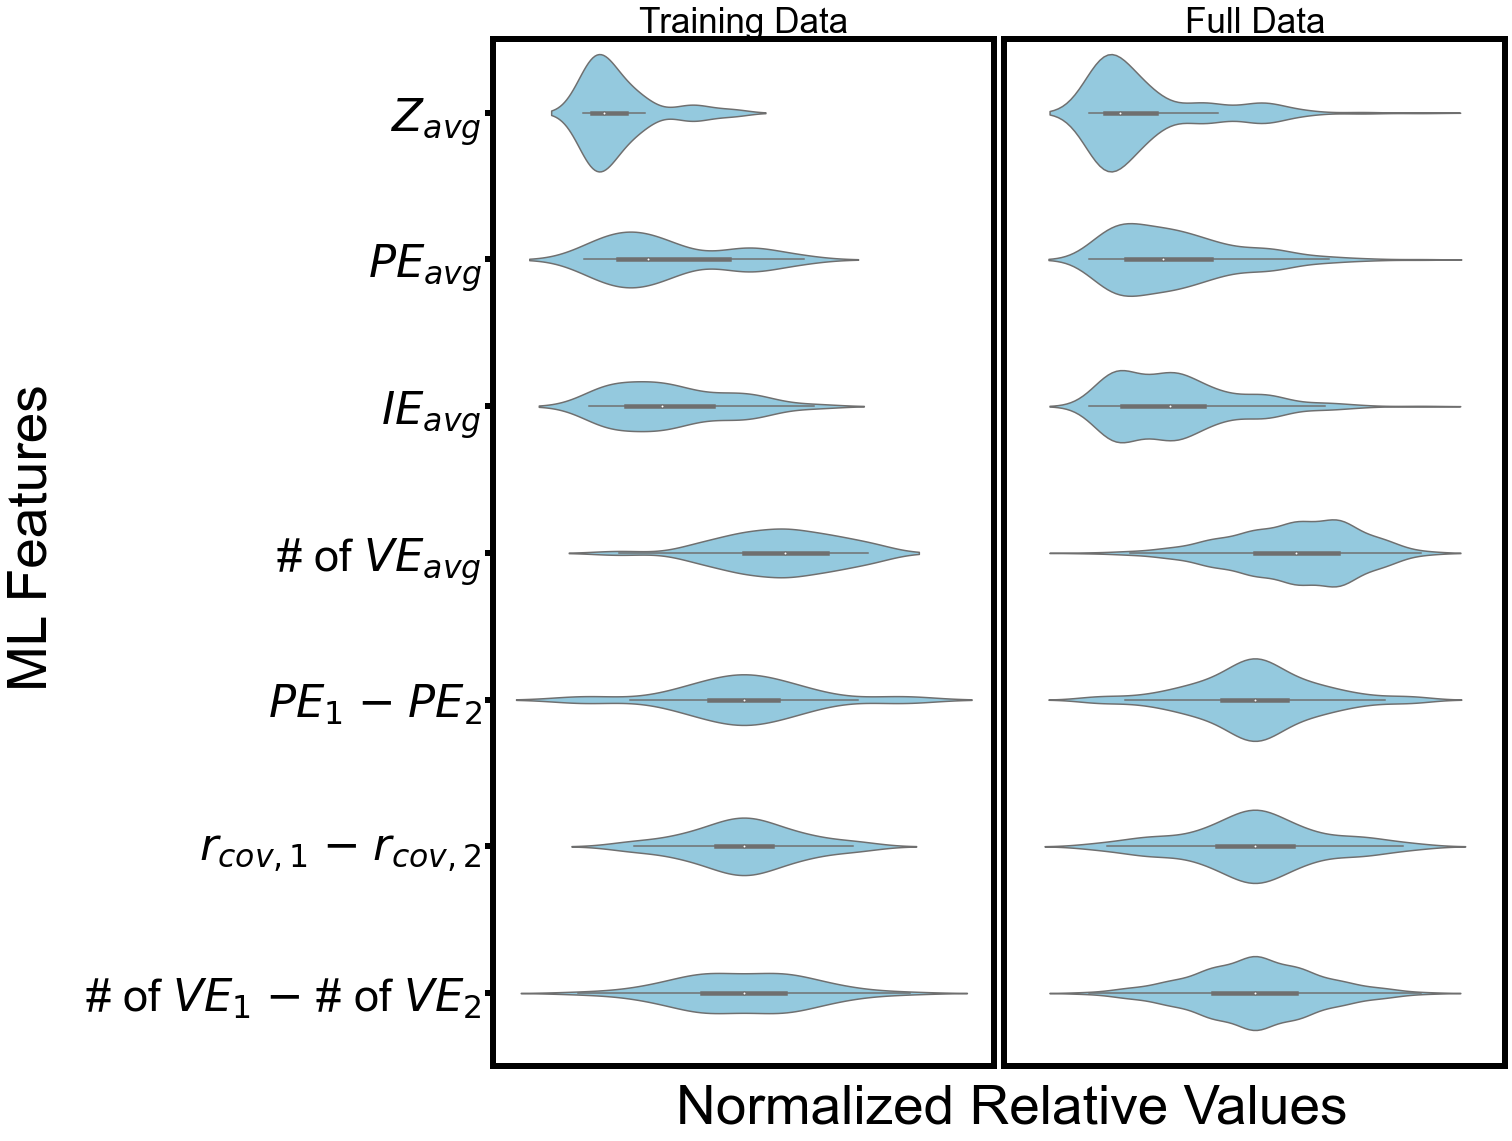

In [159]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharey = True, sharex = True, figsize = (20, 15))

training_df = scaler(df_v9.copy())
training_df = training_df.iloc[:, :-1].melt(var_name='Features', value_name='Values')

full_df = scaler(prediction_df.copy())
full_df = full_df.melt(var_name='Features', value_name='Values')

sns.violinplot(x = 'Values', y = 'Features', data = training_df, ax=ax[0], color="skyblue").set(xticklabels=[], title='Training Data')
sns.violinplot(x = 'Values', y = 'Features', data = full_df, ax=ax[1], color="skyblue").set(xticklabels=[], title='Full Data')

ax[0].set_ylabel('')    
ax[0].set_xlabel('')
ax[1].set_ylabel('')    
ax[1].set_xlabel('')


ax[0].tick_params(axis='y', labelcolor='black', labelsize = 45, which='both', width=6, length=8)
ax[0].tick_params(axis='x', width=0, length=0)
ax[1].tick_params(width=0, length=0)
for axis in ['top','bottom','left','right']:
    ax[0].spines[axis].set_linewidth(6)
    ax[1].spines[axis].set_linewidth(6)

ax[0].set_yticklabels(labels)
    
ax[0].set_title('Training Data', fontsize=35)    
ax[1].set_title('Full Data', fontsize=35)

plt.xticks(fontsize=40)

fig.text(0.65, -0.03, 'Normalized Relative Values', ha='center', va='center', fontsize = 55)
fig.text(-0.03, 0.5, 'ML Features', ha='center', va='center', rotation='vertical', fontsize = 55)
fig.tight_layout(pad = 1);

In [114]:
# Adding the Gco column back
prediction_df['G_CHO - Gco'] = targets

In [115]:
def ml_predict(dataframe, name, reg):
    dataframe['Ghyd_ML'] = np.nan
    for i, col in enumerate(dataframe['Ghyd_ML']):
        if pd.isnull(col):
            dataframe.iloc[i, -1] = reg.predict(pd.DataFrame(dataframe.iloc[i, 0:-2]).T)

    dataframe['Ghyd_Final'] = dataframe[name]
    for i, col in enumerate(dataframe['Ghyd_Final']):
        if pd.isnull(col):
            dataframe.iloc[i, -1] = reg.predict(pd.DataFrame(dataframe.iloc[i, 0:-3]).T)

In [116]:
prediction_df

,Average Atomic num,Average PE,Average IE,Average num of Valence Electron,PE 1 minus PE 2,Covalent Radius 1 minus Covalent Radius 2,num of Valence 1 minus num of Valence 2,G_CHO - Gco
0,8.00,3.44,13.62,6.0,0.00,0.00,0.0,0.17026
1,6.25,3.13,13.32,6.5,0.62,0.15,-1.0,0.29583
2,7.50,3.24,14.08,5.5,0.40,-0.08,1.0,NaN
3,6.00,3.03,13.21,6.0,0.82,0.11,0.0,NaN
4,5.50,2.96,12.20,6.5,0.96,0.18,-1.0,NaN
...,...,...,...,...,...,...,...,...
284,29.50,2.49,10.46,7.5,0.33,0.77,-1.0,NaN
285,31.00,3.32,13.94,7.0,-1.32,0.69,0.0,NaN
286,35.00,2.91,11.71,7.0,-0.50,0.34,0.0,NaN
287,44.00,2.81,11.13,7.0,-0.30,0.19,0.0,NaN


In [117]:
ml_predict(prediction_df, 'G_CHO - Gco' ,xgbr_optimized)

In [118]:
prediction_df

,Average Atomic num,Average PE,Average IE,Average num of Valence Electron,PE 1 minus PE 2,Covalent Radius 1 minus Covalent Radius 2,num of Valence 1 minus num of Valence 2,G_CHO - Gco,Ghyd_ML,Ghyd_Final
0,8.00,3.44,13.62,6.0,0.00,0.00,0.0,0.17026,0.170380,0.170260
1,6.25,3.13,13.32,6.5,0.62,0.15,-1.0,0.29583,0.295077,0.295830
2,7.50,3.24,14.08,5.5,0.40,-0.08,1.0,NaN,0.071667,0.071667
3,6.00,3.03,13.21,6.0,0.82,0.11,0.0,NaN,0.143515,0.143515
4,5.50,2.96,12.20,6.5,0.96,0.18,-1.0,NaN,0.273702,0.273702
...,...,...,...,...,...,...,...,...,...,...
284,29.50,2.49,10.46,7.5,0.33,0.77,-1.0,NaN,0.237053,0.237053
285,31.00,3.32,13.94,7.0,-1.32,0.69,0.0,NaN,0.225670,0.225670
286,35.00,2.91,11.71,7.0,-0.50,0.34,0.0,NaN,0.284668,0.284668
287,44.00,2.81,11.13,7.0,-0.30,0.19,0.0,NaN,0.257079,0.257079


In [119]:
b = np.sqrt(((prediction_df['G_CHO - Gco'] - prediction_df['Ghyd_ML'])**2).mean()).round(4)

In [120]:
print('Training RMSE: {}'.format(optimized_xgbr_rmse.round(4)))
print('Testing RMSE: {}'.format(b))

Training RMSE: 0.028
Testing RMSE: 0.0118


In [121]:
prediction_df['Ghyd_Final'].describe()

count    289.000000
mean       0.206839
std        0.079760
min       -0.012410
25%        0.143431
50%        0.226966
75%        0.255740
max        0.483390
Name: Ghyd_Final, dtype: float64

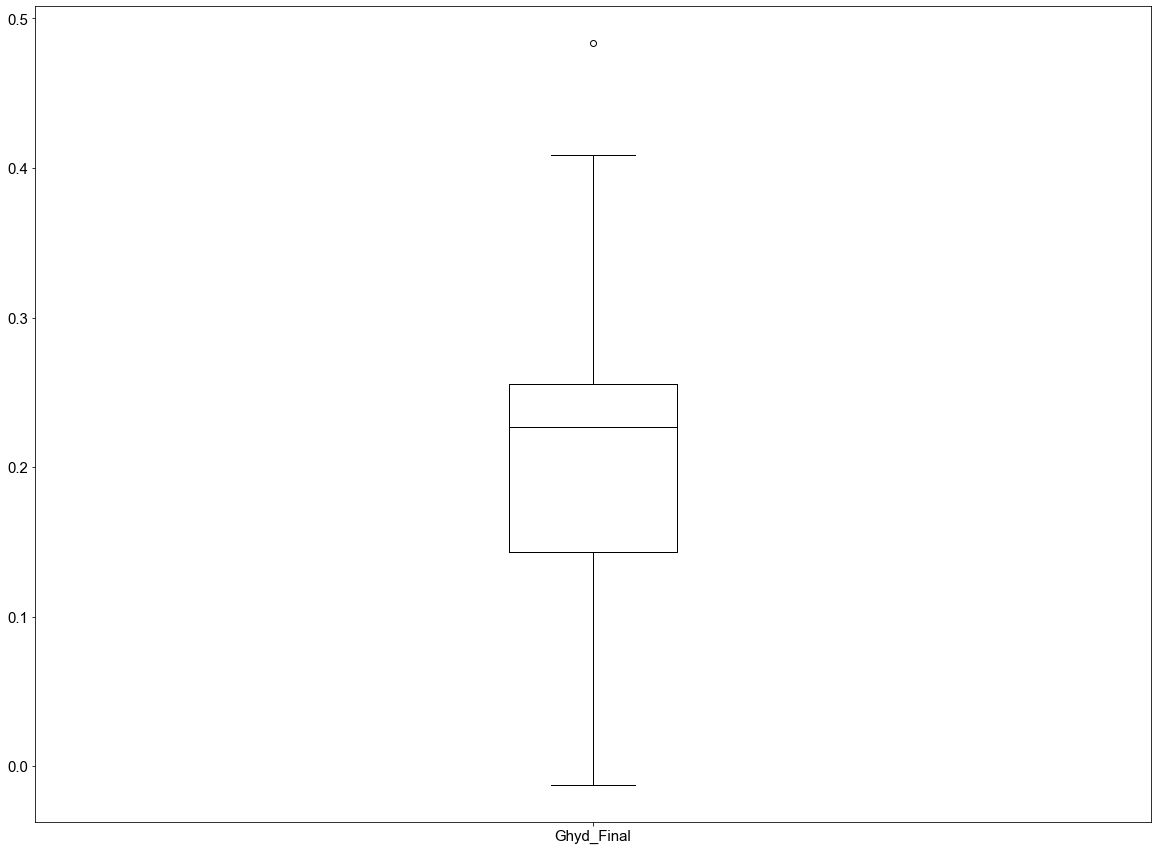

In [122]:
prediction_df.boxplot(color=dict(boxes='black', whiskers='black', medians='black', caps='black'), 
                      column='Ghyd_Final', grid=False, figsize=(20, 15));

In [123]:
final = adsorbates.join(prediction_df, how = 'left')

In [124]:
final

,Adsorbate 1,Adsorbate 2,Average Atomic num,Average PE,Average IE,Average num of Valence Electron,PE 1 minus PE 2,Covalent Radius 1 minus Covalent Radius 2,num of Valence 1 minus num of Valence 2,G_CHO - Gco,Ghyd_ML,Ghyd_Final
0,O,O,8.00,3.44,13.62,6.0,0.00,0.00,0.0,0.17026,0.170380,0.170260
1,O,OH,6.25,3.13,13.32,6.5,0.62,0.15,-1.0,0.29583,0.295077,0.295830
2,O,N,7.50,3.24,14.08,5.5,0.40,-0.08,1.0,NaN,0.071667,0.071667
3,O,NH,6.00,3.03,13.21,6.0,0.82,0.11,0.0,NaN,0.143515,0.143515
4,O,NH2,5.50,2.96,12.20,6.5,0.96,0.18,-1.0,NaN,0.273702,0.273702
...,...,...,...,...,...,...,...,...,...,...,...,...
284,I,SH2,29.50,2.49,10.46,7.5,0.33,0.77,-1.0,NaN,0.237053,0.237053
285,I,F,31.00,3.32,13.94,7.0,-1.32,0.69,0.0,NaN,0.225670,0.225670
286,I,Cl,35.00,2.91,11.71,7.0,-0.50,0.34,0.0,NaN,0.284668,0.284668
287,I,Br,44.00,2.81,11.13,7.0,-0.30,0.19,0.0,NaN,0.257079,0.257079


In [125]:
# Save the predicted dataframe
final.to_csv('predicted_Ghyd_xgbr.csv')

# 9. Full Data Heat Map

In [162]:
adsorbates = final['Adsorbate 1'].unique()
hyd_energy = final['Ghyd_Final']

In [163]:
def transform_2D(series):
    result = []
    temp = []
    count = 1
    for i in series:
        if count % 18 != 0:
            temp.append(i)
            count += 1
        else:
            count = 1
            result.append(temp)
            temp = []
            temp.append(i)
            count += 1
    result.append(temp)
    return result

In [164]:
# Transform series into a 2D array
twoD = transform_2D(hyd_energy)

In [165]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from matplotlib.colors import ListedColormap




#Plotting
trace = go.Heatmap(z = twoD,
                   x = adsorbates,
                   y = adsorbates,
                   colorscale = 'YlOrBr',
                   colorbar   = dict(title = "Delta_Ghyd",
                                     titleside = "right"
                                    )
                  )

layout = go.Layout(dict(title = "Ghyd for different adsorbate combinations",
                        autosize = False,
                        height  = 1000,
                        width   = 1000,
                        yaxis   = dict(tickfont = dict(size = 15)),
                        xaxis   = dict(tickfont = dict(size = 15))
                       )
                  )

data = [trace]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

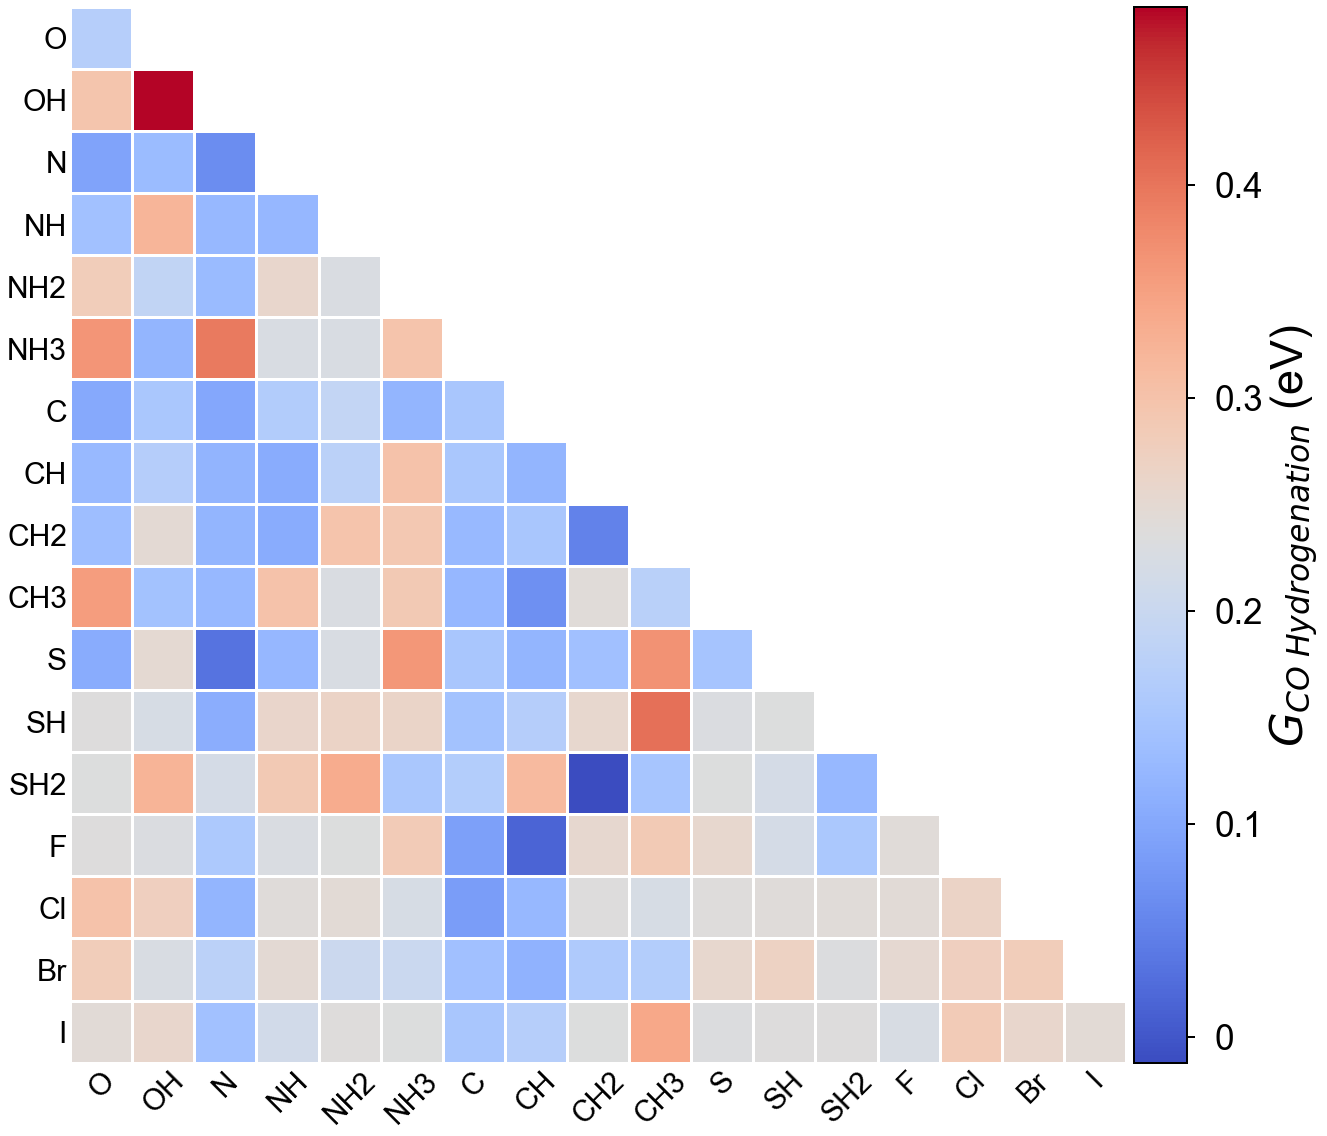

In [168]:
cmap1 = matplotlib.colors.ListedColormap(['g'])
mask = np.tril(np.ones_like(twoD, dtype=bool))

ax = sns.heatmap(twoD, linewidth=2, mask = 1 - mask,
                 cmap = "coolwarm", square = True, cbar=False)
ax.figure.axes[-1].yaxis.label.set_size(30)

#ax = sns.heatmap(twoD, linewidth=2, mask = np.array(twoD) < 0.3, cmap = cmap1, square = True, cbar=False)

ax.set_xticklabels(adsorbates, rotation = 45, size = 30)
ax.set_yticklabels(adsorbates, rotation = 0, size = 30)

ax.tick_params(axis='x', colors='black', width=0, length=0, color='black')
ax.tick_params(axis='y', colors='black', width=0, length=0, color='black') 

divider = make_axes_locatable(ax) 
cax = divider.append_axes("right", size="5%", pad=0.1) 
cbar = plt.colorbar(ax.collections[0], cax=cax)
cbar.set_ticks([0, 0.1, 0.2, 0.3, 0.4])
cbar.ax.set_yticklabels(['0', '0.1', '0.2', '0.3', '0.4'], size=35)
cbar.ax.set_ylabel('$G_{CO\;Hydrogenation}$ (eV)', fontsize = 45)
cbar.ax.tick_params(axis='y', which='major', length=8, width = 2, pad=20)
cbar.outline.set_edgecolor('black')
cbar.outline.set_linewidth(2)

plt.show()

# 10. Final Difference

In [170]:
dimerization = pd.read_csv('predicted_Gc-c_xgbr.csv')

In [171]:
adsorbates = dimerization['Adsorbate 1'].unique()
dim_energy = dimerization['Gc-c_Final']

In [172]:
difference = dim_energy - hyd_energy

In [173]:
twoD = transform_2D(difference)

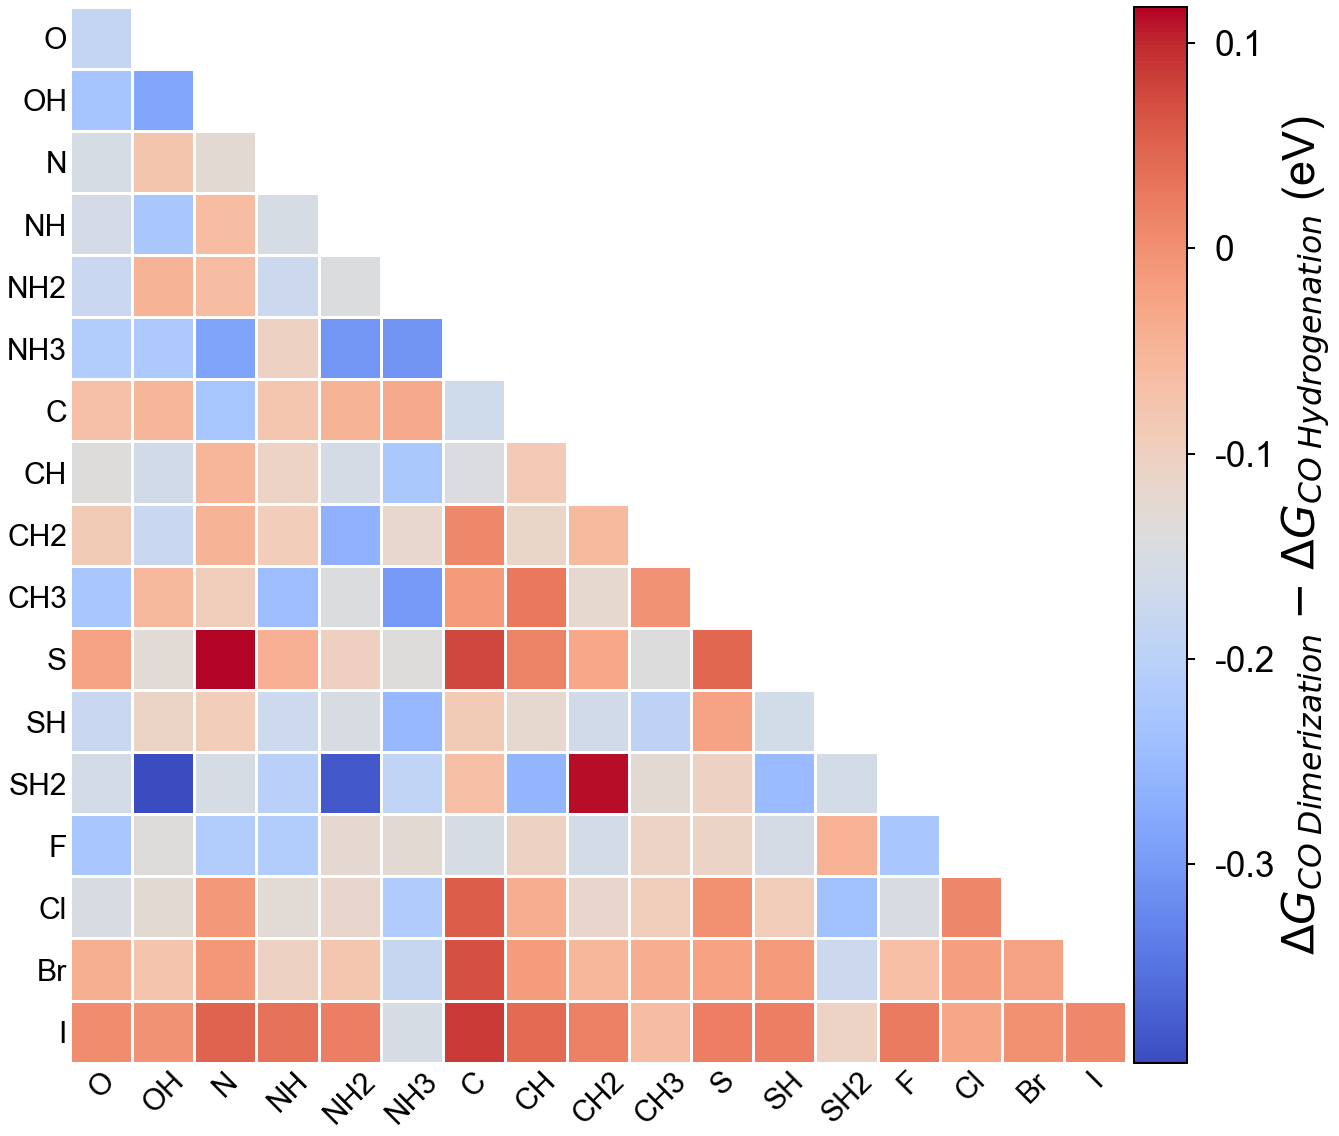

In [176]:
cmap1 = matplotlib.colors.ListedColormap(['g'])
mask = np.tril(np.ones_like(twoD, dtype=bool))

ax = sns.heatmap(twoD, linewidth=2, mask = 1 - mask,
                 cmap = "coolwarm", square = True, cbar=False)
ax.figure.axes[-1].yaxis.label.set_size(30)

#ax = sns.heatmap(twoD, linewidth=2, mask = np.array(twoD) < 0.3, cmap = cmap1, square = True, cbar=False)

ax.set_xticklabels(adsorbates, rotation = 45, size = 30)
ax.set_yticklabels(adsorbates, rotation = 0, size = 30)

ax.tick_params(axis='x', colors='black', width=0, length=0, color='black')
ax.tick_params(axis='y', colors='black', width=0, length=0, color='black')

divider = make_axes_locatable(ax) 
cax = divider.append_axes("right", size="5%", pad=0.1) 
cbar = plt.colorbar(ax.collections[0], cax=cax)
cbar.set_ticks([-0.3, -0.2, -0.1, 0, 0.1])
cbar.ax.set_yticklabels(['-0.3', '-0.2', '-0.1', '0', '0.1'], size=35)
cbar.ax.set_ylabel('$\Delta G_{CO \; Dimerization}$ $-$ $\Delta G_{CO\;Hydrogenation}$ (eV)', fontsize = 45)
cbar.ax.tick_params(axis='y', which='major', length=8, width = 2, pad=20)
cbar.outline.set_edgecolor('black')
cbar.outline.set_linewidth(2)

plt.show()